# Susceptibility to substitution

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
BIN_COUNT = 4

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from progressbar import ProgressBar
from statsmodels.stats.proportion import multinomial_proportions_confint

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope, stopwords
engine = init_db()

## 2 Susceptibility in absolute and sentence-relative values

Build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.all, max_distance=2)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        # Prepare these arrays for stopword-checking.
        dslice = slice(substitution.start,
                       substitution.start + len(substitution.destination.tokens))
        lemmas = substitution.source.lemmas[dslice]
        tokens = substitution.source.tokens[dslice]
        tags = substitution.source.tags[dslice]
        
        for feature in Substitution.__features__:
            sentence_values, _ = substitution.source_destination_features(feature)
            sentence_values_rel, _ = substitution.source_destination_features(
                feature, sentence_relative='median')
            source_type, _ = Substitution.__features__[feature]
            # Stopword-check the arrays.
            words = getattr(substitution.source, source_type)[dslice]
            for i, (word, lemma, token, tag) in enumerate(zip(words, lemmas, tokens, tags)):
                if (token in stopwords) or (lemma in stopwords):
                    # Drop stopwords from this analysis since we exclude stopword-substitutions.
                    continue
                data.append({'cluster_id': substitution.source.cluster.sid,
                             'destination_id': substitution.destination.sid,
                             'occurrence': substitution.occurrence,
                             'source_id': substitution.source.sid,
                             'feature': feature,
                             'word': word,
                             'POS': tag,
                             'target': i == substitution.position,
                             'value': sentence_values[i],
                             'value_rel': sentence_values_rel[i]})

original_susties = pd.DataFrame(data)
del data

Got 87568 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.all, max_distance=2)


  0% (    1 of 87568) |           | Elapsed Time: 0:00:04 ETA:  4 days, 13:39:04

  0% (   98 of 87568) |                    | Elapsed Time: 0:00:05 ETA:  0:15:04

  0% (  191 of 87568) |                    | Elapsed Time: 0:00:06 ETA:  0:15:21

  0% (  294 of 87568) |                    | Elapsed Time: 0:00:07 ETA:  0:14:55

  0% (  389 of 87568) |                    | Elapsed Time: 0:00:08 ETA:  0:15:02

  0% (  490 of 87568) |                    | Elapsed Time: 0:00:09 ETA:  0:14:52

  0% (  592 of 87568) |                    | Elapsed Time: 0:00:10 ETA:  0:14:45

  0% (  691 of 87568) |                    | Elapsed Time: 0:00:11 ETA:  0:14:43

  0% (  772 of 87568) |                    | Elapsed Time: 0:00:12 ETA:  0:15:02

  0% (  860 of 87568) |                    | Elapsed Time: 0:00:13 ETA:  0:15:10

  1% (  962 of 87568) |                    | Elapsed Time: 0:00:14 ETA:  0:15:03

  1% ( 1053 of 87568) |                    | Elapsed Time: 0:00:15 ETA:  0:15:04

  1% ( 1095 of 87568) |                    | Elapsed Time: 0:00:15 ETA:  0:15:09

  1% ( 1199 of 87568) |                    | Elapsed Time: 0:00:17 ETA:  0:14:57

  1% ( 1308 of 87568) |                    | Elapsed Time: 0:00:18 ETA:  0:14:48

  1% ( 1415 of 87568) |                    | Elapsed Time: 0:00:19 ETA:  0:14:41

  1% ( 1521 of 87568) |                    | Elapsed Time: 0:00:20 ETA:  0:14:32

  1% ( 1621 of 87568) |                    | Elapsed Time: 0:00:21 ETA:  0:14:11

  1% ( 1721 of 87568) |                    | Elapsed Time: 0:00:22 ETA:  0:13:58

  2% ( 1812 of 87568) |                    | Elapsed Time: 0:00:23 ETA:  0:14:08

  2% ( 1873 of 87568) |                    | Elapsed Time: 0:00:24 ETA:  0:14:39

  2% ( 1972 of 87568) |                    | Elapsed Time: 0:00:25 ETA:  0:14:38

  2% ( 2073 of 87568) |                    | Elapsed Time: 0:00:26 ETA:  0:14:40

  2% ( 2190 of 87568) |                    | Elapsed Time: 0:00:27 ETA:  0:14:54

  2% ( 2300 of 87568) |                    | Elapsed Time: 0:00:28 ETA:  0:14:49

  2% ( 2413 of 87568) |                    | Elapsed Time: 0:00:29 ETA:  0:14:33

  2% ( 2520 of 87568) |                    | Elapsed Time: 0:00:30 ETA:  0:14:25

  2% ( 2626 of 87568) |                    | Elapsed Time: 0:00:31 ETA:  0:14:07

  3% ( 2728 of 87568) |                    | Elapsed Time: 0:00:32 ETA:  0:13:25

  3% ( 2825 of 87568) |                    | Elapsed Time: 0:00:33 ETA:  0:13:26

  3% ( 2931 of 87568) |                    | Elapsed Time: 0:00:34 ETA:  0:13:20

  3% ( 3048 of 87568) |                    | Elapsed Time: 0:00:35 ETA:  0:13:06

  3% ( 3130 of 87568) |                    | Elapsed Time: 0:00:36 ETA:  0:13:27

  3% ( 3229 of 87568) |                    | Elapsed Time: 0:00:37 ETA:  0:13:36

  3% ( 3284 of 87568) |                    | Elapsed Time: 0:00:37 ETA:  0:13:44

  3% ( 3385 of 87568) |                    | Elapsed Time: 0:00:38 ETA:  0:13:49

  3% ( 3471 of 87568) |                    | Elapsed Time: 0:00:39 ETA:  0:14:09

  4% ( 3576 of 87568) |                    | Elapsed Time: 0:00:40 ETA:  0:14:05

  4% ( 3678 of 87568) |                    | Elapsed Time: 0:00:41 ETA:  0:13:59

  4% ( 3781 of 87568) |                    | Elapsed Time: 0:00:42 ETA:  0:14:01

  4% ( 3882 of 87568) |                    | Elapsed Time: 0:00:43 ETA:  0:14:17

  4% ( 3980 of 87568) |                    | Elapsed Time: 0:00:44 ETA:  0:13:59

  4% ( 4076 of 87568) |                    | Elapsed Time: 0:00:45 ETA:  0:14:01

  4% ( 4174 of 87568) |                    | Elapsed Time: 0:00:46 ETA:  0:14:03

  4% ( 4232 of 87568) |                    | Elapsed Time: 0:00:47 ETA:  0:14:53

  4% ( 4296 of 87568) |                    | Elapsed Time: 0:00:48 ETA:  0:15:16

  5% ( 4379 of 87568) |#                   | Elapsed Time: 0:00:49 ETA:  0:15:35

  5% ( 4475 of 87568) |#                   | Elapsed Time: 0:00:50 ETA:  0:15:42

  5% ( 4575 of 87568) |#                   | Elapsed Time: 0:00:51 ETA:  0:15:44

  5% ( 4675 of 87568) |#                   | Elapsed Time: 0:00:52 ETA:  0:15:44

  5% ( 4771 of 87568) |#                   | Elapsed Time: 0:00:53 ETA:  0:15:45

  5% ( 4863 of 87568) |#                   | Elapsed Time: 0:00:54 ETA:  0:15:49

  5% ( 4947 of 87568) |#                   | Elapsed Time: 0:00:55 ETA:  0:16:07

  5% ( 5044 of 87568) |#                   | Elapsed Time: 0:00:56 ETA:  0:15:11

  5% ( 5146 of 87568) |#                   | Elapsed Time: 0:00:57 ETA:  0:14:26

  5% ( 5249 of 87568) |#                   | Elapsed Time: 0:00:58 ETA:  0:14:10

  6% ( 5351 of 87568) |#                   | Elapsed Time: 0:00:59 ETA:  0:14:02

  6% ( 5431 of 87568) |#                   | Elapsed Time: 0:01:00 ETA:  0:14:22

  6% ( 5473 of 87568) |#                   | Elapsed Time: 0:01:01 ETA:  0:14:35

  6% ( 5554 of 87568) |#                   | Elapsed Time: 0:01:02 ETA:  0:14:52

  6% ( 5640 of 87568) |#                   | Elapsed Time: 0:01:03 ETA:  0:15:00

  6% ( 5730 of 87568) |#                   | Elapsed Time: 0:01:04 ETA:  0:14:52

  6% ( 5825 of 87568) |#                   | Elapsed Time: 0:01:05 ETA:  0:14:53

  6% ( 5922 of 87568) |#                   | Elapsed Time: 0:01:06 ETA:  0:14:59

  6% ( 6024 of 87568) |#                   | Elapsed Time: 0:01:07 ETA:  0:15:00

  6% ( 6129 of 87568) |#                   | Elapsed Time: 0:01:08 ETA:  0:14:55

  7% ( 6224 of 87568) |#                   | Elapsed Time: 0:01:09 ETA:  0:14:36

  7% ( 6316 of 87568) |#                   | Elapsed Time: 0:01:10 ETA:  0:14:30

  7% ( 6406 of 87568) |#                   | Elapsed Time: 0:01:11 ETA:  0:14:20

  7% ( 6493 of 87568) |#                   | Elapsed Time: 0:01:12 ETA:  0:14:16

  7% ( 6568 of 87568) |#                   | Elapsed Time: 0:01:13 ETA:  0:14:26

  7% ( 6649 of 87568) |#                   | Elapsed Time: 0:01:14 ETA:  0:14:42

  7% ( 6744 of 87568) |#                   | Elapsed Time: 0:01:15 ETA:  0:14:43

  7% ( 6844 of 87568) |#                   | Elapsed Time: 0:01:16 ETA:  0:14:44

  7% ( 6944 of 87568) |#                   | Elapsed Time: 0:01:17 ETA:  0:14:50

  8% ( 7018 of 87568) |#                   | Elapsed Time: 0:01:18 ETA:  0:15:13

  8% ( 7085 of 87568) |#                   | Elapsed Time: 0:01:19 ETA:  0:15:45

  8% ( 7124 of 87568) |#                   | Elapsed Time: 0:01:20 ETA:  0:16:57

  8% ( 7216 of 87568) |#                   | Elapsed Time: 0:01:21 ETA:  0:16:49

  8% ( 7280 of 87568) |#                   | Elapsed Time: 0:01:22 ETA:  0:17:11

  8% ( 7357 of 87568) |#                   | Elapsed Time: 0:01:23 ETA:  0:17:17

  8% ( 7416 of 87568) |#                   | Elapsed Time: 0:01:24 ETA:  0:18:15

  8% ( 7476 of 87568) |#                   | Elapsed Time: 0:01:25 ETA:  0:19:31

  8% ( 7523 of 87568) |#                   | Elapsed Time: 0:01:26 ETA:  0:21:24

  8% ( 7599 of 87568) |#                   | Elapsed Time: 0:01:27 ETA:  0:21:19

  8% ( 7663 of 87568) |#                   | Elapsed Time: 0:01:28 ETA:  0:20:29

  8% ( 7750 of 87568) |#                   | Elapsed Time: 0:01:29 ETA:  0:18:47

  8% ( 7821 of 87568) |#                   | Elapsed Time: 0:01:30 ETA:  0:19:28

  9% ( 7883 of 87568) |#                   | Elapsed Time: 0:01:31 ETA:  0:19:32

  9% ( 7958 of 87568) |#                   | Elapsed Time: 0:01:32 ETA:  0:19:36

  9% ( 8044 of 87568) |#                   | Elapsed Time: 0:01:33 ETA:  0:18:41

  9% ( 8146 of 87568) |#                   | Elapsed Time: 0:01:34 ETA:  0:17:21

  9% ( 8244 of 87568) |#                   | Elapsed Time: 0:01:35 ETA:  0:15:59

  9% ( 8335 of 87568) |#                   | Elapsed Time: 0:01:36 ETA:  0:15:37

  9% ( 8428 of 87568) |#                   | Elapsed Time: 0:01:37 ETA:  0:15:39

  9% ( 8520 of 87568) |#                   | Elapsed Time: 0:01:38 ETA:  0:15:31

  9% ( 8605 of 87568) |#                   | Elapsed Time: 0:01:39 ETA:  0:15:12

  9% ( 8702 of 87568) |#                   | Elapsed Time: 0:01:40 ETA:  0:14:27

 10% ( 8757 of 87568) |##                  | Elapsed Time: 0:01:40 ETA:  0:14:24

 10% ( 8837 of 87568) |##                  | Elapsed Time: 0:01:41 ETA:  0:14:30

 10% ( 8921 of 87568) |##                  | Elapsed Time: 0:01:42 ETA:  0:14:52

 10% ( 9017 of 87568) |##                  | Elapsed Time: 0:01:44 ETA:  0:14:54

 10% ( 9121 of 87568) |##                  | Elapsed Time: 0:01:45 ETA:  0:14:36

 10% ( 9196 of 87568) |##                  | Elapsed Time: 0:01:46 ETA:  0:14:58

 10% ( 9278 of 87568) |##                  | Elapsed Time: 0:01:47 ETA:  0:15:11

 10% ( 9359 of 87568) |##                  | Elapsed Time: 0:01:48 ETA:  0:15:16

 10% ( 9455 of 87568) |##                  | Elapsed Time: 0:01:49 ETA:  0:15:16

 10% ( 9544 of 87568) |##                  | Elapsed Time: 0:01:50 ETA:  0:14:57

 10% ( 9614 of 87568) |##                  | Elapsed Time: 0:01:51 ETA:  0:15:08

 11% ( 9700 of 87568) |##                  | Elapsed Time: 0:01:52 ETA:  0:15:05

 11% ( 9792 of 87568) |##                  | Elapsed Time: 0:01:53 ETA:  0:15:08

 11% ( 9852 of 87568) |##                  | Elapsed Time: 0:01:53 ETA:  0:15:49

 11% ( 9940 of 87568) |##                  | Elapsed Time: 0:01:54 ETA:  0:15:29

 11% (10026 of 87568) |##                  | Elapsed Time: 0:01:55 ETA:  0:15:23

 11% (10110 of 87568) |##                  | Elapsed Time: 0:01:56 ETA:  0:15:18

 11% (10204 of 87568) |##                  | Elapsed Time: 0:01:57 ETA:  0:15:21

 11% (10291 of 87568) |##                  | Elapsed Time: 0:01:58 ETA:  0:15:22

 11% (10369 of 87568) |##                  | Elapsed Time: 0:01:59 ETA:  0:15:11

 11% (10451 of 87568) |##                  | Elapsed Time: 0:02:00 ETA:  0:15:16

 12% (10516 of 87568) |##                  | Elapsed Time: 0:02:02 ETA:  0:16:24

 12% (10610 of 87568) |##                  | Elapsed Time: 0:02:03 ETA:  0:15:53

 12% (10695 of 87568) |##                  | Elapsed Time: 0:02:04 ETA:  0:15:56

 12% (10781 of 87568) |##                  | Elapsed Time: 0:02:05 ETA:  0:15:54

 12% (10868 of 87568) |##                  | Elapsed Time: 0:02:06 ETA:  0:15:48

 12% (10946 of 87568) |##                  | Elapsed Time: 0:02:07 ETA:  0:15:45

 12% (11036 of 87568) |##                  | Elapsed Time: 0:02:08 ETA:  0:15:39

 12% (11134 of 87568) |##                  | Elapsed Time: 0:02:09 ETA:  0:15:10

 12% (11231 of 87568) |##                  | Elapsed Time: 0:02:10 ETA:  0:14:50

 12% (11325 of 87568) |##                  | Elapsed Time: 0:02:11 ETA:  0:13:44

 13% (11421 of 87568) |##                  | Elapsed Time: 0:02:12 ETA:  0:13:40

 13% (11516 of 87568) |##                  | Elapsed Time: 0:02:13 ETA:  0:13:28

 13% (11611 of 87568) |##                  | Elapsed Time: 0:02:14 ETA:  0:13:16

 13% (11711 of 87568) |##                  | Elapsed Time: 0:02:15 ETA:  0:13:01

 13% (11793 of 87568) |##                  | Elapsed Time: 0:02:16 ETA:  0:13:17

 13% (11889 of 87568) |##                  | Elapsed Time: 0:02:17 ETA:  0:13:10

 13% (11989 of 87568) |##                  | Elapsed Time: 0:02:18 ETA:  0:13:07

 13% (12041 of 87568) |##                  | Elapsed Time: 0:02:18 ETA:  0:13:07

 13% (12128 of 87568) |##                  | Elapsed Time: 0:02:19 ETA:  0:13:14

 13% (12204 of 87568) |##                  | Elapsed Time: 0:02:20 ETA:  0:13:38

 14% (12295 of 87568) |##                  | Elapsed Time: 0:02:21 ETA:  0:13:43

 14% (12381 of 87568) |##                  | Elapsed Time: 0:02:22 ETA:  0:13:54

 14% (12477 of 87568) |##                  | Elapsed Time: 0:02:23 ETA:  0:13:57

 14% (12548 of 87568) |##                  | Elapsed Time: 0:02:24 ETA:  0:14:11

 14% (12638 of 87568) |##                  | Elapsed Time: 0:02:25 ETA:  0:14:18

 14% (12731 of 87568) |##                  | Elapsed Time: 0:02:26 ETA:  0:14:26

 14% (12814 of 87568) |##                  | Elapsed Time: 0:02:27 ETA:  0:14:37

 14% (12906 of 87568) |##                  | Elapsed Time: 0:02:28 ETA:  0:14:29

 14% (12999 of 87568) |##                  | Elapsed Time: 0:02:29 ETA:  0:14:06

 14% (13093 of 87568) |##                  | Elapsed Time: 0:02:30 ETA:  0:14:00

 15% (13136 of 87568) |###                 | Elapsed Time: 0:02:31 ETA:  0:14:07

 15% (13212 of 87568) |###                 | Elapsed Time: 0:02:32 ETA:  0:14:34

 15% (13292 of 87568) |###                 | Elapsed Time: 0:02:33 ETA:  0:14:20

 15% (13372 of 87568) |###                 | Elapsed Time: 0:02:34 ETA:  0:14:33

 15% (13455 of 87568) |###                 | Elapsed Time: 0:02:35 ETA:  0:14:47

 15% (13547 of 87568) |###                 | Elapsed Time: 0:02:36 ETA:  0:14:33

 15% (13656 of 87568) |###                 | Elapsed Time: 0:02:37 ETA:  0:14:09

 15% (13759 of 87568) |###                 | Elapsed Time: 0:02:38 ETA:  0:13:55

 15% (13872 of 87568) |###                 | Elapsed Time: 0:02:39 ETA:  0:13:29

 15% (13986 of 87568) |###                 | Elapsed Time: 0:02:40 ETA:  0:12:50

 16% (14074 of 87568) |###                 | Elapsed Time: 0:02:41 ETA:  0:12:36

 16% (14168 of 87568) |###                 | Elapsed Time: 0:02:42 ETA:  0:12:20

 16% (14230 of 87568) |###                 | Elapsed Time: 0:02:42 ETA:  0:12:06

 16% (14314 of 87568) |###                 | Elapsed Time: 0:02:43 ETA:  0:12:04

 16% (14399 of 87568) |###                 | Elapsed Time: 0:02:44 ETA:  0:12:10

 16% (14490 of 87568) |###                 | Elapsed Time: 0:02:45 ETA:  0:12:29

 16% (14576 of 87568) |###                 | Elapsed Time: 0:02:46 ETA:  0:12:47

 16% (14670 of 87568) |###                 | Elapsed Time: 0:02:47 ETA:  0:13:09

 16% (14763 of 87568) |###                 | Elapsed Time: 0:02:49 ETA:  0:13:36

 16% (14862 of 87568) |###                 | Elapsed Time: 0:02:50 ETA:  0:13:21

 17% (14966 of 87568) |###                 | Elapsed Time: 0:02:51 ETA:  0:13:07

 17% (15069 of 87568) |###                 | Elapsed Time: 0:02:52 ETA:  0:12:52

 17% (15105 of 87568) |###                 | Elapsed Time: 0:02:53 ETA:  0:13:54

 17% (15199 of 87568) |###                 | Elapsed Time: 0:02:54 ETA:  0:13:41

 17% (15295 of 87568) |###                 | Elapsed Time: 0:02:55 ETA:  0:13:34

 17% (15325 of 87568) |###                 | Elapsed Time: 0:02:55 ETA:  0:13:29

 17% (15421 of 87568) |###                 | Elapsed Time: 0:02:56 ETA:  0:13:24

 17% (15524 of 87568) |###                 | Elapsed Time: 0:02:57 ETA:  0:13:08

 17% (15624 of 87568) |###                 | Elapsed Time: 0:02:58 ETA:  0:13:06

 17% (15729 of 87568) |###                 | Elapsed Time: 0:02:59 ETA:  0:13:04

 18% (15832 of 87568) |###                 | Elapsed Time: 0:03:00 ETA:  0:13:02

 18% (15929 of 87568) |###                 | Elapsed Time: 0:03:01 ETA:  0:11:46

 18% (16016 of 87568) |###                 | Elapsed Time: 0:03:02 ETA:  0:11:54

 18% (16112 of 87568) |###                 | Elapsed Time: 0:03:03 ETA:  0:11:53

 18% (16216 of 87568) |###                 | Elapsed Time: 0:03:04 ETA:  0:11:43

 18% (16322 of 87568) |###                 | Elapsed Time: 0:03:05 ETA:  0:11:33

 18% (16419 of 87568) |###                 | Elapsed Time: 0:03:06 ETA:  0:11:30

 18% (16523 of 87568) |###                 | Elapsed Time: 0:03:07 ETA:  0:11:25

 18% (16630 of 87568) |###                 | Elapsed Time: 0:03:08 ETA:  0:11:22

 19% (16737 of 87568) |###                 | Elapsed Time: 0:03:09 ETA:  0:11:18

 19% (16836 of 87568) |###                 | Elapsed Time: 0:03:10 ETA:  0:11:14

 19% (16933 of 87568) |###                 | Elapsed Time: 0:03:11 ETA:  0:11:03

 19% (17038 of 87568) |###                 | Elapsed Time: 0:03:12 ETA:  0:10:54

 19% (17144 of 87568) |###                 | Elapsed Time: 0:03:13 ETA:  0:10:51

 19% (17243 of 87568) |###                 | Elapsed Time: 0:03:14 ETA:  0:10:57

 19% (17348 of 87568) |###                 | Elapsed Time: 0:03:15 ETA:  0:10:57

 19% (17452 of 87568) |###                 | Elapsed Time: 0:03:16 ETA:  0:10:55

 20% (17514 of 87568) |####                | Elapsed Time: 0:03:17 ETA:  0:10:58

 20% (17610 of 87568) |####                | Elapsed Time: 0:03:18 ETA:  0:11:08

 20% (17704 of 87568) |####                | Elapsed Time: 0:03:19 ETA:  0:11:12

 20% (17807 of 87568) |####                | Elapsed Time: 0:03:20 ETA:  0:11:05

 20% (17911 of 87568) |####                | Elapsed Time: 0:03:21 ETA:  0:11:05

 20% (18014 of 87568) |####                | Elapsed Time: 0:03:22 ETA:  0:11:07

 20% (18119 of 87568) |####                | Elapsed Time: 0:03:23 ETA:  0:10:59

 20% (18219 of 87568) |####                | Elapsed Time: 0:03:24 ETA:  0:11:03

 20% (18323 of 87568) |####                | Elapsed Time: 0:03:25 ETA:  0:11:02

 21% (18426 of 87568) |####                | Elapsed Time: 0:03:26 ETA:  0:11:00

 21% (18525 of 87568) |####                | Elapsed Time: 0:03:27 ETA:  0:10:56

 21% (18609 of 87568) |####                | Elapsed Time: 0:03:27 ETA:  0:10:45

 21% (18715 of 87568) |####                | Elapsed Time: 0:03:28 ETA:  0:10:41

 21% (18819 of 87568) |####                | Elapsed Time: 0:03:29 ETA:  0:10:41

 21% (18921 of 87568) |####                | Elapsed Time: 0:03:30 ETA:  0:10:41

 21% (19015 of 87568) |####                | Elapsed Time: 0:03:31 ETA:  0:10:51

 21% (19118 of 87568) |####                | Elapsed Time: 0:03:32 ETA:  0:10:47

 21% (19212 of 87568) |####                | Elapsed Time: 0:03:33 ETA:  0:10:56

 22% (19324 of 87568) |####                | Elapsed Time: 0:03:34 ETA:  0:10:48

 22% (19426 of 87568) |####                | Elapsed Time: 0:03:35 ETA:  0:10:44

 22% (19505 of 87568) |####                | Elapsed Time: 0:03:36 ETA:  0:11:09

 22% (19580 of 87568) |####                | Elapsed Time: 0:03:37 ETA:  0:11:39

 22% (19655 of 87568) |####                | Elapsed Time: 0:03:38 ETA:  0:12:09

 22% (19703 of 87568) |####                | Elapsed Time: 0:03:39 ETA:  0:12:34

 22% (19780 of 87568) |####                | Elapsed Time: 0:03:40 ETA:  0:12:55

 22% (19856 of 87568) |####                | Elapsed Time: 0:03:41 ETA:  0:13:30

 22% (19933 of 87568) |####                | Elapsed Time: 0:03:42 ETA:  0:13:55

 22% (20013 of 87568) |####                | Elapsed Time: 0:03:43 ETA:  0:14:43

 22% (20085 of 87568) |####                | Elapsed Time: 0:03:44 ETA:  0:15:32

 23% (20190 of 87568) |####                | Elapsed Time: 0:03:45 ETA:  0:14:46

 23% (20276 of 87568) |####                | Elapsed Time: 0:03:46 ETA:  0:14:28

 23% (20372 of 87568) |####                | Elapsed Time: 0:03:47 ETA:  0:13:55

 23% (20463 of 87568) |####                | Elapsed Time: 0:03:48 ETA:  0:13:34

 23% (20561 of 87568) |####                | Elapsed Time: 0:03:49 ETA:  0:13:04

 23% (20572 of 87568) |####                | Elapsed Time: 0:03:50 ETA:  0:14:36

 23% (20670 of 87568) |####                | Elapsed Time: 0:03:51 ETA:  0:14:03

 23% (20769 of 87568) |####                | Elapsed Time: 0:03:52 ETA:  0:13:34

 23% (20798 of 87568) |####                | Elapsed Time: 0:03:52 ETA:  0:13:10

 23% (20897 of 87568) |####                | Elapsed Time: 0:03:53 ETA:  0:13:18

 23% (20998 of 87568) |####                | Elapsed Time: 0:03:54 ETA:  0:12:56

 24% (21099 of 87568) |####                | Elapsed Time: 0:03:55 ETA:  0:12:48

 24% (21190 of 87568) |####                | Elapsed Time: 0:03:56 ETA:  0:12:47

 24% (21290 of 87568) |####                | Elapsed Time: 0:03:57 ETA:  0:12:44

 24% (21400 of 87568) |####                | Elapsed Time: 0:03:58 ETA:  0:10:43

 24% (21495 of 87568) |####                | Elapsed Time: 0:03:59 ETA:  0:10:45

 24% (21582 of 87568) |####                | Elapsed Time: 0:04:00 ETA:  0:10:56

 24% (21676 of 87568) |####                | Elapsed Time: 0:04:01 ETA:  0:10:59

 24% (21790 of 87568) |####                | Elapsed Time: 0:04:03 ETA:  0:10:44

 25% (21892 of 87568) |#####               | Elapsed Time: 0:04:04 ETA:  0:11:03

 25% (22001 of 87568) |#####               | Elapsed Time: 0:04:05 ETA:  0:10:42

 25% (22111 of 87568) |#####               | Elapsed Time: 0:04:06 ETA:  0:10:30

 25% (22220 of 87568) |#####               | Elapsed Time: 0:04:07 ETA:  0:10:29

 25% (22324 of 87568) |#####               | Elapsed Time: 0:04:08 ETA:  0:10:19

 25% (22408 of 87568) |#####               | Elapsed Time: 0:04:09 ETA:  0:10:21

 25% (22511 of 87568) |#####               | Elapsed Time: 0:04:10 ETA:  0:10:10

 25% (22600 of 87568) |#####               | Elapsed Time: 0:04:11 ETA:  0:10:36

 25% (22687 of 87568) |#####               | Elapsed Time: 0:04:12 ETA:  0:10:34

 26% (22783 of 87568) |#####               | Elapsed Time: 0:04:13 ETA:  0:10:34

 26% (22891 of 87568) |#####               | Elapsed Time: 0:04:14 ETA:  0:10:34

 26% (22987 of 87568) |#####               | Elapsed Time: 0:04:15 ETA:  0:10:36

 26% (23083 of 87568) |#####               | Elapsed Time: 0:04:16 ETA:  0:10:48

 26% (23170 of 87568) |#####               | Elapsed Time: 0:04:17 ETA:  0:11:06

 26% (23258 of 87568) |#####               | Elapsed Time: 0:04:18 ETA:  0:11:02

 26% (23377 of 87568) |#####               | Elapsed Time: 0:04:19 ETA:  0:10:44

 26% (23492 of 87568) |#####               | Elapsed Time: 0:04:20 ETA:  0:10:16

 26% (23589 of 87568) |#####               | Elapsed Time: 0:04:21 ETA:  0:10:05

 27% (23684 of 87568) |#####               | Elapsed Time: 0:04:22 ETA:  0:10:05

 27% (23772 of 87568) |#####               | Elapsed Time: 0:04:23 ETA:  0:10:25

 27% (23855 of 87568) |#####               | Elapsed Time: 0:04:24 ETA:  0:10:49

 27% (23948 of 87568) |#####               | Elapsed Time: 0:04:25 ETA:  0:10:52

 27% (24045 of 87568) |#####               | Elapsed Time: 0:04:26 ETA:  0:10:40

 27% (24082 of 87568) |#####               | Elapsed Time: 0:04:26 ETA:  0:10:23

 27% (24193 of 87568) |#####               | Elapsed Time: 0:04:27 ETA:  0:10:30

 27% (24289 of 87568) |#####               | Elapsed Time: 0:04:28 ETA:  0:10:51

 27% (24391 of 87568) |#####               | Elapsed Time: 0:04:29 ETA:  0:10:44

 27% (24490 of 87568) |#####               | Elapsed Time: 0:04:30 ETA:  0:10:39

 28% (24599 of 87568) |#####               | Elapsed Time: 0:04:31 ETA:  0:10:14

 28% (24698 of 87568) |#####               | Elapsed Time: 0:04:32 ETA:  0:09:56

 28% (24807 of 87568) |#####               | Elapsed Time: 0:04:33 ETA:  0:09:38

 28% (24909 of 87568) |#####               | Elapsed Time: 0:04:34 ETA:  0:09:32

 28% (25013 of 87568) |#####               | Elapsed Time: 0:04:35 ETA:  0:09:34

 28% (25123 of 87568) |#####               | Elapsed Time: 0:04:36 ETA:  0:09:34

 28% (25176 of 87568) |#####               | Elapsed Time: 0:04:37 ETA:  0:09:23

 28% (25285 of 87568) |#####               | Elapsed Time: 0:04:38 ETA:  0:09:15

 28% (25387 of 87568) |#####               | Elapsed Time: 0:04:39 ETA:  0:09:11

 29% (25491 of 87568) |#####               | Elapsed Time: 0:04:40 ETA:  0:09:15

 29% (25590 of 87568) |#####               | Elapsed Time: 0:04:41 ETA:  0:09:14

 29% (25683 of 87568) |#####               | Elapsed Time: 0:04:42 ETA:  0:09:30

 29% (25774 of 87568) |#####               | Elapsed Time: 0:04:43 ETA:  0:09:40

 29% (25867 of 87568) |#####               | Elapsed Time: 0:04:44 ETA:  0:09:50

 29% (25959 of 87568) |#####               | Elapsed Time: 0:04:45 ETA:  0:10:07

 29% (26066 of 87568) |#####               | Elapsed Time: 0:04:46 ETA:  0:10:04

 29% (26166 of 87568) |#####               | Elapsed Time: 0:04:47 ETA:  0:10:12

 30% (26271 of 87568) |######              | Elapsed Time: 0:04:48 ETA:  0:10:07

 30% (26367 of 87568) |######              | Elapsed Time: 0:04:49 ETA:  0:10:14

 30% (26453 of 87568) |######              | Elapsed Time: 0:04:50 ETA:  0:10:27

 30% (26540 of 87568) |######              | Elapsed Time: 0:04:51 ETA:  0:10:32

 30% (26646 of 87568) |######              | Elapsed Time: 0:04:52 ETA:  0:10:15

 30% (26712 of 87568) |######              | Elapsed Time: 0:04:53 ETA:  0:11:50

 30% (26808 of 87568) |######              | Elapsed Time: 0:04:54 ETA:  0:11:44

 30% (26923 of 87568) |######              | Elapsed Time: 0:04:55 ETA:  0:11:34

 30% (27018 of 87568) |######              | Elapsed Time: 0:04:56 ETA:  0:11:39

 30% (27112 of 87568) |######              | Elapsed Time: 0:04:57 ETA:  0:11:52

 31% (27223 of 87568) |######              | Elapsed Time: 0:04:58 ETA:  0:11:33

 31% (27314 of 87568) |######              | Elapsed Time: 0:04:59 ETA:  0:11:26

 31% (27365 of 87568) |######              | Elapsed Time: 0:05:00 ETA:  0:11:23

 31% (27459 of 87568) |######              | Elapsed Time: 0:05:01 ETA:  0:11:36

 31% (27550 of 87568) |######              | Elapsed Time: 0:05:02 ETA:  0:09:57

 31% (27659 of 87568) |######              | Elapsed Time: 0:05:03 ETA:  0:09:42

 31% (27757 of 87568) |######              | Elapsed Time: 0:05:04 ETA:  0:10:00

 31% (27854 of 87568) |######              | Elapsed Time: 0:05:05 ETA:  0:09:56

 31% (27962 of 87568) |######              | Elapsed Time: 0:05:06 ETA:  0:09:41

 32% (28073 of 87568) |######              | Elapsed Time: 0:05:07 ETA:  0:09:40

 32% (28189 of 87568) |######              | Elapsed Time: 0:05:08 ETA:  0:09:13

 32% (28301 of 87568) |######              | Elapsed Time: 0:05:09 ETA:  0:08:56

 32% (28408 of 87568) |######              | Elapsed Time: 0:05:10 ETA:  0:08:43

 32% (28460 of 87568) |######              | Elapsed Time: 0:05:10 ETA:  0:08:26

 32% (28561 of 87568) |######              | Elapsed Time: 0:05:11 ETA:  0:08:32

 32% (28676 of 87568) |######              | Elapsed Time: 0:05:12 ETA:  0:08:15

 32% (28769 of 87568) |######              | Elapsed Time: 0:05:13 ETA:  0:08:18

 32% (28842 of 87568) |######              | Elapsed Time: 0:05:14 ETA:  0:08:49

 33% (28932 of 87568) |######              | Elapsed Time: 0:05:15 ETA:  0:09:10

 33% (29013 of 87568) |######              | Elapsed Time: 0:05:16 ETA:  0:09:46

 33% (29094 of 87568) |######              | Elapsed Time: 0:05:17 ETA:  0:10:21

 33% (29197 of 87568) |######              | Elapsed Time: 0:05:18 ETA:  0:10:25

 33% (29300 of 87568) |######              | Elapsed Time: 0:05:19 ETA:  0:10:23

 33% (29397 of 87568) |######              | Elapsed Time: 0:05:20 ETA:  0:10:28

 33% (29484 of 87568) |######              | Elapsed Time: 0:05:21 ETA:  0:11:00

 33% (29555 of 87568) |######              | Elapsed Time: 0:05:22 ETA:  0:10:48

 33% (29657 of 87568) |######              | Elapsed Time: 0:05:23 ETA:  0:10:12

 33% (29723 of 87568) |######              | Elapsed Time: 0:05:24 ETA:  0:10:40

 34% (29801 of 87568) |######              | Elapsed Time: 0:05:25 ETA:  0:10:42

 34% (29887 of 87568) |######              | Elapsed Time: 0:05:26 ETA:  0:10:35

 34% (29967 of 87568) |######              | Elapsed Time: 0:05:27 ETA:  0:11:02

 34% (30076 of 87568) |######              | Elapsed Time: 0:05:28 ETA:  0:10:53

 34% (30189 of 87568) |######              | Elapsed Time: 0:05:29 ETA:  0:10:31

 34% (30299 of 87568) |######              | Elapsed Time: 0:05:30 ETA:  0:10:03

 34% (30410 of 87568) |######              | Elapsed Time: 0:05:31 ETA:  0:09:54

 34% (30523 of 87568) |######              | Elapsed Time: 0:05:32 ETA:  0:09:40

 34% (30622 of 87568) |######              | Elapsed Time: 0:05:33 ETA:  0:09:05

 35% (30649 of 87568) |#######             | Elapsed Time: 0:05:33 ETA:  0:08:47

 35% (30748 of 87568) |#######             | Elapsed Time: 0:05:34 ETA:  0:08:34

 35% (30846 of 87568) |#######             | Elapsed Time: 0:05:35 ETA:  0:08:16

 35% (30935 of 87568) |#######             | Elapsed Time: 0:05:36 ETA:  0:08:35

 35% (31027 of 87568) |#######             | Elapsed Time: 0:05:37 ETA:  0:08:56

 35% (31134 of 87568) |#######             | Elapsed Time: 0:05:38 ETA:  0:08:58

 35% (31236 of 87568) |#######             | Elapsed Time: 0:05:40 ETA:  0:09:06

 35% (31315 of 87568) |#######             | Elapsed Time: 0:05:41 ETA:  0:09:45

 35% (31389 of 87568) |#######             | Elapsed Time: 0:05:42 ETA:  0:10:14

 35% (31462 of 87568) |#######             | Elapsed Time: 0:05:43 ETA:  0:10:33

 36% (31534 of 87568) |#######             | Elapsed Time: 0:05:44 ETA:  0:11:05

 36% (31610 of 87568) |#######             | Elapsed Time: 0:05:45 ETA:  0:11:33

 36% (31691 of 87568) |#######             | Elapsed Time: 0:05:46 ETA:  0:11:44

 36% (31744 of 87568) |#######             | Elapsed Time: 0:05:46 ETA:  0:11:32

 36% (31855 of 87568) |#######             | Elapsed Time: 0:05:47 ETA:  0:11:26

 36% (31964 of 87568) |#######             | Elapsed Time: 0:05:48 ETA:  0:11:16

 36% (32069 of 87568) |#######             | Elapsed Time: 0:05:49 ETA:  0:10:39

 36% (32180 of 87568) |#######             | Elapsed Time: 0:05:50 ETA:  0:09:51

 36% (32291 of 87568) |#######             | Elapsed Time: 0:05:51 ETA:  0:09:06

 36% (32397 of 87568) |#######             | Elapsed Time: 0:05:52 ETA:  0:08:30

 37% (32503 of 87568) |#######             | Elapsed Time: 0:05:53 ETA:  0:07:59

 37% (32615 of 87568) |#######             | Elapsed Time: 0:05:54 ETA:  0:07:29

 37% (32723 of 87568) |#######             | Elapsed Time: 0:05:55 ETA:  0:07:32

 37% (32838 of 87568) |#######             | Elapsed Time: 0:05:56 ETA:  0:07:38

 37% (32944 of 87568) |#######             | Elapsed Time: 0:05:57 ETA:  0:07:37

 37% (33045 of 87568) |#######             | Elapsed Time: 0:05:58 ETA:  0:07:46

 37% (33146 of 87568) |#######             | Elapsed Time: 0:05:59 ETA:  0:07:55

 37% (33246 of 87568) |#######             | Elapsed Time: 0:06:00 ETA:  0:07:59

 38% (33342 of 87568) |#######             | Elapsed Time: 0:06:01 ETA:  0:08:09

 38% (33427 of 87568) |#######             | Elapsed Time: 0:06:02 ETA:  0:08:36

 38% (33537 of 87568) |#######             | Elapsed Time: 0:06:03 ETA:  0:08:33

 38% (33638 of 87568) |#######             | Elapsed Time: 0:06:04 ETA:  0:08:37

 38% (33734 of 87568) |#######             | Elapsed Time: 0:06:05 ETA:  0:08:39

 38% (33836 of 87568) |#######             | Elapsed Time: 0:06:06 ETA:  0:08:42

 38% (33933 of 87568) |#######             | Elapsed Time: 0:06:07 ETA:  0:08:55

 38% (34023 of 87568) |#######             | Elapsed Time: 0:06:08 ETA:  0:09:07

 38% (34110 of 87568) |#######             | Elapsed Time: 0:06:11 ETA:  0:11:36

 39% (34214 of 87568) |#######             | Elapsed Time: 0:06:12 ETA:  0:11:09

 39% (34326 of 87568) |#######             | Elapsed Time: 0:06:13 ETA:  0:11:06

 39% (34444 of 87568) |#######             | Elapsed Time: 0:06:14 ETA:  0:10:42

 39% (34548 of 87568) |#######             | Elapsed Time: 0:06:15 ETA:  0:10:30

 39% (34661 of 87568) |#######             | Elapsed Time: 0:06:16 ETA:  0:10:16

 39% (34773 of 87568) |#######             | Elapsed Time: 0:06:17 ETA:  0:09:54

 39% (34871 of 87568) |#######             | Elapsed Time: 0:06:18 ETA:  0:09:45

 39% (34983 of 87568) |#######             | Elapsed Time: 0:06:19 ETA:  0:09:21

 40% (35028 of 87568) |########            | Elapsed Time: 0:06:19 ETA:  0:07:08

 40% (35129 of 87568) |########            | Elapsed Time: 0:06:20 ETA:  0:07:11

 40% (35209 of 87568) |########            | Elapsed Time: 0:06:21 ETA:  0:07:40

 40% (35295 of 87568) |########            | Elapsed Time: 0:06:22 ETA:  0:08:11

 40% (35383 of 87568) |########            | Elapsed Time: 0:06:23 ETA:  0:08:27

 40% (35477 of 87568) |########            | Elapsed Time: 0:06:24 ETA:  0:08:46

 40% (35583 of 87568) |########            | Elapsed Time: 0:06:25 ETA:  0:08:47

 40% (35695 of 87568) |########            | Elapsed Time: 0:06:26 ETA:  0:08:31

 40% (35804 of 87568) |########            | Elapsed Time: 0:06:27 ETA:  0:08:33

 40% (35894 of 87568) |########            | Elapsed Time: 0:06:28 ETA:  0:08:46

 41% (36004 of 87568) |########            | Elapsed Time: 0:06:29 ETA:  0:08:35

 41% (36122 of 87568) |########            | Elapsed Time: 0:06:30 ETA:  0:07:43

 41% (36231 of 87568) |########            | Elapsed Time: 0:06:31 ETA:  0:07:21

 41% (36329 of 87568) |########            | Elapsed Time: 0:06:32 ETA:  0:07:16

 41% (36427 of 87568) |########            | Elapsed Time: 0:06:33 ETA:  0:07:23

 41% (36517 of 87568) |########            | Elapsed Time: 0:06:34 ETA:  0:07:44

 41% (36606 of 87568) |########            | Elapsed Time: 0:06:35 ETA:  0:08:05

 41% (36704 of 87568) |########            | Elapsed Time: 0:06:36 ETA:  0:07:54

 42% (36806 of 87568) |########            | Elapsed Time: 0:06:37 ETA:  0:08:02

 42% (36909 of 87568) |########            | Elapsed Time: 0:06:38 ETA:  0:08:14

 42% (37016 of 87568) |########            | Elapsed Time: 0:06:39 ETA:  0:08:05

 42% (37123 of 87568) |########            | Elapsed Time: 0:06:40 ETA:  0:08:06

 42% (37217 of 87568) |########            | Elapsed Time: 0:06:41 ETA:  0:08:23

 42% (37293 of 87568) |########            | Elapsed Time: 0:06:42 ETA:  0:08:39

 42% (37388 of 87568) |########            | Elapsed Time: 0:06:43 ETA:  0:08:32

 42% (37490 of 87568) |########            | Elapsed Time: 0:06:44 ETA:  0:08:27

 42% (37564 of 87568) |########            | Elapsed Time: 0:06:45 ETA:  0:09:00

 42% (37654 of 87568) |########            | Elapsed Time: 0:06:46 ETA:  0:09:15

 43% (37754 of 87568) |########            | Elapsed Time: 0:06:47 ETA:  0:09:23

 43% (37857 of 87568) |########            | Elapsed Time: 0:06:48 ETA:  0:09:28

 43% (37968 of 87568) |########            | Elapsed Time: 0:06:49 ETA:  0:08:52

 43% (38080 of 87568) |########            | Elapsed Time: 0:06:50 ETA:  0:08:28

 43% (38176 of 87568) |########            | Elapsed Time: 0:06:51 ETA:  0:08:06

 43% (38280 of 87568) |########            | Elapsed Time: 0:06:52 ETA:  0:07:55

 43% (38311 of 87568) |########            | Elapsed Time: 0:06:53 ETA:  0:07:56

 43% (38410 of 87568) |########            | Elapsed Time: 0:06:54 ETA:  0:07:29

 43% (38516 of 87568) |########            | Elapsed Time: 0:06:55 ETA:  0:07:11

 44% (38620 of 87568) |########            | Elapsed Time: 0:06:56 ETA:  0:07:07

 44% (38720 of 87568) |########            | Elapsed Time: 0:06:57 ETA:  0:07:09

 44% (38803 of 87568) |########            | Elapsed Time: 0:06:58 ETA:  0:07:37

 44% (38916 of 87568) |########            | Elapsed Time: 0:06:59 ETA:  0:07:34

 44% (39010 of 87568) |########            | Elapsed Time: 0:07:00 ETA:  0:07:36

 44% (39096 of 87568) |########            | Elapsed Time: 0:07:01 ETA:  0:07:55

 44% (39198 of 87568) |########            | Elapsed Time: 0:07:02 ETA:  0:07:51

 44% (39305 of 87568) |########            | Elapsed Time: 0:07:03 ETA:  0:07:42

 45% (39406 of 87568) |#########           | Elapsed Time: 0:07:04 ETA:  0:07:42

 45% (39516 of 87568) |#########           | Elapsed Time: 0:07:05 ETA:  0:07:34

 45% (39618 of 87568) |#########           | Elapsed Time: 0:07:06 ETA:  0:07:31

 45% (39720 of 87568) |#########           | Elapsed Time: 0:07:07 ETA:  0:07:11

 45% (39805 of 87568) |#########           | Elapsed Time: 0:07:08 ETA:  0:07:38

 45% (39870 of 87568) |#########           | Elapsed Time: 0:07:09 ETA:  0:08:06

 45% (39964 of 87568) |#########           | Elapsed Time: 0:07:10 ETA:  0:07:55

 45% (40072 of 87568) |#########           | Elapsed Time: 0:07:11 ETA:  0:07:48

 45% (40174 of 87568) |#########           | Elapsed Time: 0:07:12 ETA:  0:07:52

 45% (40275 of 87568) |#########           | Elapsed Time: 0:07:13 ETA:  0:07:56

 46% (40371 of 87568) |#########           | Elapsed Time: 0:07:14 ETA:  0:08:10

 46% (40443 of 87568) |#########           | Elapsed Time: 0:07:15 ETA:  0:08:44

 46% (40501 of 87568) |#########           | Elapsed Time: 0:07:16 ETA:  0:09:36

 46% (40582 of 87568) |#########           | Elapsed Time: 0:07:17 ETA:  0:09:40

 46% (40695 of 87568) |#########           | Elapsed Time: 0:07:18 ETA:  0:08:40

 46% (40798 of 87568) |#########           | Elapsed Time: 0:07:19 ETA:  0:08:30

 46% (40871 of 87568) |#########           | Elapsed Time: 0:07:20 ETA:  0:09:12

 46% (40957 of 87568) |#########           | Elapsed Time: 0:07:21 ETA:  0:09:32

 46% (41056 of 87568) |#########           | Elapsed Time: 0:07:22 ETA:  0:09:33

 46% (41150 of 87568) |#########           | Elapsed Time: 0:07:23 ETA:  0:09:34

 47% (41248 of 87568) |#########           | Elapsed Time: 0:07:24 ETA:  0:08:59

 47% (41345 of 87568) |#########           | Elapsed Time: 0:07:25 ETA:  0:08:14

 47% (41428 of 87568) |#########           | Elapsed Time: 0:07:26 ETA:  0:08:12

 47% (41518 of 87568) |#########           | Elapsed Time: 0:07:27 ETA:  0:08:38

 47% (41595 of 87568) |#########           | Elapsed Time: 0:07:28 ETA:  0:08:36

 47% (41702 of 87568) |#########           | Elapsed Time: 0:07:29 ETA:  0:07:54

 47% (41805 of 87568) |#########           | Elapsed Time: 0:07:30 ETA:  0:07:34

 47% (41884 of 87568) |#########           | Elapsed Time: 0:07:31 ETA:  0:07:55

 47% (41953 of 87568) |#########           | Elapsed Time: 0:07:32 ETA:  0:08:23

 48% (42045 of 87568) |#########           | Elapsed Time: 0:07:33 ETA:  0:08:28

 48% (42149 of 87568) |#########           | Elapsed Time: 0:07:34 ETA:  0:08:18

 48% (42244 of 87568) |#########           | Elapsed Time: 0:07:35 ETA:  0:08:03

 48% (42349 of 87568) |#########           | Elapsed Time: 0:07:36 ETA:  0:07:44

 48% (42450 of 87568) |#########           | Elapsed Time: 0:07:37 ETA:  0:07:47

 48% (42554 of 87568) |#########           | Elapsed Time: 0:07:38 ETA:  0:07:49

 48% (42666 of 87568) |#########           | Elapsed Time: 0:07:39 ETA:  0:07:39

 48% (42690 of 87568) |#########           | Elapsed Time: 0:07:39 ETA:  0:07:15

 48% (42805 of 87568) |#########           | Elapsed Time: 0:07:40 ETA:  0:06:26

 48% (42899 of 87568) |#########           | Elapsed Time: 0:07:41 ETA:  0:06:24

 49% (43006 of 87568) |#########           | Elapsed Time: 0:07:42 ETA:  0:06:20

 49% (43114 of 87568) |#########           | Elapsed Time: 0:07:43 ETA:  0:06:06

 49% (43212 of 87568) |#########           | Elapsed Time: 0:07:44 ETA:  0:06:12

 49% (43306 of 87568) |#########           | Elapsed Time: 0:07:45 ETA:  0:06:19

 49% (43388 of 87568) |#########           | Elapsed Time: 0:07:46 ETA:  0:06:41

 49% (43422 of 87568) |#########           | Elapsed Time: 0:07:48 ETA:  0:09:59

 49% (43520 of 87568) |#########           | Elapsed Time: 0:07:49 ETA:  0:09:48

 49% (43584 of 87568) |#########           | Elapsed Time: 0:07:50 ETA:  0:10:56

 49% (43668 of 87568) |#########           | Elapsed Time: 0:07:51 ETA:  0:11:09

 50% (43784 of 87568) |##########          | Elapsed Time: 0:07:52 ETA:  0:11:46

 50% (43897 of 87568) |##########          | Elapsed Time: 0:07:53 ETA:  0:11:19

 50% (43987 of 87568) |##########          | Elapsed Time: 0:07:54 ETA:  0:11:24

 50% (44086 of 87568) |##########          | Elapsed Time: 0:07:55 ETA:  0:10:55

 50% (44181 of 87568) |##########          | Elapsed Time: 0:07:56 ETA:  0:07:33

 50% (44270 of 87568) |##########          | Elapsed Time: 0:07:57 ETA:  0:07:42

 50% (44334 of 87568) |##########          | Elapsed Time: 0:07:58 ETA:  0:07:41

 50% (44442 of 87568) |##########          | Elapsed Time: 0:07:59 ETA:  0:07:10

 50% (44553 of 87568) |##########          | Elapsed Time: 0:08:00 ETA:  0:07:15

 50% (44659 of 87568) |##########          | Elapsed Time: 0:08:01 ETA:  0:07:03

 51% (44746 of 87568) |##########          | Elapsed Time: 0:08:02 ETA:  0:07:31

 51% (44829 of 87568) |##########          | Elapsed Time: 0:08:03 ETA:  0:07:38

 51% (44879 of 87568) |##########          | Elapsed Time: 0:08:03 ETA:  0:07:38

 51% (44980 of 87568) |##########          | Elapsed Time: 0:08:04 ETA:  0:07:30

 51% (45091 of 87568) |##########          | Elapsed Time: 0:08:05 ETA:  0:07:04

 51% (45202 of 87568) |##########          | Elapsed Time: 0:08:06 ETA:  0:06:14

 51% (45277 of 87568) |##########          | Elapsed Time: 0:08:07 ETA:  0:06:47

 51% (45355 of 87568) |##########          | Elapsed Time: 0:08:08 ETA:  0:07:23

 51% (45443 of 87568) |##########          | Elapsed Time: 0:08:09 ETA:  0:07:43

 52% (45541 of 87568) |##########          | Elapsed Time: 0:08:10 ETA:  0:07:28

 52% (45640 of 87568) |##########          | Elapsed Time: 0:08:11 ETA:  0:07:08

 52% (45753 of 87568) |##########          | Elapsed Time: 0:08:12 ETA:  0:06:52

 52% (45863 of 87568) |##########          | Elapsed Time: 0:08:13 ETA:  0:06:41

 52% (45974 of 87568) |##########          | Elapsed Time: 0:08:14 ETA:  0:07:03

 52% (46090 of 87568) |##########          | Elapsed Time: 0:08:15 ETA:  0:06:16

 52% (46185 of 87568) |##########          | Elapsed Time: 0:08:16 ETA:  0:05:57

 52% (46280 of 87568) |##########          | Elapsed Time: 0:08:18 ETA:  0:05:50

 52% (46375 of 87568) |##########          | Elapsed Time: 0:08:19 ETA:  0:05:52

 53% (46480 of 87568) |##########          | Elapsed Time: 0:08:20 ETA:  0:05:45

 53% (46585 of 87568) |##########          | Elapsed Time: 0:08:21 ETA:  0:05:52

 53% (46687 of 87568) |##########          | Elapsed Time: 0:08:22 ETA:  0:05:59

 53% (46778 of 87568) |##########          | Elapsed Time: 0:08:23 ETA:  0:06:11

 53% (46886 of 87568) |##########          | Elapsed Time: 0:08:24 ETA:  0:06:04

 53% (46970 of 87568) |##########          | Elapsed Time: 0:08:25 ETA:  0:06:34

 53% (47068 of 87568) |##########          | Elapsed Time: 0:08:25 ETA:  0:06:21

 53% (47173 of 87568) |##########          | Elapsed Time: 0:08:26 ETA:  0:06:10

 53% (47274 of 87568) |##########          | Elapsed Time: 0:08:27 ETA:  0:06:03

 54% (47357 of 87568) |##########          | Elapsed Time: 0:08:28 ETA:  0:06:24

 54% (47451 of 87568) |##########          | Elapsed Time: 0:08:29 ETA:  0:06:34

 54% (47538 of 87568) |##########          | Elapsed Time: 0:08:30 ETA:  0:06:49

 54% (47642 of 87568) |##########          | Elapsed Time: 0:08:31 ETA:  0:06:36

 54% (47747 of 87568) |##########          | Elapsed Time: 0:08:32 ETA:  0:06:37

 54% (47852 of 87568) |##########          | Elapsed Time: 0:08:33 ETA:  0:06:15

 54% (47962 of 87568) |##########          | Elapsed Time: 0:08:34 ETA:  0:06:11

 54% (48064 of 87568) |##########          | Elapsed Time: 0:08:35 ETA:  0:06:13

 54% (48138 of 87568) |##########          | Elapsed Time: 0:08:36 ETA:  0:06:39

 55% (48163 of 87568) |###########         | Elapsed Time: 0:08:37 ETA:  0:06:34

 55% (48259 of 87568) |###########         | Elapsed Time: 0:08:38 ETA:  0:06:31

 55% (48366 of 87568) |###########         | Elapsed Time: 0:08:39 ETA:  0:06:08

 55% (48473 of 87568) |###########         | Elapsed Time: 0:08:40 ETA:  0:06:03

 55% (48587 of 87568) |###########         | Elapsed Time: 0:08:41 ETA:  0:05:53

 55% (48701 of 87568) |###########         | Elapsed Time: 0:08:42 ETA:  0:05:43

 55% (48808 of 87568) |###########         | Elapsed Time: 0:08:43 ETA:  0:05:45

 55% (48895 of 87568) |###########         | Elapsed Time: 0:08:44 ETA:  0:05:59

 55% (48999 of 87568) |###########         | Elapsed Time: 0:08:45 ETA:  0:05:28

 56% (49094 of 87568) |###########         | Elapsed Time: 0:08:46 ETA:  0:05:24

 56% (49207 of 87568) |###########         | Elapsed Time: 0:08:47 ETA:  0:05:08

 56% (49257 of 87568) |###########         | Elapsed Time: 0:08:47 ETA:  0:05:09

 56% (49370 of 87568) |###########         | Elapsed Time: 0:08:48 ETA:  0:05:02

 56% (49479 of 87568) |###########         | Elapsed Time: 0:08:49 ETA:  0:05:06

 56% (49584 of 87568) |###########         | Elapsed Time: 0:08:50 ETA:  0:05:13

 56% (49694 of 87568) |###########         | Elapsed Time: 0:08:51 ETA:  0:05:10

 56% (49796 of 87568) |###########         | Elapsed Time: 0:08:52 ETA:  0:04:56

 56% (49892 of 87568) |###########         | Elapsed Time: 0:08:53 ETA:  0:05:03

 57% (49980 of 87568) |###########         | Elapsed Time: 0:08:54 ETA:  0:05:09

 57% (50086 of 87568) |###########         | Elapsed Time: 0:08:55 ETA:  0:05:14

 57% (50190 of 87568) |###########         | Elapsed Time: 0:08:56 ETA:  0:05:14

 57% (50299 of 87568) |###########         | Elapsed Time: 0:08:57 ETA:  0:05:16

 57% (50352 of 87568) |###########         | Elapsed Time: 0:08:58 ETA:  0:05:32

 57% (50443 of 87568) |###########         | Elapsed Time: 0:08:59 ETA:  0:05:45

 57% (50556 of 87568) |###########         | Elapsed Time: 0:09:00 ETA:  0:05:41

 57% (50659 of 87568) |###########         | Elapsed Time: 0:09:01 ETA:  0:05:38

 57% (50764 of 87568) |###########         | Elapsed Time: 0:09:02 ETA:  0:05:28

 58% (50869 of 87568) |###########         | Elapsed Time: 0:09:03 ETA:  0:05:11

 58% (50973 of 87568) |###########         | Elapsed Time: 0:09:04 ETA:  0:05:12

 58% (51076 of 87568) |###########         | Elapsed Time: 0:09:05 ETA:  0:05:12

 58% (51178 of 87568) |###########         | Elapsed Time: 0:09:06 ETA:  0:05:18

 58% (51293 of 87568) |###########         | Elapsed Time: 0:09:07 ETA:  0:04:55

 58% (51390 of 87568) |###########         | Elapsed Time: 0:09:08 ETA:  0:04:49

 58% (51447 of 87568) |###########         | Elapsed Time: 0:09:09 ETA:  0:05:08

 58% (51539 of 87568) |###########         | Elapsed Time: 0:09:10 ETA:  0:05:18

 58% (51632 of 87568) |###########         | Elapsed Time: 0:09:11 ETA:  0:05:28

 59% (51737 of 87568) |###########         | Elapsed Time: 0:09:12 ETA:  0:05:27

 59% (51827 of 87568) |###########         | Elapsed Time: 0:09:13 ETA:  0:05:39

 59% (51929 of 87568) |###########         | Elapsed Time: 0:09:14 ETA:  0:05:39

 59% (52024 of 87568) |###########         | Elapsed Time: 0:09:15 ETA:  0:05:46

 59% (52108 of 87568) |###########         | Elapsed Time: 0:09:16 ETA:  0:06:19

 59% (52199 of 87568) |###########         | Elapsed Time: 0:09:17 ETA:  0:06:24

 59% (52286 of 87568) |###########         | Elapsed Time: 0:09:18 ETA:  0:06:25

 59% (52404 of 87568) |###########         | Elapsed Time: 0:09:19 ETA:  0:05:54

 60% (52541 of 87568) |############        | Elapsed Time: 0:09:20 ETA:  0:05:33

 60% (52649 of 87568) |############        | Elapsed Time: 0:09:21 ETA:  0:05:12

 60% (52761 of 87568) |############        | Elapsed Time: 0:09:22 ETA:  0:05:01

 60% (52861 of 87568) |############        | Elapsed Time: 0:09:23 ETA:  0:04:56

 60% (52969 of 87568) |############        | Elapsed Time: 0:09:24 ETA:  0:04:31

 60% (53055 of 87568) |############        | Elapsed Time: 0:09:25 ETA:  0:04:35

 60% (53149 of 87568) |############        | Elapsed Time: 0:09:26 ETA:  0:04:28

 60% (53264 of 87568) |############        | Elapsed Time: 0:09:27 ETA:  0:04:30

 60% (53367 of 87568) |############        | Elapsed Time: 0:09:28 ETA:  0:04:41

 61% (53464 of 87568) |############        | Elapsed Time: 0:09:29 ETA:  0:04:48

 61% (53558 of 87568) |############        | Elapsed Time: 0:09:30 ETA:  0:05:00

 61% (53636 of 87568) |############        | Elapsed Time: 0:09:31 ETA:  0:05:21

 61% (53732 of 87568) |############        | Elapsed Time: 0:09:32 ETA:  0:05:23

 61% (53828 of 87568) |############        | Elapsed Time: 0:09:33 ETA:  0:05:35

 61% (53914 of 87568) |############        | Elapsed Time: 0:09:34 ETA:  0:05:34

 61% (54011 of 87568) |############        | Elapsed Time: 0:09:35 ETA:  0:05:30

 61% (54109 of 87568) |############        | Elapsed Time: 0:09:36 ETA:  0:05:47

 61% (54215 of 87568) |############        | Elapsed Time: 0:09:37 ETA:  0:05:43

 62% (54310 of 87568) |############        | Elapsed Time: 0:09:38 ETA:  0:05:45

 62% (54424 of 87568) |############        | Elapsed Time: 0:09:39 ETA:  0:05:22

 62% (54526 of 87568) |############        | Elapsed Time: 0:09:40 ETA:  0:05:09

 62% (54610 of 87568) |############        | Elapsed Time: 0:09:41 ETA:  0:05:20

 62% (54701 of 87568) |############        | Elapsed Time: 0:09:42 ETA:  0:05:24

 62% (54730 of 87568) |############        | Elapsed Time: 0:09:42 ETA:  0:05:07

 62% (54742 of 87568) |############        | Elapsed Time: 0:09:44 ETA:  0:08:44

 62% (54846 of 87568) |############        | Elapsed Time: 0:09:45 ETA:  0:08:34

 62% (54939 of 87568) |############        | Elapsed Time: 0:09:46 ETA:  0:08:53

 62% (55045 of 87568) |############        | Elapsed Time: 0:09:47 ETA:  0:08:35

 62% (55154 of 87568) |############        | Elapsed Time: 0:09:48 ETA:  0:08:42

 63% (55247 of 87568) |############        | Elapsed Time: 0:09:49 ETA:  0:08:55

 63% (55361 of 87568) |############        | Elapsed Time: 0:09:50 ETA:  0:08:09

 63% (55470 of 87568) |############        | Elapsed Time: 0:09:51 ETA:  0:07:43

 63% (55574 of 87568) |############        | Elapsed Time: 0:09:52 ETA:  0:07:24

 63% (55674 of 87568) |############        | Elapsed Time: 0:09:53 ETA:  0:04:15

 63% (55778 of 87568) |############        | Elapsed Time: 0:09:54 ETA:  0:04:13

 63% (55825 of 87568) |############        | Elapsed Time: 0:09:55 ETA:  0:04:03

 63% (55932 of 87568) |############        | Elapsed Time: 0:09:56 ETA:  0:04:02

 63% (56042 of 87568) |############        | Elapsed Time: 0:09:57 ETA:  0:03:59

 64% (56159 of 87568) |############        | Elapsed Time: 0:09:58 ETA:  0:03:37

 64% (56264 of 87568) |############        | Elapsed Time: 0:09:59 ETA:  0:03:44

 64% (56375 of 87568) |############        | Elapsed Time: 0:10:00 ETA:  0:03:41

 64% (56480 of 87568) |############        | Elapsed Time: 0:10:01 ETA:  0:03:39

 64% (56584 of 87568) |############        | Elapsed Time: 0:10:02 ETA:  0:03:35

 64% (56699 of 87568) |############        | Elapsed Time: 0:10:03 ETA:  0:03:24

 64% (56788 of 87568) |############        | Elapsed Time: 0:10:04 ETA:  0:03:39

 65% (56920 of 87568) |#############       | Elapsed Time: 0:10:05 ETA:  0:03:34

 65% (57035 of 87568) |#############       | Elapsed Time: 0:10:06 ETA:  0:03:35

 65% (57147 of 87568) |#############       | Elapsed Time: 0:10:07 ETA:  0:03:28

 65% (57249 of 87568) |#############       | Elapsed Time: 0:10:08 ETA:  0:03:35

 65% (57343 of 87568) |#############       | Elapsed Time: 0:10:09 ETA:  0:03:45

 65% (57455 of 87568) |#############       | Elapsed Time: 0:10:10 ETA:  0:03:35

 65% (57558 of 87568) |#############       | Elapsed Time: 0:10:11 ETA:  0:03:46

 65% (57663 of 87568) |#############       | Elapsed Time: 0:10:12 ETA:  0:03:28

 65% (57769 of 87568) |#############       | Elapsed Time: 0:10:13 ETA:  0:03:30

 66% (57879 of 87568) |#############       | Elapsed Time: 0:10:14 ETA:  0:03:29

 66% (58014 of 87568) |#############       | Elapsed Time: 0:10:15 ETA:  0:03:35

 66% (58118 of 87568) |#############       | Elapsed Time: 0:10:16 ETA:  0:03:32

 66% (58229 of 87568) |#############       | Elapsed Time: 0:10:17 ETA:  0:03:14

 66% (58332 of 87568) |#############       | Elapsed Time: 0:10:18 ETA:  0:03:22

 66% (58442 of 87568) |#############       | Elapsed Time: 0:10:19 ETA:  0:03:14

 66% (58552 of 87568) |#############       | Elapsed Time: 0:10:20 ETA:  0:03:09

 66% (58662 of 87568) |#############       | Elapsed Time: 0:10:21 ETA:  0:03:04

 67% (58769 of 87568) |#############       | Elapsed Time: 0:10:22 ETA:  0:03:05

 67% (58878 of 87568) |#############       | Elapsed Time: 0:10:23 ETA:  0:03:07

 67% (58971 of 87568) |#############       | Elapsed Time: 0:10:24 ETA:  0:03:20

 67% (59069 of 87568) |#############       | Elapsed Time: 0:10:25 ETA:  0:03:25

 67% (59109 of 87568) |#############       | Elapsed Time: 0:10:26 ETA:  0:03:43

 67% (59210 of 87568) |#############       | Elapsed Time: 0:10:27 ETA:  0:03:44

 67% (59327 of 87568) |#############       | Elapsed Time: 0:10:28 ETA:  0:03:36

 67% (59428 of 87568) |#############       | Elapsed Time: 0:10:29 ETA:  0:03:45

 67% (59544 of 87568) |#############       | Elapsed Time: 0:10:30 ETA:  0:03:39

 68% (59647 of 87568) |#############       | Elapsed Time: 0:10:31 ETA:  0:03:42

 68% (59752 of 87568) |#############       | Elapsed Time: 0:10:32 ETA:  0:03:45

 68% (59861 of 87568) |#############       | Elapsed Time: 0:10:33 ETA:  0:03:29

 68% (59953 of 87568) |#############       | Elapsed Time: 0:10:34 ETA:  0:03:34

 68% (60064 of 87568) |#############       | Elapsed Time: 0:10:35 ETA:  0:03:16

 68% (60167 of 87568) |#############       | Elapsed Time: 0:10:36 ETA:  0:03:14

 68% (60203 of 87568) |#############       | Elapsed Time: 0:10:36 ETA:  0:03:21

 68% (60319 of 87568) |#############       | Elapsed Time: 0:10:37 ETA:  0:03:06

 68% (60421 of 87568) |#############       | Elapsed Time: 0:10:38 ETA:  0:03:18

 69% (60520 of 87568) |#############       | Elapsed Time: 0:10:39 ETA:  0:03:21

 69% (60619 of 87568) |#############       | Elapsed Time: 0:10:40 ETA:  0:03:26

 69% (60725 of 87568) |#############       | Elapsed Time: 0:10:41 ETA:  0:03:29

 69% (60818 of 87568) |#############       | Elapsed Time: 0:10:42 ETA:  0:03:26

 69% (60913 of 87568) |#############       | Elapsed Time: 0:10:43 ETA:  0:03:40

 69% (61018 of 87568) |#############       | Elapsed Time: 0:10:44 ETA:  0:03:37

 69% (61113 of 87568) |#############       | Elapsed Time: 0:10:45 ETA:  0:03:46

 69% (61188 of 87568) |#############       | Elapsed Time: 0:10:46 ETA:  0:04:26

 70% (61298 of 87568) |##############      | Elapsed Time: 0:10:47 ETA:  0:04:34

 70% (61404 of 87568) |##############      | Elapsed Time: 0:10:48 ETA:  0:04:24

 70% (61509 of 87568) |##############      | Elapsed Time: 0:10:49 ETA:  0:04:23

 70% (61624 of 87568) |##############      | Elapsed Time: 0:10:50 ETA:  0:03:57

 70% (61726 of 87568) |##############      | Elapsed Time: 0:10:51 ETA:  0:03:48

 70% (61816 of 87568) |##############      | Elapsed Time: 0:10:52 ETA:  0:04:03

 70% (61917 of 87568) |##############      | Elapsed Time: 0:10:53 ETA:  0:03:57

 70% (62020 of 87568) |##############      | Elapsed Time: 0:10:54 ETA:  0:03:26

 70% (62104 of 87568) |##############      | Elapsed Time: 0:10:55 ETA:  0:03:41

 71% (62215 of 87568) |##############      | Elapsed Time: 0:10:56 ETA:  0:03:27

 71% (62315 of 87568) |##############      | Elapsed Time: 0:10:57 ETA:  0:03:32

 71% (62393 of 87568) |##############      | Elapsed Time: 0:10:58 ETA:  0:03:33

 71% (62502 of 87568) |##############      | Elapsed Time: 0:10:59 ETA:  0:03:38

 71% (62613 of 87568) |##############      | Elapsed Time: 0:11:00 ETA:  0:03:28

 71% (62687 of 87568) |##############      | Elapsed Time: 0:11:01 ETA:  0:03:43

 71% (62786 of 87568) |##############      | Elapsed Time: 0:11:02 ETA:  0:03:43

 71% (62891 of 87568) |##############      | Elapsed Time: 0:11:03 ETA:  0:03:40

 71% (62984 of 87568) |##############      | Elapsed Time: 0:11:04 ETA:  0:03:30

 72% (63084 of 87568) |##############      | Elapsed Time: 0:11:05 ETA:  0:03:40

 72% (63185 of 87568) |##############      | Elapsed Time: 0:11:06 ETA:  0:03:38

 72% (63286 of 87568) |##############      | Elapsed Time: 0:11:07 ETA:  0:03:40

 72% (63392 of 87568) |##############      | Elapsed Time: 0:11:08 ETA:  0:03:42

 72% (63487 of 87568) |##############      | Elapsed Time: 0:11:09 ETA:  0:03:44

 72% (63587 of 87568) |##############      | Elapsed Time: 0:11:10 ETA:  0:03:17

 72% (63682 of 87568) |##############      | Elapsed Time: 0:11:11 ETA:  0:03:21

 72% (63790 of 87568) |##############      | Elapsed Time: 0:11:12 ETA:  0:03:17

 72% (63893 of 87568) |##############      | Elapsed Time: 0:11:13 ETA:  0:03:06

 73% (63998 of 87568) |##############      | Elapsed Time: 0:11:14 ETA:  0:03:01

 73% (64084 of 87568) |##############      | Elapsed Time: 0:11:15 ETA:  0:03:14

 73% (64168 of 87568) |##############      | Elapsed Time: 0:11:16 ETA:  0:03:29

 73% (64273 of 87568) |##############      | Elapsed Time: 0:11:17 ETA:  0:03:30

 73% (64375 of 87568) |##############      | Elapsed Time: 0:11:18 ETA:  0:03:35

 73% (64479 of 87568) |##############      | Elapsed Time: 0:11:19 ETA:  0:03:30

 73% (64582 of 87568) |##############      | Elapsed Time: 0:11:20 ETA:  0:03:05

 73% (64682 of 87568) |##############      | Elapsed Time: 0:11:21 ETA:  0:03:11

 73% (64782 of 87568) |##############      | Elapsed Time: 0:11:22 ETA:  0:03:14

 74% (64874 of 87568) |##############      | Elapsed Time: 0:11:23 ETA:  0:03:25

 74% (64980 of 87568) |##############      | Elapsed Time: 0:11:24 ETA:  0:03:04

 74% (65083 of 87568) |##############      | Elapsed Time: 0:11:25 ETA:  0:02:45

 74% (65196 of 87568) |##############      | Elapsed Time: 0:11:26 ETA:  0:02:37

 74% (65286 of 87568) |##############      | Elapsed Time: 0:11:27 ETA:  0:02:47

 74% (65386 of 87568) |##############      | Elapsed Time: 0:11:28 ETA:  0:02:49

 74% (65490 of 87568) |##############      | Elapsed Time: 0:11:29 ETA:  0:03:02

 74% (65603 of 87568) |##############      | Elapsed Time: 0:11:30 ETA:  0:02:49

 75% (65676 of 87568) |###############     | Elapsed Time: 0:11:31 ETA:  0:02:41

 75% (65774 of 87568) |###############     | Elapsed Time: 0:11:32 ETA:  0:02:34

 75% (65879 of 87568) |###############     | Elapsed Time: 0:11:33 ETA:  0:02:34

 75% (65986 of 87568) |###############     | Elapsed Time: 0:11:34 ETA:  0:02:29

 75% (66093 of 87568) |###############     | Elapsed Time: 0:11:35 ETA:  0:02:34

 75% (66191 of 87568) |###############     | Elapsed Time: 0:11:36 ETA:  0:02:26

 75% (66274 of 87568) |###############     | Elapsed Time: 0:11:37 ETA:  0:02:42

 75% (66376 of 87568) |###############     | Elapsed Time: 0:11:38 ETA:  0:02:43

 75% (66478 of 87568) |###############     | Elapsed Time: 0:11:39 ETA:  0:02:53

 76% (66582 of 87568) |###############     | Elapsed Time: 0:11:40 ETA:  0:02:55

 76% (66677 of 87568) |###############     | Elapsed Time: 0:11:41 ETA:  0:02:56

 76% (66771 of 87568) |###############     | Elapsed Time: 0:11:42 ETA:  0:03:23

 76% (66870 of 87568) |###############     | Elapsed Time: 0:11:43 ETA:  0:03:32

 76% (66974 of 87568) |###############     | Elapsed Time: 0:11:44 ETA:  0:03:22

 76% (67074 of 87568) |###############     | Elapsed Time: 0:11:45 ETA:  0:03:01

 76% (67180 of 87568) |###############     | Elapsed Time: 0:11:46 ETA:  0:02:56

 76% (67293 of 87568) |###############     | Elapsed Time: 0:11:47 ETA:  0:02:43

 76% (67393 of 87568) |###############     | Elapsed Time: 0:11:48 ETA:  0:02:46

 77% (67498 of 87568) |###############     | Elapsed Time: 0:11:49 ETA:  0:02:35

 77% (67600 of 87568) |###############     | Elapsed Time: 0:11:50 ETA:  0:02:16

 77% (67716 of 87568) |###############     | Elapsed Time: 0:11:51 ETA:  0:02:06

 77% (67829 of 87568) |###############     | Elapsed Time: 0:11:52 ETA:  0:01:53

 77% (67866 of 87568) |###############     | Elapsed Time: 0:11:52 ETA:  0:01:56

 77% (67954 of 87568) |###############     | Elapsed Time: 0:11:53 ETA:  0:02:06

 77% (68043 of 87568) |###############     | Elapsed Time: 0:11:54 ETA:  0:02:22

 77% (68134 of 87568) |###############     | Elapsed Time: 0:11:55 ETA:  0:02:43

 77% (68228 of 87568) |###############     | Elapsed Time: 0:11:56 ETA:  0:02:49

 78% (68321 of 87568) |###############     | Elapsed Time: 0:11:57 ETA:  0:03:00

 78% (68427 of 87568) |###############     | Elapsed Time: 0:11:58 ETA:  0:02:55

 78% (68436 of 87568) |###############     | Elapsed Time: 0:12:01 ETA:  0:07:53

 78% (68536 of 87568) |###############     | Elapsed Time: 0:12:02 ETA:  0:08:13

 78% (68640 of 87568) |###############     | Elapsed Time: 0:12:03 ETA:  0:07:34

 78% (68727 of 87568) |###############     | Elapsed Time: 0:12:04 ETA:  0:07:35

 78% (68825 of 87568) |###############     | Elapsed Time: 0:12:05 ETA:  0:07:20

 78% (68927 of 87568) |###############     | Elapsed Time: 0:12:06 ETA:  0:07:04

 78% (68960 of 87568) |###############     | Elapsed Time: 0:12:06 ETA:  0:07:21

 78% (69077 of 87568) |###############     | Elapsed Time: 0:12:07 ETA:  0:06:44

 79% (69182 of 87568) |###############     | Elapsed Time: 0:12:08 ETA:  0:06:44

 79% (69289 of 87568) |###############     | Elapsed Time: 0:12:09 ETA:  0:02:11

 79% (69396 of 87568) |###############     | Elapsed Time: 0:12:10 ETA:  0:02:04

 79% (69509 of 87568) |###############     | Elapsed Time: 0:12:11 ETA:  0:01:55

 79% (69613 of 87568) |###############     | Elapsed Time: 0:12:12 ETA:  0:01:37

 79% (69718 of 87568) |###############     | Elapsed Time: 0:12:13 ETA:  0:01:30

 79% (69822 of 87568) |###############     | Elapsed Time: 0:12:14 ETA:  0:01:27

 79% (69922 of 87568) |###############     | Elapsed Time: 0:12:15 ETA:  0:01:28

 79% (70031 of 87568) |###############     | Elapsed Time: 0:12:16 ETA:  0:01:34

 80% (70055 of 87568) |################    | Elapsed Time: 0:12:16 ETA:  0:01:31

 80% (70162 of 87568) |################    | Elapsed Time: 0:12:17 ETA:  0:01:30

 80% (70257 of 87568) |################    | Elapsed Time: 0:12:18 ETA:  0:01:40

 80% (70350 of 87568) |################    | Elapsed Time: 0:12:19 ETA:  0:01:59

 80% (70442 of 87568) |################    | Elapsed Time: 0:12:20 ETA:  0:02:11

 80% (70540 of 87568) |################    | Elapsed Time: 0:12:21 ETA:  0:02:17

 80% (70639 of 87568) |################    | Elapsed Time: 0:12:22 ETA:  0:02:22

 80% (70719 of 87568) |################    | Elapsed Time: 0:12:23 ETA:  0:02:43

 80% (70785 of 87568) |################    | Elapsed Time: 0:12:24 ETA:  0:03:33

 80% (70892 of 87568) |################    | Elapsed Time: 0:12:25 ETA:  0:03:20

 81% (70985 of 87568) |################    | Elapsed Time: 0:12:26 ETA:  0:03:35

 81% (71077 of 87568) |################    | Elapsed Time: 0:12:27 ETA:  0:03:38

 81% (71149 of 87568) |################    | Elapsed Time: 0:12:28 ETA:  0:03:28

 81% (71244 of 87568) |################    | Elapsed Time: 0:12:29 ETA:  0:03:24

 81% (71341 of 87568) |################    | Elapsed Time: 0:12:30 ETA:  0:03:24

 81% (71423 of 87568) |################    | Elapsed Time: 0:12:31 ETA:  0:03:43

 81% (71535 of 87568) |################    | Elapsed Time: 0:12:32 ETA:  0:03:04

 81% (71614 of 87568) |################    | Elapsed Time: 0:12:33 ETA:  0:02:49

 81% (71719 of 87568) |################    | Elapsed Time: 0:12:34 ETA:  0:02:50

 82% (71824 of 87568) |################    | Elapsed Time: 0:12:35 ETA:  0:02:35

 82% (71907 of 87568) |################    | Elapsed Time: 0:12:36 ETA:  0:02:45

 82% (71996 of 87568) |################    | Elapsed Time: 0:12:37 ETA:  0:02:58

 82% (72095 of 87568) |################    | Elapsed Time: 0:12:38 ETA:  0:03:05

 82% (72188 of 87568) |################    | Elapsed Time: 0:12:39 ETA:  0:03:08

 82% (72244 of 87568) |################    | Elapsed Time: 0:12:40 ETA:  0:02:56

 82% (72347 of 87568) |################    | Elapsed Time: 0:12:41 ETA:  0:03:05

 82% (72456 of 87568) |################    | Elapsed Time: 0:12:42 ETA:  0:02:30

 82% (72554 of 87568) |################    | Elapsed Time: 0:12:43 ETA:  0:02:36

 82% (72661 of 87568) |################    | Elapsed Time: 0:12:44 ETA:  0:02:34

 83% (72764 of 87568) |################    | Elapsed Time: 0:12:45 ETA:  0:02:11

 83% (72874 of 87568) |################    | Elapsed Time: 0:12:46 ETA:  0:01:47

 83% (72942 of 87568) |################    | Elapsed Time: 0:12:47 ETA:  0:02:06

 83% (73039 of 87568) |################    | Elapsed Time: 0:12:48 ETA:  0:02:01

 83% (73140 of 87568) |################    | Elapsed Time: 0:12:49 ETA:  0:01:53

 83% (73243 of 87568) |################    | Elapsed Time: 0:12:50 ETA:  0:01:52

 83% (73339 of 87568) |################    | Elapsed Time: 0:12:51 ETA:  0:01:53

 83% (73424 of 87568) |################    | Elapsed Time: 0:12:52 ETA:  0:02:06

 83% (73509 of 87568) |################    | Elapsed Time: 0:12:53 ETA:  0:02:29

 84% (73620 of 87568) |################    | Elapsed Time: 0:12:54 ETA:  0:02:20

 84% (73725 of 87568) |################    | Elapsed Time: 0:12:55 ETA:  0:02:28

 84% (73786 of 87568) |################    | Elapsed Time: 0:12:56 ETA:  0:02:36

 84% (73869 of 87568) |################    | Elapsed Time: 0:12:57 ETA:  0:02:50

 84% (73939 of 87568) |################    | Elapsed Time: 0:12:58 ETA:  0:03:26

 84% (74021 of 87568) |################    | Elapsed Time: 0:12:59 ETA:  0:03:52

 84% (74123 of 87568) |################    | Elapsed Time: 0:13:00 ETA:  0:03:56

 84% (74219 of 87568) |################    | Elapsed Time: 0:13:01 ETA:  0:03:40

 84% (74301 of 87568) |################    | Elapsed Time: 0:13:02 ETA:  0:03:42

 84% (74366 of 87568) |################    | Elapsed Time: 0:13:03 ETA:  0:04:43

 85% (74433 of 87568) |#################   | Elapsed Time: 0:13:04 ETA:  0:05:04

 85% (74515 of 87568) |#################   | Elapsed Time: 0:13:05 ETA:  0:04:30

 85% (74606 of 87568) |#################   | Elapsed Time: 0:13:06 ETA:  0:04:24

 85% (74698 of 87568) |#################   | Elapsed Time: 0:13:07 ETA:  0:03:53

 85% (74769 of 87568) |#################   | Elapsed Time: 0:13:08 ETA:  0:04:07

 85% (74848 of 87568) |#################   | Elapsed Time: 0:13:09 ETA:  0:04:41

 85% (74936 of 87568) |#################   | Elapsed Time: 0:13:10 ETA:  0:04:59

 85% (75004 of 87568) |#################   | Elapsed Time: 0:13:11 ETA:  0:05:19

 85% (75089 of 87568) |#################   | Elapsed Time: 0:13:12 ETA:  0:04:46

 85% (75193 of 87568) |#################   | Elapsed Time: 0:13:13 ETA:  0:04:23

 85% (75286 of 87568) |#################   | Elapsed Time: 0:13:14 ETA:  0:04:07

 86% (75362 of 87568) |#################   | Elapsed Time: 0:13:15 ETA:  0:04:19

 86% (75428 of 87568) |#################   | Elapsed Time: 0:13:16 ETA:  0:04:55

 86% (75528 of 87568) |#################   | Elapsed Time: 0:13:17 ETA:  0:04:22

 86% (75607 of 87568) |#################   | Elapsed Time: 0:13:18 ETA:  0:04:27

 86% (75671 of 87568) |#################   | Elapsed Time: 0:13:19 ETA:  0:04:34

 86% (75757 of 87568) |#################   | Elapsed Time: 0:13:20 ETA:  0:04:31

 86% (75821 of 87568) |#################   | Elapsed Time: 0:13:21 ETA:  0:05:39

 86% (75901 of 87568) |#################   | Elapsed Time: 0:13:22 ETA:  0:06:03

 86% (75972 of 87568) |#################   | Elapsed Time: 0:13:23 ETA:  0:06:19

 86% (76052 of 87568) |#################   | Elapsed Time: 0:13:24 ETA:  0:05:52

 86% (76131 of 87568) |#################   | Elapsed Time: 0:13:25 ETA:  0:06:03

 87% (76189 of 87568) |#################   | Elapsed Time: 0:13:26 ETA:  0:06:54

 87% (76280 of 87568) |#################   | Elapsed Time: 0:13:27 ETA:  0:06:32

 87% (76330 of 87568) |#################   | Elapsed Time: 0:13:29 ETA:  0:07:22

 87% (76385 of 87568) |#################   | Elapsed Time: 0:13:30 ETA:  0:08:29

 87% (76487 of 87568) |#################   | Elapsed Time: 0:13:31 ETA:  0:07:12

 87% (76588 of 87568) |#################   | Elapsed Time: 0:13:32 ETA:  0:06:32

 87% (76622 of 87568) |#################   | Elapsed Time: 0:13:32 ETA:  0:06:17

 87% (76713 of 87568) |#################   | Elapsed Time: 0:13:33 ETA:  0:05:56

 87% (76812 of 87568) |#################   | Elapsed Time: 0:13:34 ETA:  0:05:20

 87% (76897 of 87568) |#################   | Elapsed Time: 0:13:35 ETA:  0:04:22

 87% (76977 of 87568) |#################   | Elapsed Time: 0:13:36 ETA:  0:04:38

 88% (77060 of 87568) |#################   | Elapsed Time: 0:13:37 ETA:  0:03:23

 88% (77146 of 87568) |#################   | Elapsed Time: 0:13:38 ETA:  0:02:35

 88% (77243 of 87568) |#################   | Elapsed Time: 0:13:39 ETA:  0:02:41

 88% (77314 of 87568) |#################   | Elapsed Time: 0:13:40 ETA:  0:03:26

 88% (77405 of 87568) |#################   | Elapsed Time: 0:13:41 ETA:  0:03:14

 88% (77484 of 87568) |#################   | Elapsed Time: 0:13:42 ETA:  0:03:29

 88% (77579 of 87568) |#################   | Elapsed Time: 0:13:43 ETA:  0:03:33

 88% (77671 of 87568) |#################   | Elapsed Time: 0:13:44 ETA:  0:03:22

 88% (77717 of 87568) |#################   | Elapsed Time: 0:13:45 ETA:  0:03:03

 88% (77799 of 87568) |#################   | Elapsed Time: 0:13:46 ETA:  0:03:03

 88% (77882 of 87568) |#################   | Elapsed Time: 0:13:47 ETA:  0:03:06

 89% (77989 of 87568) |#################   | Elapsed Time: 0:13:48 ETA:  0:02:51

 89% (78081 of 87568) |#################   | Elapsed Time: 0:13:49 ETA:  0:02:18

 89% (78179 of 87568) |#################   | Elapsed Time: 0:13:50 ETA:  0:02:41

 89% (78248 of 87568) |#################   | Elapsed Time: 0:13:51 ETA:  0:02:54

 89% (78298 of 87568) |#################   | Elapsed Time: 0:13:52 ETA:  0:03:55

 89% (78401 of 87568) |#################   | Elapsed Time: 0:13:53 ETA:  0:03:38

 89% (78473 of 87568) |#################   | Elapsed Time: 0:13:54 ETA:  0:04:06

 89% (78557 of 87568) |#################   | Elapsed Time: 0:13:55 ETA:  0:04:02

 89% (78645 of 87568) |#################   | Elapsed Time: 0:13:56 ETA:  0:03:56

 89% (78739 of 87568) |#################   | Elapsed Time: 0:13:57 ETA:  0:04:14

 90% (78812 of 87568) |##################  | Elapsed Time: 0:13:58 ETA:  0:04:40

 90% (78892 of 87568) |##################  | Elapsed Time: 0:13:59 ETA:  0:04:32

 90% (78972 of 87568) |##################  | Elapsed Time: 0:14:00 ETA:  0:04:18

 90% (79049 of 87568) |##################  | Elapsed Time: 0:14:01 ETA:  0:03:38

 90% (79138 of 87568) |##################  | Elapsed Time: 0:14:02 ETA:  0:03:56

 90% (79229 of 87568) |##################  | Elapsed Time: 0:14:03 ETA:  0:03:29

 90% (79309 of 87568) |##################  | Elapsed Time: 0:14:04 ETA:  0:03:33

 90% (79399 of 87568) |##################  | Elapsed Time: 0:14:05 ETA:  0:03:27

 90% (79501 of 87568) |##################  | Elapsed Time: 0:14:06 ETA:  0:03:15

 90% (79579 of 87568) |##################  | Elapsed Time: 0:14:07 ETA:  0:03:08

 90% (79660 of 87568) |##################  | Elapsed Time: 0:14:08 ETA:  0:03:08

 91% (79742 of 87568) |##################  | Elapsed Time: 0:14:09 ETA:  0:03:02

 91% (79806 of 87568) |##################  | Elapsed Time: 0:14:10 ETA:  0:03:25

 91% (79828 of 87568) |##################  | Elapsed Time: 0:14:11 ETA:  0:05:25

 91% (79906 of 87568) |##################  | Elapsed Time: 0:14:12 ETA:  0:05:28

 91% (80000 of 87568) |##################  | Elapsed Time: 0:14:13 ETA:  0:05:03

 91% (80093 of 87568) |##################  | Elapsed Time: 0:14:14 ETA:  0:04:59

 91% (80164 of 87568) |##################  | Elapsed Time: 0:14:15 ETA:  0:05:52

 91% (80235 of 87568) |##################  | Elapsed Time: 0:14:16 ETA:  0:06:04

 91% (80324 of 87568) |##################  | Elapsed Time: 0:14:17 ETA:  0:05:44

 91% (80394 of 87568) |##################  | Elapsed Time: 0:14:18 ETA:  0:06:04

 91% (80488 of 87568) |##################  | Elapsed Time: 0:14:19 ETA:  0:05:03

 92% (80575 of 87568) |##################  | Elapsed Time: 0:14:20 ETA:  0:03:04

 92% (80664 of 87568) |##################  | Elapsed Time: 0:14:21 ETA:  0:03:04

 92% (80759 of 87568) |##################  | Elapsed Time: 0:14:22 ETA:  0:03:01

 92% (80853 of 87568) |##################  | Elapsed Time: 0:14:23 ETA:  0:02:57

 92% (80924 of 87568) |##################  | Elapsed Time: 0:14:24 ETA:  0:02:57

 92% (81001 of 87568) |##################  | Elapsed Time: 0:14:25 ETA:  0:03:00

 92% (81049 of 87568) |##################  | Elapsed Time: 0:14:26 ETA:  0:03:37

 92% (81139 of 87568) |##################  | Elapsed Time: 0:14:27 ETA:  0:03:42

 92% (81213 of 87568) |##################  | Elapsed Time: 0:14:28 ETA:  0:04:02

 92% (81284 of 87568) |##################  | Elapsed Time: 0:14:29 ETA:  0:04:34

 92% (81348 of 87568) |##################  | Elapsed Time: 0:14:30 ETA:  0:05:33

 92% (81433 of 87568) |##################  | Elapsed Time: 0:14:31 ETA:  0:05:51

 93% (81480 of 87568) |##################  | Elapsed Time: 0:14:32 ETA:  0:06:42

 93% (81531 of 87568) |##################  | Elapsed Time: 0:14:33 ETA:  0:07:31

 93% (81576 of 87568) |##################  | Elapsed Time: 0:14:34 ETA:  0:08:34

 93% (81632 of 87568) |##################  | Elapsed Time: 0:14:35 ETA:  0:08:13

 93% (81702 of 87568) |##################  | Elapsed Time: 0:14:36 ETA:  0:09:01

 93% (81795 of 87568) |##################  | Elapsed Time: 0:14:37 ETA:  0:08:14

 93% (81879 of 87568) |##################  | Elapsed Time: 0:14:38 ETA:  0:07:43

 93% (81960 of 87568) |##################  | Elapsed Time: 0:14:39 ETA:  0:07:05

 93% (82041 of 87568) |##################  | Elapsed Time: 0:14:40 ETA:  0:07:13

 93% (82095 of 87568) |##################  | Elapsed Time: 0:14:41 ETA:  0:06:34

 93% (82190 of 87568) |##################  | Elapsed Time: 0:14:42 ETA:  0:05:08

 93% (82278 of 87568) |##################  | Elapsed Time: 0:14:43 ETA:  0:03:45

 94% (82364 of 87568) |##################  | Elapsed Time: 0:14:44 ETA:  0:02:59

 94% (82446 of 87568) |##################  | Elapsed Time: 0:14:45 ETA:  0:02:41

 94% (82543 of 87568) |##################  | Elapsed Time: 0:14:46 ETA:  0:02:35

 94% (82639 of 87568) |##################  | Elapsed Time: 0:14:47 ETA:  0:02:17

 94% (82716 of 87568) |##################  | Elapsed Time: 0:14:48 ETA:  0:02:22

 94% (82803 of 87568) |##################  | Elapsed Time: 0:14:49 ETA:  0:02:14

 94% (82886 of 87568) |##################  | Elapsed Time: 0:14:50 ETA:  0:01:53

 94% (82984 of 87568) |##################  | Elapsed Time: 0:14:51 ETA:  0:01:48

 94% (83066 of 87568) |##################  | Elapsed Time: 0:14:52 ETA:  0:01:54

 94% (83136 of 87568) |##################  | Elapsed Time: 0:14:53 ETA:  0:02:12

 94% (83180 of 87568) |##################  | Elapsed Time: 0:14:54 ETA:  0:03:05

 95% (83190 of 87568) |################### | Elapsed Time: 0:14:55 ETA:  0:03:53

 95% (83229 of 87568) |################### | Elapsed Time: 0:14:56 ETA:  0:05:42

 95% (83301 of 87568) |################### | Elapsed Time: 0:14:57 ETA:  0:05:51

 95% (83374 of 87568) |################### | Elapsed Time: 0:14:58 ETA:  0:06:46

 95% (83433 of 87568) |################### | Elapsed Time: 0:14:59 ETA:  0:07:42

 95% (83505 of 87568) |################### | Elapsed Time: 0:15:00 ETA:  0:08:50

 95% (83595 of 87568) |################### | Elapsed Time: 0:15:01 ETA:  0:08:28

 95% (83674 of 87568) |################### | Elapsed Time: 0:15:02 ETA:  0:08:02

 95% (83752 of 87568) |################### | Elapsed Time: 0:15:03 ETA:  0:06:38

 95% (83835 of 87568) |################### | Elapsed Time: 0:15:04 ETA:  0:05:46

 95% (83893 of 87568) |################### | Elapsed Time: 0:15:05 ETA:  0:06:09

 95% (83965 of 87568) |################### | Elapsed Time: 0:15:06 ETA:  0:06:08

 95% (84060 of 87568) |################### | Elapsed Time: 0:15:07 ETA:  0:05:04

 96% (84151 of 87568) |################### | Elapsed Time: 0:15:08 ETA:  0:04:09

 96% (84238 of 87568) |################### | Elapsed Time: 0:15:09 ETA:  0:03:44

 96% (84285 of 87568) |################### | Elapsed Time: 0:15:10 ETA:  0:03:57

 96% (84339 of 87568) |################### | Elapsed Time: 0:15:11 ETA:  0:04:40

 96% (84431 of 87568) |################### | Elapsed Time: 0:15:12 ETA:  0:04:15

 96% (84505 of 87568) |################### | Elapsed Time: 0:15:13 ETA:  0:04:31

 96% (84588 of 87568) |################### | Elapsed Time: 0:15:14 ETA:  0:02:49

 96% (84618 of 87568) |################### | Elapsed Time: 0:15:18 ETA:  0:09:51

 96% (84696 of 87568) |################### | Elapsed Time: 0:15:19 ETA:  0:10:33

 96% (84772 of 87568) |################### | Elapsed Time: 0:15:20 ETA:  0:11:14

 96% (84836 of 87568) |################### | Elapsed Time: 0:15:21 ETA:  0:12:14

 96% (84903 of 87568) |################### | Elapsed Time: 0:15:22 ETA:  0:12:22

 97% (84982 of 87568) |################### | Elapsed Time: 0:15:23 ETA:  0:11:19

 97% (85044 of 87568) |################### | Elapsed Time: 0:15:24 ETA:  0:12:47

 97% (85114 of 87568) |################### | Elapsed Time: 0:15:25 ETA:  0:12:58

 97% (85191 of 87568) |################### | Elapsed Time: 0:15:26 ETA:  0:13:15

 97% (85275 of 87568) |################### | Elapsed Time: 0:15:27 ETA:  0:04:58

 97% (85357 of 87568) |################### | Elapsed Time: 0:15:28 ETA:  0:04:47

 97% (85379 of 87568) |################### | Elapsed Time: 0:15:28 ETA:  0:04:56

 97% (85453 of 87568) |################### | Elapsed Time: 0:15:29 ETA:  0:04:36

 97% (85524 of 87568) |################### | Elapsed Time: 0:15:30 ETA:  0:04:37

 97% (85608 of 87568) |################### | Elapsed Time: 0:15:31 ETA:  0:04:23

 97% (85667 of 87568) |################### | Elapsed Time: 0:15:33 ETA:  0:05:08

 97% (85712 of 87568) |################### | Elapsed Time: 0:15:34 ETA:  0:06:09

 97% (85731 of 87568) |################### | Elapsed Time: 0:15:35 ETA:  0:08:37

 97% (85795 of 87568) |################### | Elapsed Time: 0:15:36 ETA:  0:09:33

 98% (85857 of 87568) |################### | Elapsed Time: 0:15:37 ETA:  0:10:51

 98% (85921 of 87568) |################### | Elapsed Time: 0:15:38 ETA:  0:10:37

 98% (85964 of 87568) |################### | Elapsed Time: 0:15:39 ETA:  0:12:14

 98% (85982 of 87568) |################### | Elapsed Time: 0:15:40 ETA:  0:15:16

 98% (86043 of 87568) |################### | Elapsed Time: 0:15:41 ETA:  0:16:51

 98% (86093 of 87568) |################### | Elapsed Time: 0:15:42 ETA:  0:16:18

 98% (86147 of 87568) |################### | Elapsed Time: 0:15:43 ETA:  0:15:38

 98% (86212 of 87568) |################### | Elapsed Time: 0:15:44 ETA:  0:12:25

 98% (86294 of 87568) |################### | Elapsed Time: 0:15:45 ETA:  0:11:21

 98% (86337 of 87568) |################### | Elapsed Time: 0:15:46 ETA:  0:12:07

 98% (86409 of 87568) |################### | Elapsed Time: 0:15:47 ETA:  0:11:36

 98% (86474 of 87568) |################### | Elapsed Time: 0:15:48 ETA:  0:10:21

 98% (86547 of 87568) |################### | Elapsed Time: 0:15:49 ETA:  0:07:45

 98% (86612 of 87568) |################### | Elapsed Time: 0:15:50 ETA:  0:07:35

 98% (86657 of 87568) |################### | Elapsed Time: 0:15:51 ETA:  0:07:48

 99% (86718 of 87568) |################### | Elapsed Time: 0:15:52 ETA:  0:07:17

 99% (86791 of 87568) |################### | Elapsed Time: 0:15:53 ETA:  0:07:04

 99% (86870 of 87568) |################### | Elapsed Time: 0:15:54 ETA:  0:07:10

 99% (86926 of 87568) |################### | Elapsed Time: 0:15:55 ETA:  0:06:36

 99% (87010 of 87568) |################### | Elapsed Time: 0:15:56 ETA:  0:06:08

 99% (87093 of 87568) |################### | Elapsed Time: 0:15:57 ETA:  0:05:34

 99% (87129 of 87568) |################### | Elapsed Time: 0:15:59 ETA:  0:08:24

 99% (87169 of 87568) |################### | Elapsed Time: 0:16:00 ETA:  0:09:30

 99% (87212 of 87568) |################### | Elapsed Time: 0:16:01 ETA:  0:09:38

 99% (87270 of 87568) |################### | Elapsed Time: 0:16:02 ETA:  0:09:49

 99% (87307 of 87568) |################### | Elapsed Time: 0:16:03 ETA:  0:11:29

 99% (87340 of 87568) |################### | Elapsed Time: 0:16:04 ETA:  0:14:11

 99% (87362 of 87568) |################### | Elapsed Time: 0:16:05 ETA:  0:16:31

 99% (87393 of 87568) |################### | Elapsed Time: 0:16:06 ETA:  0:21:04

 99% (87411 of 87568) |################### | Elapsed Time: 0:16:07 ETA:  0:29:11

 99% (87438 of 87568) |################### | Elapsed Time: 0:16:08 ETA:  0:27:42

 99% (87474 of 87568) |################### | Elapsed Time: 0:16:09 ETA:  0:28:28

 99% (87503 of 87568) |################### | Elapsed Time: 0:16:10 ETA:  0:32:18

 99% (87511 of 87568) |################### | Elapsed Time: 0:16:11 ETA:  0:42:11

 99% (87526 of 87568) |################### | Elapsed Time: 0:16:13 ETA:  0:52:06

 99% (87545 of 87568) |################### | Elapsed Time: 0:16:14 ETA:  0:57:23

100% (87568 of 87568) |####################| Elapsed Time: 0:16:15 Time: 0:16:15


Assign proper weight to each substitution.

In [4]:
susty_words = original_susties.copy()
divide_target_sum = lambda x: x / (susty_words.loc[x.index].target *
                                   susty_words.loc[x.index].weight).sum()

# Weight is 1, at first.
susty_words['weight'] = 1
# Divided by the number of substitutions that share a durl.
susty_words['weight'] = susty_words\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_target_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_target_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
susty_words['weight'] = susty_words\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_target_sum)

# Finally, add a weight measure for word appearances that we use in the POS analysis,
# weighing a word by the number of words that appear with it in its sentence.
susty_words['weight_appeared'] = susty_words\
    .groupby(['source_id', 'destination_id', 'occurrence', 'feature'])['weight']\
    .transform(lambda x: x / len(x))

Compute susceptibility for each feature value and each feature sentence_relative value.

In [5]:
susty = lambda x: ((x * susty_words.loc[x.index, 'weight']).sum() /
                   susty_words.loc[x.index, 'weight'].sum())
susties = susty_words\
    .groupby(['feature', 'value'], as_index=False)['target']\
    .aggregate({'susty': susty})
susties_rel = susty_words\
    .groupby(['feature', 'value_rel'], as_index=False)['target']\
    .aggregate({'susty': susty})\
    .rename(columns={'value_rel': 'value'})

Bin and plot susceptibilities for each feature, in absolute value and sentence-relative.

In [6]:
def plot_susties(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    x = data['value']
    s = data['susty']
    
    # Compute binning.
    x_bins, bins = pd.cut(x, BIN_COUNT, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    heights = np.zeros(BIN_COUNT)
    cis = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = s[x_bins == i].mean()
        cis[i] = 1.96 * s[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    sigmaphi = r'\sigma_{/phi' + (',r' if relative else '') + '}'
    plt.plot(middles, heights, '-', lw=2, color=color, label='${}$'.format(sigmaphi))
    plt.fill_between(middles, heights - cis, heights + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xlim(middles[0], middles[-1])
    plt.ylim(0, .5)

### 2.1 All feature susceptibilities

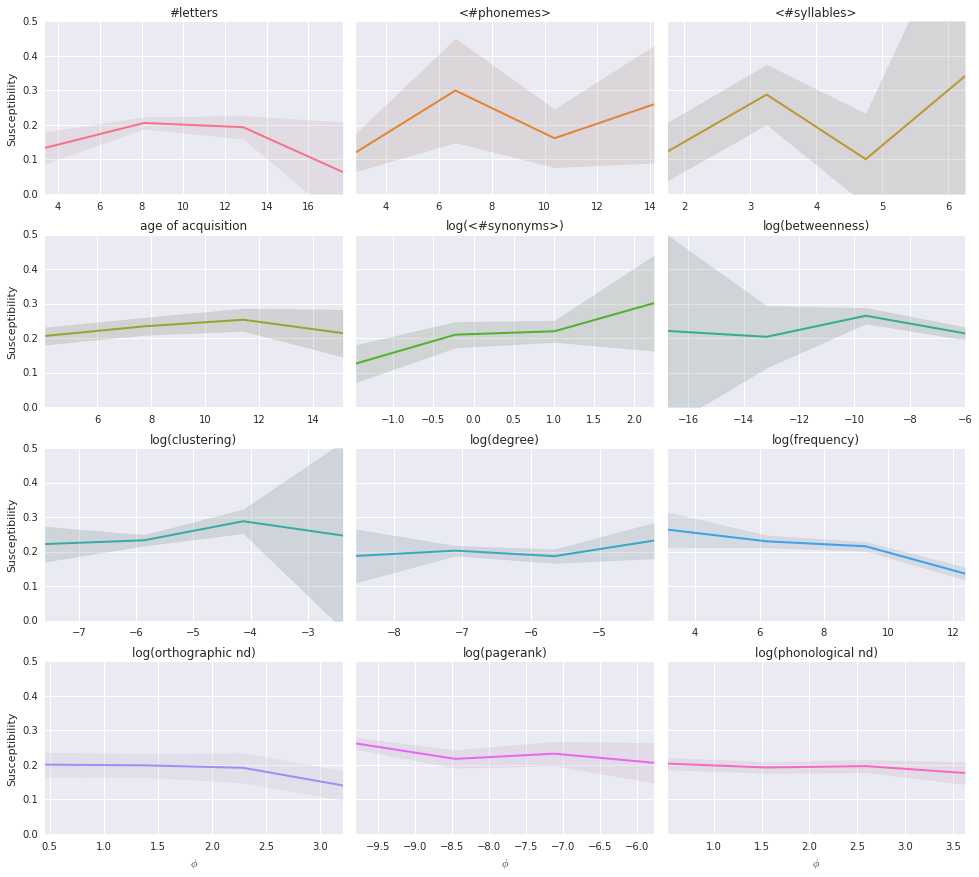

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=susties, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

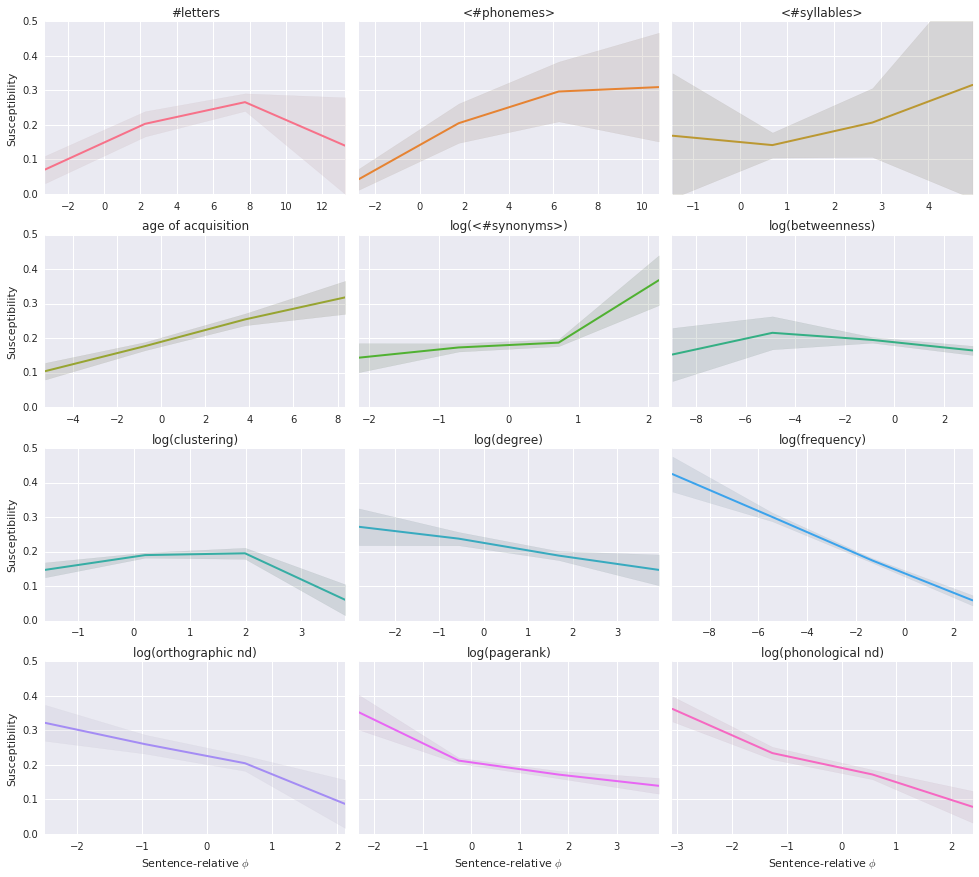

In [8]:
g = sb.FacetGrid(data=susties_rel, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on how confidence intervals are computed here**

There are three ways I can conceive of the computation represented in the graphs above:
1. For each word, we look at how many times it is substituted versus how many times it appears in a position where it could have been substituted. This is the *word*'s susceptibility, $\sigma(w)$. Then for each feature bin $b_i$ we take all the words such that $\phi(w) \in b_i$, average, and compute an asymptotic confidence interval based on how many words are in the bin. This fails for sentence-relative features, because a given word has different feature values depending on the sentence it appears in. So we discard this.
2. Do the same but at the feature value level. So we define a *feature value* susceptibility, $\sigma(f)$, and compute a confidence interval based on how many different feature values we have in the bin. The idea behind (1) and (2) is to look at the bin middle-value like the relevant object we're measuring, and we have several measures for each bin middle-value, hence the confidence interval. This is the way CIs are computed above.
3. Consider that we sample a multinomial process: each substitution is in fact the sampling of a feature value from one of the four bins. In that case, we can compute multinomial proportion CIs. This is also not satisfactory since in most cases not all feature values are available at the time of sampling, since most sentences don't range over all the feature's values. So for now I'm sticking with (2).

### 2.2 Feature susceptibilities, reduced to features we expose in the paper

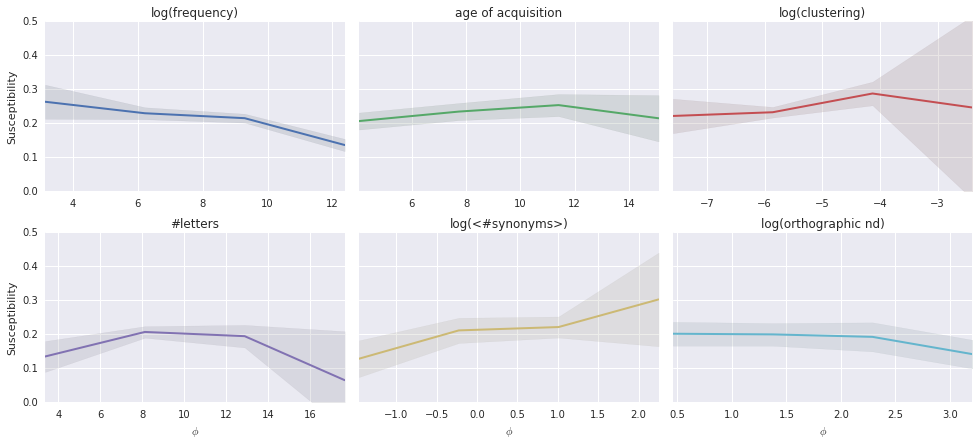

In [9]:
g = sb.FacetGrid(data=susties[susties['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

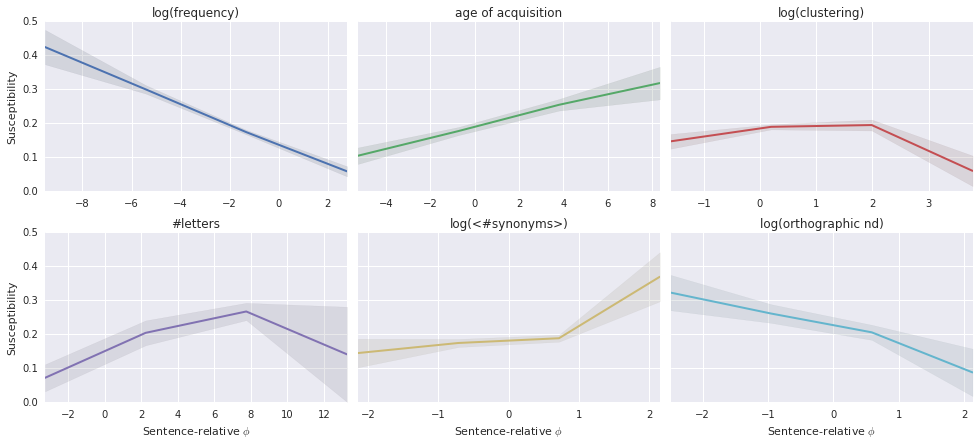

In [10]:
g = sb.FacetGrid(data=susties_rel[susties_rel['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

## 3 On which POS tags do substitutions fall?

In [11]:
poses = susty_words[susty_words.feature == 'aoa'][['POS', 'cluster_id', 'destination_id',
                                                   'occurrence', 'source_id', 'target',
                                                   'weight', 'weight_appeared', 'word']]
# Only take first letter of POS code to denote categories,
# and group stopword-like categories together.
stop_poses = ['C', 'F', 'I', 'M', 'P', 'S', 'U']
poses['rPOS'] = poses['POS']\
    .apply(lambda x: x[0])\
    .apply(lambda x: 'Stopword-like' if x in stop_poses else x)

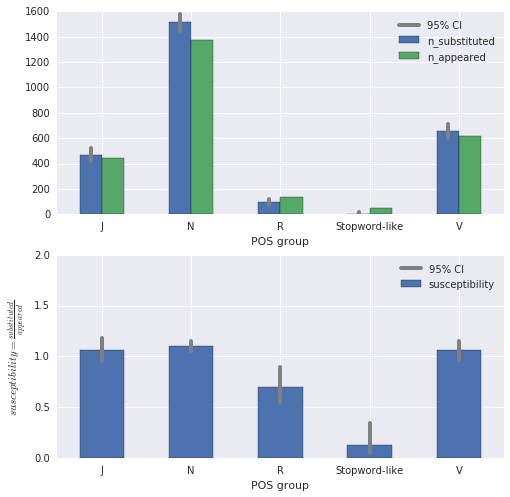

In [12]:
# Compute POS counts.
susty_pos = lambda x: ((x * poses.loc[x.index, 'weight']).sum() /
                       poses.loc[x.index, 'weight_appeared'].sum())
susties_pos = poses.groupby('rPOS')['target'].aggregate(
    {'susceptibility': susty_pos,
     'n_substituted': lambda x: (x * poses.loc[x.index, 'weight']).sum(),
     'n_appeared': lambda x: poses.loc[x.index, 'weight_appeared'].sum()}
).rename_axis('POS group')

# Plot.

fig, axes = plt.subplots(2, 1, figsize=(8, 8))
# Raw substituted and appeared values.
susties_pos[['n_substituted', 'n_appeared']].plot(ax=axes[0], kind='bar', rot=0)
# With their CIs.
total_substituted = susties_pos.n_substituted.sum()
cis = multinomial_proportions_confint(susties_pos.n_substituted.round(), method='goodman')
for i in range(len(susties_pos)):
    axes[0].plot([i-.125, i-.125], cis[i] * total_substituted, lw=4, color='grey',
                 label='95% CI' if i == 0 else None)
axes[0].legend()
# Substitutability values.
susties_pos['susceptibility'].plot(ax=axes[1], kind='bar', legend=True, ylim=(0, 2), rot=0)
axes[1].set_ylabel(r'$susceptibility = \frac{substituted}{appeared}$')
# With their CIs.
for i in range(len(susties_pos)):
    axes[1].plot([i, i], cis[i] * total_substituted / susties_pos.n_appeared.iloc[i],
                 lw=4, color='grey', label='95% CI' if i == 0 else None)
axes[1].legend(loc='best')
# Save if necessary.
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-pos_susceptibilities'),
                bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all POS tags are available to sample from in all the sentences. There's no way out of this, so we're going to use multinomial CIs. We can safely scale all the bars and CIs to their respective `n_appeared` values, since that is an independent given before the sampling.

**Are the appeared and substituted proportions statistically different?**

The only test we can easily do is a multinomial goodness-of-fit. This tells us if the `n_substituted` counts are significantly different from the reference `n_appeared` counts.

From there on we know a few things:
* Comparing a given POS's `n_substituted` count to its reference `n_appeared` count tells us if it's statistically different (< or >). We know this will be true individually for any POS that is out of its confidence region for the global goodness-of-fit test, since it's a weaker hypothesis (so the null rejection region will be wider, and the POS we're looking at is already in the rejection region for the global test). We don't know if it'll be true or not for POSes that are in their confidence region for the global test.
* Jointly comparing two POS's `n_substituted` counts to their reference `n_appeared` counts tells us if there is bias for one w.r.t. the other. This is also true for all pairs of POSes that are on alternate sides of their confidence region in the global test (for the same reasons as in the previous point). We don't know if it's true for the other POSes though.

In [13]:
# Test the n_substituted proportions are different from the n_appeared proportions
total_appeared = susties_pos.n_appeared.sum()
appeared_cis = multinomial_proportions_confint(susties_pos.n_appeared.round(), method='goodman')
differences = [(s < ci[0] * total_appeared) or (s > ci[1] * total_appeared)
               for s, ci in zip(susties_pos.n_substituted, appeared_cis)]
are_different = np.any(differences)
if are_different:
    print("Appeared and substituted proportions are different with p < .05")
    print("The following POS tags are out of their confidence region:",
          list(susties_pos.index[np.where(differences)[0]]))
else:
    print("Appeared and substituted proportions cannot be "
          "said different with p value better than .05")

Appeared and substituted proportions are different with p < .05
The following POS tags are out of their confidence region: ['N', 'R', 'Stopword-like']


## 4 Susceptibility in terms of absolute fractiles

In [14]:
def plot_absolute_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')

    # Compute feature bins.
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_fractiles = pd.qcut(data.value, bin_count, labels=False)
            break
        except ValueError:
            pass

    # Compute bin counts
    heights = np.zeros(bin_count)
    for i in range(bin_count):
        heights[i] = data[data.target & (x_fractiles == i)].weight.sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, bin_count + 1), heights, color=color)
    plt.fill_between(range(1, bin_count + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, bin_count + 1))
    plt.xlim(1, bin_count)
    plt.ylim(0, None)

### 4.1 All features susceptibilities

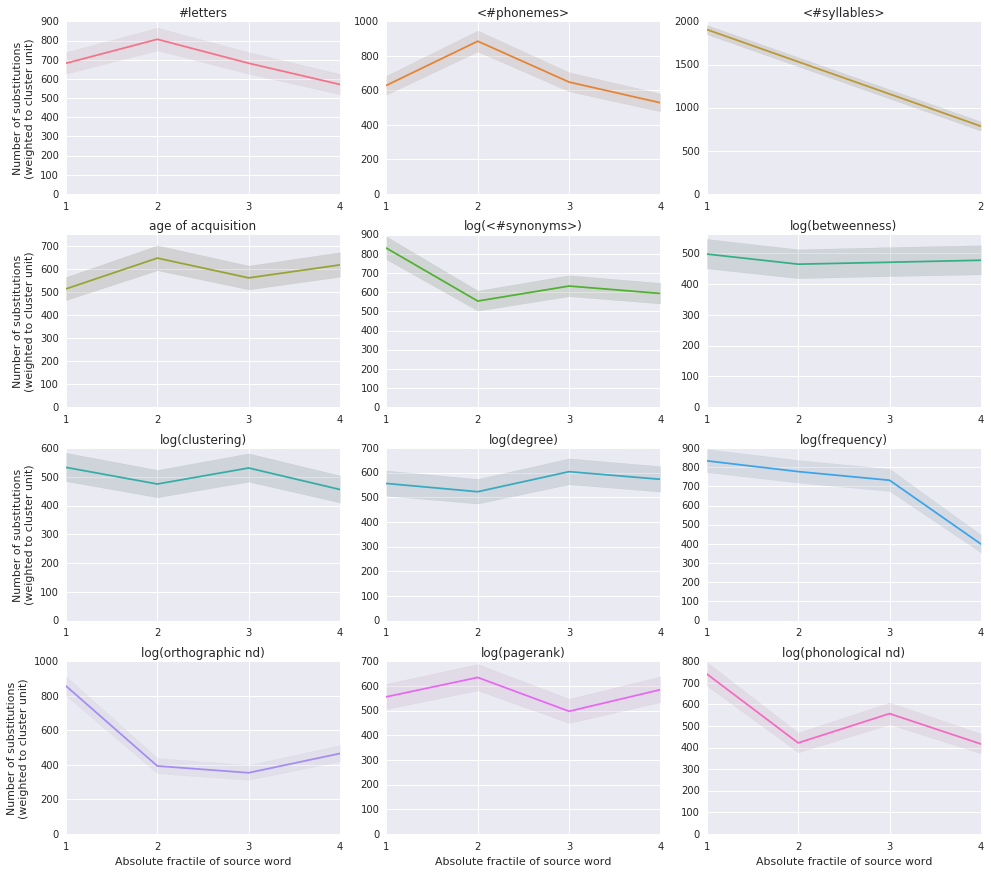

In [15]:
# Now plot.
g = sb.FacetGrid(data=susty_words, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're again in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all absolute feature fractiles are available to sample from in all the sentences. Again, there's no way out of this, so we're going to use multinomial CIs.

### 4.2 Feature susceptibilities, reduced to features we expose in the paper

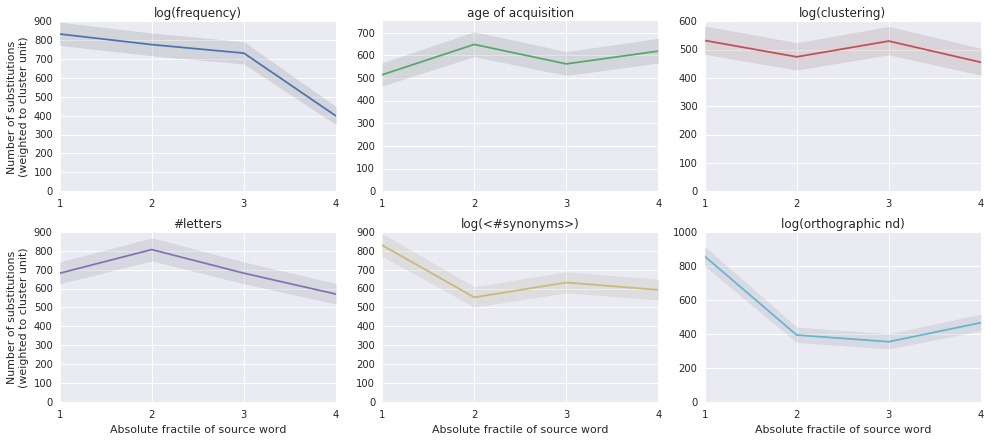

In [16]:
# Now plot.
g = sb.FacetGrid(data=susty_words[susty_words['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

## 5 Susceptibility in terms of sentence fractiles

Build our data.

In [17]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, _ = substitution.features(feature)
            if np.isnan(source):
                # The source word has no feature value. We drop this substitution.
                continue
            sentence, _ = substitution.source_destination_features(feature)
            # Remove stopwords from this analysis, since we dropped substitutions on stopwords.
            dslice = slice(substitution.start,
                           substitution.start + len(substitution.destination.tokens))
            is_stopword = np.array([(lemma in stopwords) or (token in stopwords)
                                    for (lemma, token) in
                                    zip(substitution.source.lemmas[dslice],
                                        substitution.source.tokens[dslice])])
            sentence[is_stopword] = np.nan
            # Find the number of bins we'll use.
            values = set(sentence[np.isfinite(sentence)])
            if len(values) == 0 or len(values) == 1:
                # Only NaNs, or only one feature value. Drop this.
                continue
            start, stop = None, None
            power = 0
            while start is None:
                if int(BIN_COUNT / 2**power) * 2**power != BIN_COUNT:
                    raise ValueError('BIN_COUNT must be a power of 2')
                try:
                    start = 2**power * pd.qcut(sentence, int(BIN_COUNT / 2**power),
                                               labels=False)[substitution.position]
                    stop = start + 2**power
                except ValueError:
                    power += 1
            # And finally save the bin.
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'start': start,
                         'stop': stop})

original_fractiles = pd.DataFrame(data)
del data

  0% (    2 of 87568) |                   | Elapsed Time: 0:00:01 ETA:  13:08:28

  0% (   10 of 87568) |                    | Elapsed Time: 0:00:02 ETA:  3:52:37

  0% (   15 of 87568) |                    | Elapsed Time: 0:00:03 ETA:  4:37:34

  0% (   23 of 87568) |                    | Elapsed Time: 0:00:04 ETA:  4:06:21

  0% (   32 of 87568) |                    | Elapsed Time: 0:00:05 ETA:  3:43:25

  0% (   44 of 87568) |                    | Elapsed Time: 0:00:06 ETA:  3:15:32

  0% (   50 of 87568) |                    | Elapsed Time: 0:00:07 ETA:  3:24:30

  0% (   59 of 87568) |                    | Elapsed Time: 0:00:08 ETA:  3:19:21

  0% (   75 of 87568) |                    | Elapsed Time: 0:00:09 ETA:  2:56:30

  0% (   83 of 87568) |                    | Elapsed Time: 0:00:11 ETA:  3:02:37

  0% (   92 of 87568) |                    | Elapsed Time: 0:00:12 ETA:  2:58:10

  0% (  101 of 87568) |                    | Elapsed Time: 0:00:13 ETA:  2:48:14

  0% (  108 of 87568) |                    | Elapsed Time: 0:00:14 ETA:  2:50:50

  0% (  113 of 87568) |                    | Elapsed Time: 0:00:15 ETA:  2:59:58

  0% (  129 of 87568) |                    | Elapsed Time: 0:00:16 ETA:  2:53:09

  0% (  140 of 87568) |                    | Elapsed Time: 0:00:17 ETA:  2:42:29

  0% (  158 of 87568) |                    | Elapsed Time: 0:00:18 ETA:  2:26:52

  0% (  167 of 87568) |                    | Elapsed Time: 0:00:19 ETA:  2:39:31

  0% (  183 of 87568) |                    | Elapsed Time: 0:00:21 ETA:  2:24:16

  0% (  191 of 87568) |                    | Elapsed Time: 0:00:22 ETA:  2:23:49

  0% (  196 of 87568) |                    | Elapsed Time: 0:00:23 ETA:  2:28:33

  0% (  205 of 87568) |                    | Elapsed Time: 0:00:24 ETA:  2:24:02

  0% (  216 of 87568) |                    | Elapsed Time: 0:00:25 ETA:  2:14:51

  0% (  223 of 87568) |                    | Elapsed Time: 0:00:26 ETA:  2:26:01

  0% (  239 of 87568) |                    | Elapsed Time: 0:00:27 ETA:  2:19:01

  0% (  248 of 87568) |                    | Elapsed Time: 0:00:28 ETA:  2:36:40

  0% (  252 of 87568) |                    | Elapsed Time: 0:00:29 ETA:  2:47:48

  0% (  265 of 87568) |                    | Elapsed Time: 0:00:31 ETA:  3:00:21

  0% (  271 of 87568) |                    | Elapsed Time: 0:00:32 ETA:  3:06:18

  0% (  279 of 87568) |                    | Elapsed Time: 0:00:33 ETA:  3:01:22

  0% (  293 of 87568) |                    | Elapsed Time: 0:00:34 ETA:  2:51:41

  0% (  302 of 87568) |                    | Elapsed Time: 0:00:35 ETA:  2:55:23

  0% (  310 of 87568) |                    | Elapsed Time: 0:00:36 ETA:  2:53:25

  0% (  331 of 87568) |                    | Elapsed Time: 0:00:37 ETA:  2:44:21

  0% (  346 of 87568) |                    | Elapsed Time: 0:00:38 ETA:  2:30:43

  0% (  361 of 87568) |                    | Elapsed Time: 0:00:39 ETA:  2:12:20

  0% (  370 of 87568) |                    | Elapsed Time: 0:00:40 ETA:  2:10:25

  0% (  383 of 87568) |                    | Elapsed Time: 0:00:41 ETA:  2:01:06

  0% (  389 of 87568) |                    | Elapsed Time: 0:00:42 ETA:  2:03:00

  0% (  395 of 87568) |                    | Elapsed Time: 0:00:43 ETA:  2:13:14

  0% (  402 of 87568) |                    | Elapsed Time: 0:00:44 ETA:  2:16:05

  0% (  412 of 87568) |                    | Elapsed Time: 0:00:46 ETA:  2:15:35

  0% (  419 of 87568) |                    | Elapsed Time: 0:00:47 ETA:  2:40:31

  0% (  431 of 87568) |                    | Elapsed Time: 0:00:48 ETA:  2:46:56

  0% (  441 of 87568) |                    | Elapsed Time: 0:00:49 ETA:  3:01:21

  0% (  449 of 87568) |                    | Elapsed Time: 0:00:50 ETA:  3:04:20

  0% (  458 of 87568) |                    | Elapsed Time: 0:00:51 ETA:  3:17:21

  0% (  464 of 87568) |                    | Elapsed Time: 0:00:53 ETA:  3:22:19

  0% (  469 of 87568) |                    | Elapsed Time: 0:00:54 ETA:  3:29:06

  0% (  475 of 87568) |                    | Elapsed Time: 0:00:55 ETA:  3:32:28

  0% (  480 of 87568) |                    | Elapsed Time: 0:00:56 ETA:  3:46:17

  0% (  488 of 87568) |                    | Elapsed Time: 0:00:57 ETA:  3:37:35

  0% (  495 of 87568) |                    | Elapsed Time: 0:00:58 ETA:  3:55:53

  0% (  500 of 87568) |                    | Elapsed Time: 0:01:00 ETA:  4:15:33

  0% (  506 of 87568) |                    | Elapsed Time: 0:01:01 ETA:  4:28:31

  0% (  514 of 87568) |                    | Elapsed Time: 0:01:02 ETA:  4:29:38

  0% (  523 of 87568) |                    | Elapsed Time: 0:01:03 ETA:  4:18:52

  0% (  529 of 87568) |                    | Elapsed Time: 0:01:04 ETA:  4:11:39

  0% (  534 of 87568) |                    | Elapsed Time: 0:01:06 ETA:  4:23:11

  0% (  545 of 87568) |                    | Elapsed Time: 0:01:07 ETA:  3:57:13

  0% (  552 of 87568) |                    | Elapsed Time: 0:01:08 ETA:  4:00:13

  0% (  558 of 87568) |                    | Elapsed Time: 0:01:09 ETA:  4:11:42

  0% (  564 of 87568) |                    | Elapsed Time: 0:01:10 ETA:  4:03:45

  0% (  578 of 87568) |                    | Elapsed Time: 0:01:11 ETA:  3:34:49

  0% (  585 of 87568) |                    | Elapsed Time: 0:01:12 ETA:  3:37:54

  0% (  591 of 87568) |                    | Elapsed Time: 0:01:14 ETA:  3:37:53

  0% (  597 of 87568) |                    | Elapsed Time: 0:01:15 ETA:  3:35:06

  0% (  608 of 87568) |                    | Elapsed Time: 0:01:16 ETA:  3:12:47

  0% (  611 of 87568) |                    | Elapsed Time: 0:01:17 ETA:  3:36:39

  0% (  618 of 87568) |                    | Elapsed Time: 0:01:18 ETA:  3:39:54

  0% (  625 of 87568) |                    | Elapsed Time: 0:01:19 ETA:  3:27:39

  0% (  637 of 87568) |                    | Elapsed Time: 0:01:20 ETA:  3:12:43

  0% (  644 of 87568) |                    | Elapsed Time: 0:01:21 ETA:  3:33:30

  0% (  650 of 87568) |                    | Elapsed Time: 0:01:22 ETA:  3:39:56

  0% (  654 of 87568) |                    | Elapsed Time: 0:01:23 ETA:  3:46:56

  0% (  662 of 87568) |                    | Elapsed Time: 0:01:24 ETA:  3:38:57

  0% (  669 of 87568) |                    | Elapsed Time: 0:01:26 ETA:  3:55:35

  0% (  673 of 87568) |                    | Elapsed Time: 0:01:27 ETA:  3:53:06

  0% (  678 of 87568) |                    | Elapsed Time: 0:01:28 ETA:  3:58:37

  0% (  689 of 87568) |                    | Elapsed Time: 0:01:29 ETA:  3:43:44

  0% (  696 of 87568) |                    | Elapsed Time: 0:01:30 ETA:  3:59:54

  0% (  701 of 87568) |                    | Elapsed Time: 0:01:31 ETA:  4:08:19

  0% (  707 of 87568) |                    | Elapsed Time: 0:01:32 ETA:  4:10:44

  0% (  716 of 87568) |                    | Elapsed Time: 0:01:33 ETA:  3:50:13

  0% (  723 of 87568) |                    | Elapsed Time: 0:01:34 ETA:  3:54:32

  0% (  728 of 87568) |                    | Elapsed Time: 0:01:35 ETA:  4:00:13

  0% (  734 of 87568) |                    | Elapsed Time: 0:01:36 ETA:  3:49:58

  0% (  742 of 87568) |                    | Elapsed Time: 0:01:37 ETA:  3:37:58

  0% (  752 of 87568) |                    | Elapsed Time: 0:01:38 ETA:  3:42:05

  0% (  757 of 87568) |                    | Elapsed Time: 0:01:39 ETA:  3:49:15

  0% (  764 of 87568) |                    | Elapsed Time: 0:01:41 ETA:  3:41:41

  0% (  781 of 87568) |                    | Elapsed Time: 0:01:42 ETA:  3:03:09

  0% (  795 of 87568) |                    | Elapsed Time: 0:01:43 ETA:  2:51:48

  0% (  812 of 87568) |                    | Elapsed Time: 0:01:44 ETA:  2:32:01

  0% (  826 of 87568) |                    | Elapsed Time: 0:01:45 ETA:  2:17:01

  0% (  843 of 87568) |                    | Elapsed Time: 0:01:46 ETA:  2:04:05

  0% (  864 of 87568) |                    | Elapsed Time: 0:01:47 ETA:  1:51:26

  1% (  885 of 87568) |                    | Elapsed Time: 0:01:48 ETA:  1:41:50

  1% (  903 of 87568) |                    | Elapsed Time: 0:01:49 ETA:  1:32:23

  1% (  922 of 87568) |                    | Elapsed Time: 0:01:50 ETA:  1:25:15

  1% (  941 of 87568) |                    | Elapsed Time: 0:01:51 ETA:  1:24:15

  1% (  957 of 87568) |                    | Elapsed Time: 0:01:52 ETA:  1:22:55

  1% (  968 of 87568) |                    | Elapsed Time: 0:01:53 ETA:  1:26:09

  1% (  989 of 87568) |                    | Elapsed Time: 0:01:54 ETA:  1:21:55

  1% ( 1009 of 87568) |                    | Elapsed Time: 0:01:55 ETA:  1:19:59

  1% ( 1027 of 87568) |                    | Elapsed Time: 0:01:56 ETA:  1:21:00

  1% ( 1048 of 87568) |                    | Elapsed Time: 0:01:57 ETA:  1:20:54

  1% ( 1069 of 87568) |                    | Elapsed Time: 0:01:58 ETA:  1:20:05

  1% ( 1092 of 87568) |                    | Elapsed Time: 0:01:59 ETA:  1:18:12

  1% ( 1095 of 87568) |                    | Elapsed Time: 0:02:00 ETA:  1:19:31

  1% ( 1119 of 87568) |                    | Elapsed Time: 0:02:01 ETA:  1:15:42

  1% ( 1144 of 87568) |                    | Elapsed Time: 0:02:02 ETA:  1:09:58

  1% ( 1154 of 87568) |                    | Elapsed Time: 0:02:03 ETA:  1:15:13

  1% ( 1171 of 87568) |                    | Elapsed Time: 0:02:04 ETA:  1:16:30

  1% ( 1184 of 87568) |                    | Elapsed Time: 0:02:05 ETA:  1:19:14

  1% ( 1210 of 87568) |                    | Elapsed Time: 0:02:06 ETA:  1:17:23

  1% ( 1240 of 87568) |                    | Elapsed Time: 0:02:07 ETA:  1:12:28

  1% ( 1270 of 87568) |                    | Elapsed Time: 0:02:08 ETA:  1:08:52

  1% ( 1306 of 87568) |                    | Elapsed Time: 0:02:09 ETA:  1:02:57

  1% ( 1337 of 87568) |                    | Elapsed Time: 0:02:10 ETA:  1:00:38

  1% ( 1381 of 87568) |                    | Elapsed Time: 0:02:11 ETA:  0:55:12

  1% ( 1434 of 87568) |                    | Elapsed Time: 0:02:12 ETA:  0:46:09

  1% ( 1477 of 87568) |                    | Elapsed Time: 0:02:13 ETA:  0:41:56

  1% ( 1525 of 87568) |                    | Elapsed Time: 0:02:14 ETA:  0:37:20

  1% ( 1561 of 87568) |                    | Elapsed Time: 0:02:15 ETA:  0:35:46

  1% ( 1604 of 87568) |                    | Elapsed Time: 0:02:16 ETA:  0:34:25

  1% ( 1648 of 87568) |                    | Elapsed Time: 0:02:17 ETA:  0:32:54

  1% ( 1694 of 87568) |                    | Elapsed Time: 0:02:18 ETA:  0:31:55

  1% ( 1745 of 87568) |                    | Elapsed Time: 0:02:19 ETA:  0:30:14

  2% ( 1797 of 87568) |                    | Elapsed Time: 0:02:20 ETA:  0:29:39

  2% ( 1844 of 87568) |                    | Elapsed Time: 0:02:21 ETA:  0:30:04

  2% ( 1888 of 87568) |                    | Elapsed Time: 0:02:22 ETA:  0:30:00

  2% ( 1934 of 87568) |                    | Elapsed Time: 0:02:23 ETA:  0:30:04

  2% ( 1993 of 87568) |                    | Elapsed Time: 0:02:24 ETA:  0:28:22

  2% ( 2041 of 87568) |                    | Elapsed Time: 0:02:25 ETA:  0:28:00

  2% ( 2100 of 87568) |                    | Elapsed Time: 0:02:26 ETA:  0:26:58

  2% ( 2164 of 87568) |                    | Elapsed Time: 0:02:27 ETA:  0:25:48

  2% ( 2190 of 87568) |                    | Elapsed Time: 0:02:28 ETA:  0:25:25

  2% ( 2253 of 87568) |                    | Elapsed Time: 0:02:29 ETA:  0:24:42

  2% ( 2310 of 87568) |                    | Elapsed Time: 0:02:30 ETA:  0:24:05

  2% ( 2381 of 87568) |                    | Elapsed Time: 0:02:31 ETA:  0:22:37

  2% ( 2435 of 87568) |                    | Elapsed Time: 0:02:32 ETA:  0:22:11

  2% ( 2483 of 87568) |                    | Elapsed Time: 0:02:33 ETA:  0:22:43

  2% ( 2540 of 87568) |                    | Elapsed Time: 0:02:34 ETA:  0:22:15

  2% ( 2610 of 87568) |                    | Elapsed Time: 0:02:35 ETA:  0:21:42

  3% ( 2662 of 87568) |                    | Elapsed Time: 0:02:36 ETA:  0:22:19

  3% ( 2722 of 87568) |                    | Elapsed Time: 0:02:37 ETA:  0:22:19

  3% ( 2770 of 87568) |                    | Elapsed Time: 0:02:38 ETA:  0:23:00

  3% ( 2821 of 87568) |                    | Elapsed Time: 0:02:39 ETA:  0:23:19

  3% ( 2857 of 87568) |                    | Elapsed Time: 0:02:40 ETA:  0:25:13

  3% ( 2905 of 87568) |                    | Elapsed Time: 0:02:41 ETA:  0:25:31

  3% ( 2966 of 87568) |                    | Elapsed Time: 0:02:42 ETA:  0:24:43

  3% ( 3029 of 87568) |                    | Elapsed Time: 0:02:43 ETA:  0:24:21

  3% ( 3089 of 87568) |                    | Elapsed Time: 0:02:44 ETA:  0:24:55

  3% ( 3153 of 87568) |                    | Elapsed Time: 0:02:45 ETA:  0:24:10

  3% ( 3223 of 87568) |                    | Elapsed Time: 0:02:46 ETA:  0:23:39

  3% ( 3284 of 87568) |                    | Elapsed Time: 0:02:47 ETA:  0:22:15

  3% ( 3368 of 87568) |                    | Elapsed Time: 0:02:48 ETA:  0:20:42

  3% ( 3436 of 87568) |                    | Elapsed Time: 0:02:49 ETA:  0:19:23

  3% ( 3494 of 87568) |                    | Elapsed Time: 0:02:50 ETA:  0:18:59

  4% ( 3556 of 87568) |                    | Elapsed Time: 0:02:51 ETA:  0:18:57

  4% ( 3619 of 87568) |                    | Elapsed Time: 0:02:52 ETA:  0:18:56

  4% ( 3687 of 87568) |                    | Elapsed Time: 0:02:53 ETA:  0:18:43

  4% ( 3758 of 87568) |                    | Elapsed Time: 0:02:54 ETA:  0:18:28

  4% ( 3823 of 87568) |                    | Elapsed Time: 0:02:55 ETA:  0:18:39

  4% ( 3882 of 87568) |                    | Elapsed Time: 0:02:56 ETA:  0:19:18

  4% ( 3956 of 87568) |                    | Elapsed Time: 0:02:57 ETA:  0:19:41

  4% ( 4028 of 87568) |                    | Elapsed Time: 0:02:58 ETA:  0:19:30

  4% ( 4107 of 87568) |                    | Elapsed Time: 0:02:59 ETA:  0:18:43

  4% ( 4183 of 87568) |                    | Elapsed Time: 0:03:00 ETA:  0:18:13

  4% ( 4257 of 87568) |                    | Elapsed Time: 0:03:01 ETA:  0:17:51

  4% ( 4334 of 87568) |                    | Elapsed Time: 0:03:02 ETA:  0:17:25

  5% ( 4379 of 87568) |#                   | Elapsed Time: 0:03:02 ETA:  0:17:20

  5% ( 4454 of 87568) |#                   | Elapsed Time: 0:03:03 ETA:  0:16:58

  5% ( 4530 of 87568) |#                   | Elapsed Time: 0:03:04 ETA:  0:16:25

  5% ( 4607 of 87568) |#                   | Elapsed Time: 0:03:05 ETA:  0:16:20

  5% ( 4682 of 87568) |#                   | Elapsed Time: 0:03:06 ETA:  0:16:23

  5% ( 4740 of 87568) |#                   | Elapsed Time: 0:03:07 ETA:  0:17:04

  5% ( 4800 of 87568) |#                   | Elapsed Time: 0:03:08 ETA:  0:17:34

  5% ( 4863 of 87568) |#                   | Elapsed Time: 0:03:09 ETA:  0:17:54

  5% ( 4912 of 87568) |#                   | Elapsed Time: 0:03:10 ETA:  0:18:57

  5% ( 4953 of 87568) |#                   | Elapsed Time: 0:03:12 ETA:  0:20:11

  5% ( 5006 of 87568) |#                   | Elapsed Time: 0:03:13 ETA:  0:21:07

  5% ( 5054 of 87568) |#                   | Elapsed Time: 0:03:14 ETA:  0:22:25

  5% ( 5114 of 87568) |#                   | Elapsed Time: 0:03:15 ETA:  0:23:15

  5% ( 5171 of 87568) |#                   | Elapsed Time: 0:03:16 ETA:  0:24:01

  5% ( 5232 of 87568) |#                   | Elapsed Time: 0:03:17 ETA:  0:23:44

  6% ( 5294 of 87568) |#                   | Elapsed Time: 0:03:18 ETA:  0:23:39

  6% ( 5356 of 87568) |#                   | Elapsed Time: 0:03:19 ETA:  0:23:45

  6% ( 5415 of 87568) |#                   | Elapsed Time: 0:03:20 ETA:  0:23:07

  6% ( 5473 of 87568) |#                   | Elapsed Time: 0:03:21 ETA:  0:22:03

  6% ( 5549 of 87568) |#                   | Elapsed Time: 0:03:22 ETA:  0:20:35

  6% ( 5610 of 87568) |#                   | Elapsed Time: 0:03:23 ETA:  0:20:32

  6% ( 5650 of 87568) |#                   | Elapsed Time: 0:03:24 ETA:  0:21:22

  6% ( 5709 of 87568) |#                   | Elapsed Time: 0:03:25 ETA:  0:21:28

  6% ( 5763 of 87568) |#                   | Elapsed Time: 0:03:26 ETA:  0:21:54

  6% ( 5822 of 87568) |#                   | Elapsed Time: 0:03:27 ETA:  0:22:03

  6% ( 5883 of 87568) |#                   | Elapsed Time: 0:03:28 ETA:  0:21:56

  6% ( 5941 of 87568) |#                   | Elapsed Time: 0:03:29 ETA:  0:21:41

  6% ( 6021 of 87568) |#                   | Elapsed Time: 0:03:30 ETA:  0:20:42

  6% ( 6092 of 87568) |#                   | Elapsed Time: 0:03:31 ETA:  0:20:54

  7% ( 6149 of 87568) |#                   | Elapsed Time: 0:03:32 ETA:  0:21:01

  7% ( 6221 of 87568) |#                   | Elapsed Time: 0:03:33 ETA:  0:19:38

  7% ( 6292 of 87568) |#                   | Elapsed Time: 0:03:34 ETA:  0:19:09

  7% ( 6362 of 87568) |#                   | Elapsed Time: 0:03:35 ETA:  0:18:28

  7% ( 6434 of 87568) |#                   | Elapsed Time: 0:03:36 ETA:  0:17:57

  7% ( 6502 of 87568) |#                   | Elapsed Time: 0:03:37 ETA:  0:17:43

  7% ( 6568 of 87568) |#                   | Elapsed Time: 0:03:38 ETA:  0:17:54

  7% ( 6636 of 87568) |#                   | Elapsed Time: 0:03:39 ETA:  0:18:00

  7% ( 6702 of 87568) |#                   | Elapsed Time: 0:03:40 ETA:  0:17:39

  7% ( 6762 of 87568) |#                   | Elapsed Time: 0:03:41 ETA:  0:18:07

  7% ( 6834 of 87568) |#                   | Elapsed Time: 0:03:42 ETA:  0:18:03

  7% ( 6904 of 87568) |#                   | Elapsed Time: 0:03:43 ETA:  0:18:01

  7% ( 6976 of 87568) |#                   | Elapsed Time: 0:03:44 ETA:  0:18:00

  8% ( 7045 of 87568) |#                   | Elapsed Time: 0:03:45 ETA:  0:17:56

  8% ( 7106 of 87568) |#                   | Elapsed Time: 0:03:46 ETA:  0:18:04

  8% ( 7215 of 87568) |#                   | Elapsed Time: 0:03:47 ETA:  0:16:38

  8% ( 7300 of 87568) |#                   | Elapsed Time: 0:03:48 ETA:  0:16:05

  8% ( 7387 of 87568) |#                   | Elapsed Time: 0:03:49 ETA:  0:15:27

  8% ( 7457 of 87568) |#                   | Elapsed Time: 0:03:50 ETA:  0:15:09

  8% ( 7531 of 87568) |#                   | Elapsed Time: 0:03:51 ETA:  0:15:05

  8% ( 7603 of 87568) |#                   | Elapsed Time: 0:03:52 ETA:  0:15:02

  8% ( 7663 of 87568) |#                   | Elapsed Time: 0:03:53 ETA:  0:14:55

  8% ( 7742 of 87568) |#                   | Elapsed Time: 0:03:54 ETA:  0:14:38

  8% ( 7835 of 87568) |#                   | Elapsed Time: 0:03:55 ETA:  0:13:47

  9% ( 7911 of 87568) |#                   | Elapsed Time: 0:03:56 ETA:  0:14:37

  9% ( 7986 of 87568) |#                   | Elapsed Time: 0:03:57 ETA:  0:14:52

  9% ( 8063 of 87568) |#                   | Elapsed Time: 0:03:58 ETA:  0:15:07

  9% ( 8149 of 87568) |#                   | Elapsed Time: 0:03:59 ETA:  0:14:41

  9% ( 8217 of 87568) |#                   | Elapsed Time: 0:04:00 ETA:  0:14:49

  9% ( 8295 of 87568) |#                   | Elapsed Time: 0:04:01 ETA:  0:14:37

  9% ( 8370 of 87568) |#                   | Elapsed Time: 0:04:02 ETA:  0:14:37

  9% ( 8441 of 87568) |#                   | Elapsed Time: 0:04:03 ETA:  0:14:49

  9% ( 8513 of 87568) |#                   | Elapsed Time: 0:04:04 ETA:  0:15:24

  9% ( 8588 of 87568) |#                   | Elapsed Time: 0:04:05 ETA:  0:15:25

  9% ( 8658 of 87568) |#                   | Elapsed Time: 0:04:06 ETA:  0:15:33

  9% ( 8734 of 87568) |#                   | Elapsed Time: 0:04:07 ETA:  0:15:34

 10% ( 8757 of 87568) |##                  | Elapsed Time: 0:04:07 ETA:  0:16:04

 10% ( 8827 of 87568) |##                  | Elapsed Time: 0:04:08 ETA:  0:15:59

 10% ( 8899 of 87568) |##                  | Elapsed Time: 0:04:09 ETA:  0:16:11

 10% ( 9007 of 87568) |##                  | Elapsed Time: 0:04:10 ETA:  0:15:05

 10% ( 9107 of 87568) |##                  | Elapsed Time: 0:04:11 ETA:  0:14:14

 10% ( 9179 of 87568) |##                  | Elapsed Time: 0:04:12 ETA:  0:14:13

 10% ( 9252 of 87568) |##                  | Elapsed Time: 0:04:13 ETA:  0:14:15

 10% ( 9324 of 87568) |##                  | Elapsed Time: 0:04:14 ETA:  0:14:10

 10% ( 9397 of 87568) |##                  | Elapsed Time: 0:04:15 ETA:  0:14:15

 10% ( 9469 of 87568) |##                  | Elapsed Time: 0:04:16 ETA:  0:14:17

 10% ( 9532 of 87568) |##                  | Elapsed Time: 0:04:17 ETA:  0:14:27

 10% ( 9600 of 87568) |##                  | Elapsed Time: 0:04:18 ETA:  0:14:34

 11% ( 9672 of 87568) |##                  | Elapsed Time: 0:04:19 ETA:  0:15:34

 11% ( 9744 of 87568) |##                  | Elapsed Time: 0:04:20 ETA:  0:16:26

 11% ( 9817 of 87568) |##                  | Elapsed Time: 0:04:21 ETA:  0:16:23

 11% ( 9852 of 87568) |##                  | Elapsed Time: 0:04:22 ETA:  0:16:30

 11% ( 9920 of 87568) |##                  | Elapsed Time: 0:04:23 ETA:  0:16:40

 11% ( 9993 of 87568) |##                  | Elapsed Time: 0:04:24 ETA:  0:16:39

 11% (10064 of 87568) |##                  | Elapsed Time: 0:04:25 ETA:  0:16:37

 11% (10134 of 87568) |##                  | Elapsed Time: 0:04:26 ETA:  0:16:21

 11% (10208 of 87568) |##                  | Elapsed Time: 0:04:27 ETA:  0:16:06

 11% (10279 of 87568) |##                  | Elapsed Time: 0:04:28 ETA:  0:16:08

 11% (10348 of 87568) |##                  | Elapsed Time: 0:04:29 ETA:  0:16:13

 11% (10418 of 87568) |##                  | Elapsed Time: 0:04:30 ETA:  0:16:19

 11% (10489 of 87568) |##                  | Elapsed Time: 0:04:31 ETA:  0:16:14

 12% (10562 of 87568) |##                  | Elapsed Time: 0:04:32 ETA:  0:16:01

 12% (10636 of 87568) |##                  | Elapsed Time: 0:04:33 ETA:  0:15:58

 12% (10708 of 87568) |##                  | Elapsed Time: 0:04:34 ETA:  0:15:57

 12% (10781 of 87568) |##                  | Elapsed Time: 0:04:35 ETA:  0:15:50

 12% (10854 of 87568) |##                  | Elapsed Time: 0:04:36 ETA:  0:15:52

 12% (10928 of 87568) |##                  | Elapsed Time: 0:04:37 ETA:  0:15:44

 12% (10946 of 87568) |##                  | Elapsed Time: 0:04:37 ETA:  0:15:37

 12% (11015 of 87568) |##                  | Elapsed Time: 0:04:38 ETA:  0:15:37

 12% (11082 of 87568) |##                  | Elapsed Time: 0:04:39 ETA:  0:15:46

 12% (11153 of 87568) |##                  | Elapsed Time: 0:04:40 ETA:  0:15:50

 12% (11215 of 87568) |##                  | Elapsed Time: 0:04:41 ETA:  0:16:16

 12% (11282 of 87568) |##                  | Elapsed Time: 0:04:42 ETA:  0:16:25

 12% (11345 of 87568) |##                  | Elapsed Time: 0:04:43 ETA:  0:16:49

 13% (11410 of 87568) |##                  | Elapsed Time: 0:04:44 ETA:  0:17:06

 13% (11473 of 87568) |##                  | Elapsed Time: 0:04:45 ETA:  0:17:32

 13% (11531 of 87568) |##                  | Elapsed Time: 0:04:46 ETA:  0:17:55

 13% (11593 of 87568) |##                  | Elapsed Time: 0:04:47 ETA:  0:18:20

 13% (11653 of 87568) |##                  | Elapsed Time: 0:04:48 ETA:  0:18:33

 13% (11713 of 87568) |##                  | Elapsed Time: 0:04:49 ETA:  0:19:00

 13% (11784 of 87568) |##                  | Elapsed Time: 0:04:50 ETA:  0:18:35

 13% (11866 of 87568) |##                  | Elapsed Time: 0:04:51 ETA:  0:17:57

 13% (11941 of 87568) |##                  | Elapsed Time: 0:04:52 ETA:  0:17:31

 13% (12022 of 87568) |##                  | Elapsed Time: 0:04:53 ETA:  0:16:55

 13% (12041 of 87568) |##                  | Elapsed Time: 0:04:54 ETA:  0:16:31

 13% (12114 of 87568) |##                  | Elapsed Time: 0:04:55 ETA:  0:15:55

 13% (12190 of 87568) |##                  | Elapsed Time: 0:04:56 ETA:  0:15:16

 13% (12257 of 87568) |##                  | Elapsed Time: 0:04:57 ETA:  0:15:01

 14% (12323 of 87568) |##                  | Elapsed Time: 0:04:58 ETA:  0:14:49

 14% (12401 of 87568) |##                  | Elapsed Time: 0:04:59 ETA:  0:14:34

 14% (12475 of 87568) |##                  | Elapsed Time: 0:05:00 ETA:  0:14:49

 14% (12547 of 87568) |##                  | Elapsed Time: 0:05:01 ETA:  0:14:50

 14% (12622 of 87568) |##                  | Elapsed Time: 0:05:02 ETA:  0:15:02

 14% (12695 of 87568) |##                  | Elapsed Time: 0:05:03 ETA:  0:15:09

 14% (12765 of 87568) |##                  | Elapsed Time: 0:05:04 ETA:  0:15:15

 14% (12831 of 87568) |##                  | Elapsed Time: 0:05:05 ETA:  0:15:34

 14% (12910 of 87568) |##                  | Elapsed Time: 0:05:06 ETA:  0:15:10

 14% (12987 of 87568) |##                  | Elapsed Time: 0:05:07 ETA:  0:14:49

 14% (13065 of 87568) |##                  | Elapsed Time: 0:05:08 ETA:  0:14:47

 15% (13136 of 87568) |###                 | Elapsed Time: 0:05:09 ETA:  0:15:08

 15% (13211 of 87568) |###                 | Elapsed Time: 0:05:10 ETA:  0:15:04

 15% (13289 of 87568) |###                 | Elapsed Time: 0:05:11 ETA:  0:14:54

 15% (13358 of 87568) |###                 | Elapsed Time: 0:05:12 ETA:  0:14:54

 15% (13423 of 87568) |###                 | Elapsed Time: 0:05:13 ETA:  0:14:54

 15% (13495 of 87568) |###                 | Elapsed Time: 0:05:14 ETA:  0:15:07

 15% (13561 of 87568) |###                 | Elapsed Time: 0:05:15 ETA:  0:15:28

 15% (13624 of 87568) |###                 | Elapsed Time: 0:05:16 ETA:  0:16:01

 15% (13697 of 87568) |###                 | Elapsed Time: 0:05:17 ETA:  0:15:36

 15% (13768 of 87568) |###                 | Elapsed Time: 0:05:18 ETA:  0:15:35

 15% (13833 of 87568) |###                 | Elapsed Time: 0:05:19 ETA:  0:15:55

 15% (13907 of 87568) |###                 | Elapsed Time: 0:05:20 ETA:  0:16:01

 15% (13979 of 87568) |###                 | Elapsed Time: 0:05:21 ETA:  0:15:54

 16% (14056 of 87568) |###                 | Elapsed Time: 0:05:22 ETA:  0:15:29

 16% (14136 of 87568) |###                 | Elapsed Time: 0:05:23 ETA:  0:15:12

 16% (14213 of 87568) |###                 | Elapsed Time: 0:05:24 ETA:  0:14:50

 16% (14230 of 87568) |###                 | Elapsed Time: 0:05:24 ETA:  0:14:26

 16% (14309 of 87568) |###                 | Elapsed Time: 0:05:25 ETA:  0:14:12

 16% (14388 of 87568) |###                 | Elapsed Time: 0:05:26 ETA:  0:13:54

 16% (14469 of 87568) |###                 | Elapsed Time: 0:05:27 ETA:  0:13:25

 16% (14543 of 87568) |###                 | Elapsed Time: 0:05:28 ETA:  0:13:24

 16% (14627 of 87568) |###                 | Elapsed Time: 0:05:29 ETA:  0:13:02

 16% (14708 of 87568) |###                 | Elapsed Time: 0:05:30 ETA:  0:12:54

 16% (14787 of 87568) |###                 | Elapsed Time: 0:05:31 ETA:  0:12:56

 16% (14872 of 87568) |###                 | Elapsed Time: 0:05:32 ETA:  0:12:42

 17% (14954 of 87568) |###                 | Elapsed Time: 0:05:33 ETA:  0:12:39

 17% (15038 of 87568) |###                 | Elapsed Time: 0:05:34 ETA:  0:12:31

 17% (15124 of 87568) |###                 | Elapsed Time: 0:05:35 ETA:  0:12:20

 17% (15202 of 87568) |###                 | Elapsed Time: 0:05:36 ETA:  0:12:32

 17% (15283 of 87568) |###                 | Elapsed Time: 0:05:37 ETA:  0:12:22

 17% (15325 of 87568) |###                 | Elapsed Time: 0:05:38 ETA:  0:12:28

 17% (15403 of 87568) |###                 | Elapsed Time: 0:05:39 ETA:  0:12:32

 17% (15486 of 87568) |###                 | Elapsed Time: 0:05:40 ETA:  0:12:25

 17% (15569 of 87568) |###                 | Elapsed Time: 0:05:41 ETA:  0:12:27

 17% (15651 of 87568) |###                 | Elapsed Time: 0:05:42 ETA:  0:12:25

 17% (15732 of 87568) |###                 | Elapsed Time: 0:05:43 ETA:  0:12:30

 18% (15814 of 87568) |###                 | Elapsed Time: 0:05:44 ETA:  0:12:36

 18% (15895 of 87568) |###                 | Elapsed Time: 0:05:45 ETA:  0:12:20

 18% (15979 of 87568) |###                 | Elapsed Time: 0:05:46 ETA:  0:12:14

 18% (16058 of 87568) |###                 | Elapsed Time: 0:05:47 ETA:  0:12:15

 18% (16138 of 87568) |###                 | Elapsed Time: 0:05:48 ETA:  0:12:10

 18% (16222 of 87568) |###                 | Elapsed Time: 0:05:49 ETA:  0:12:07

 18% (16298 of 87568) |###                 | Elapsed Time: 0:05:50 ETA:  0:12:17

 18% (16374 of 87568) |###                 | Elapsed Time: 0:05:51 ETA:  0:12:25

 18% (16419 of 87568) |###                 | Elapsed Time: 0:05:51 ETA:  0:12:18

 18% (16498 of 87568) |###                 | Elapsed Time: 0:05:52 ETA:  0:12:21

 18% (16568 of 87568) |###                 | Elapsed Time: 0:05:53 ETA:  0:12:38

 18% (16632 of 87568) |###                 | Elapsed Time: 0:05:54 ETA:  0:13:12

 19% (16713 of 87568) |###                 | Elapsed Time: 0:05:55 ETA:  0:13:07

 19% (16791 of 87568) |###                 | Elapsed Time: 0:05:56 ETA:  0:13:11

 19% (16852 of 87568) |###                 | Elapsed Time: 0:05:57 ETA:  0:13:53

 19% (16887 of 87568) |###                 | Elapsed Time: 0:05:58 ETA:  0:15:15

 19% (16961 of 87568) |###                 | Elapsed Time: 0:05:59 ETA:  0:15:20

 19% (17047 of 87568) |###                 | Elapsed Time: 0:06:00 ETA:  0:15:05

 19% (17124 of 87568) |###                 | Elapsed Time: 0:06:01 ETA:  0:15:09

 19% (17205 of 87568) |###                 | Elapsed Time: 0:06:02 ETA:  0:14:46

 19% (17282 of 87568) |###                 | Elapsed Time: 0:06:03 ETA:  0:14:19

 19% (17361 of 87568) |###                 | Elapsed Time: 0:06:04 ETA:  0:14:22

 19% (17445 of 87568) |###                 | Elapsed Time: 0:06:05 ETA:  0:14:10

 20% (17514 of 87568) |####                | Elapsed Time: 0:06:06 ETA:  0:13:33

 20% (17588 of 87568) |####                | Elapsed Time: 0:06:07 ETA:  0:12:26

 20% (17651 of 87568) |####                | Elapsed Time: 0:06:08 ETA:  0:12:44

 20% (17725 of 87568) |####                | Elapsed Time: 0:06:09 ETA:  0:13:02

 20% (17809 of 87568) |####                | Elapsed Time: 0:06:10 ETA:  0:12:50

 20% (17894 of 87568) |####                | Elapsed Time: 0:06:11 ETA:  0:12:43

 20% (17976 of 87568) |####                | Elapsed Time: 0:06:12 ETA:  0:12:33

 20% (18058 of 87568) |####                | Elapsed Time: 0:06:13 ETA:  0:12:27

 20% (18142 of 87568) |####                | Elapsed Time: 0:06:14 ETA:  0:12:25

 20% (18224 of 87568) |####                | Elapsed Time: 0:06:15 ETA:  0:12:24

 20% (18294 of 87568) |####                | Elapsed Time: 0:06:16 ETA:  0:12:28

 20% (18372 of 87568) |####                | Elapsed Time: 0:06:17 ETA:  0:12:02

 21% (18436 of 87568) |####                | Elapsed Time: 0:06:18 ETA:  0:12:17

 21% (18521 of 87568) |####                | Elapsed Time: 0:06:19 ETA:  0:12:14

 21% (18609 of 87568) |####                | Elapsed Time: 0:06:20 ETA:  0:12:09

 21% (18691 of 87568) |####                | Elapsed Time: 0:06:21 ETA:  0:12:08

 21% (18769 of 87568) |####                | Elapsed Time: 0:06:22 ETA:  0:12:13

 21% (18854 of 87568) |####                | Elapsed Time: 0:06:23 ETA:  0:12:11

 21% (18939 of 87568) |####                | Elapsed Time: 0:06:24 ETA:  0:12:03

 21% (19022 of 87568) |####                | Elapsed Time: 0:06:25 ETA:  0:11:43

 21% (19101 of 87568) |####                | Elapsed Time: 0:06:26 ETA:  0:11:41

 21% (19185 of 87568) |####                | Elapsed Time: 0:06:27 ETA:  0:11:11

 22% (19293 of 87568) |####                | Elapsed Time: 0:06:28 ETA:  0:10:37

 22% (19383 of 87568) |####                | Elapsed Time: 0:06:29 ETA:  0:10:34

 22% (19454 of 87568) |####                | Elapsed Time: 0:06:30 ETA:  0:10:48

 22% (19529 of 87568) |####                | Elapsed Time: 0:06:31 ETA:  0:10:51

 22% (19598 of 87568) |####                | Elapsed Time: 0:06:32 ETA:  0:11:12

 22% (19666 of 87568) |####                | Elapsed Time: 0:06:33 ETA:  0:11:37

 22% (19703 of 87568) |####                | Elapsed Time: 0:06:34 ETA:  0:11:51

 22% (19766 of 87568) |####                | Elapsed Time: 0:06:40 ETA:  0:22:09

 22% (19838 of 87568) |####                | Elapsed Time: 0:06:41 ETA:  0:22:41

 22% (19914 of 87568) |####                | Elapsed Time: 0:06:42 ETA:  0:24:10

 22% (19993 of 87568) |####                | Elapsed Time: 0:06:43 ETA:  0:24:42

 22% (20066 of 87568) |####                | Elapsed Time: 0:06:44 ETA:  0:24:35

 22% (20140 of 87568) |####                | Elapsed Time: 0:06:45 ETA:  0:24:37

 23% (20212 of 87568) |####                | Elapsed Time: 0:06:46 ETA:  0:24:27

 23% (20277 of 87568) |####                | Elapsed Time: 0:06:47 ETA:  0:24:37

 23% (20338 of 87568) |####                | Elapsed Time: 0:06:48 ETA:  0:24:27

 23% (20402 of 87568) |####                | Elapsed Time: 0:06:49 ETA:  0:13:59

 23% (20463 of 87568) |####                | Elapsed Time: 0:06:50 ETA:  0:14:20

 23% (20525 of 87568) |####                | Elapsed Time: 0:06:51 ETA:  0:14:50

 23% (20596 of 87568) |####                | Elapsed Time: 0:06:52 ETA:  0:15:07

 23% (20667 of 87568) |####                | Elapsed Time: 0:06:53 ETA:  0:15:09

 23% (20748 of 87568) |####                | Elapsed Time: 0:06:54 ETA:  0:14:54

 23% (20798 of 87568) |####                | Elapsed Time: 0:06:54 ETA:  0:15:01

 23% (20870 of 87568) |####                | Elapsed Time: 0:06:55 ETA:  0:14:42

 23% (20949 of 87568) |####                | Elapsed Time: 0:06:56 ETA:  0:14:02

 24% (21026 of 87568) |####                | Elapsed Time: 0:06:57 ETA:  0:13:35

 24% (21111 of 87568) |####                | Elapsed Time: 0:06:58 ETA:  0:12:48

 24% (21189 of 87568) |####                | Elapsed Time: 0:06:59 ETA:  0:12:17

 24% (21259 of 87568) |####                | Elapsed Time: 0:07:00 ETA:  0:12:18

 24% (21308 of 87568) |####                | Elapsed Time: 0:07:01 ETA:  0:12:56

 24% (21355 of 87568) |####                | Elapsed Time: 0:07:02 ETA:  0:14:01

 24% (21403 of 87568) |####                | Elapsed Time: 0:07:03 ETA:  0:14:46

 24% (21471 of 87568) |####                | Elapsed Time: 0:07:04 ETA:  0:14:53

 24% (21534 of 87568) |####                | Elapsed Time: 0:07:05 ETA:  0:15:29

 24% (21603 of 87568) |####                | Elapsed Time: 0:07:07 ETA:  0:15:47

 24% (21698 of 87568) |####                | Elapsed Time: 0:07:08 ETA:  0:15:22

 24% (21786 of 87568) |####                | Elapsed Time: 0:07:09 ETA:  0:14:59

 24% (21869 of 87568) |####                | Elapsed Time: 0:07:10 ETA:  0:14:29

 25% (21892 of 87568) |#####               | Elapsed Time: 0:07:10 ETA:  0:13:53

 25% (21963 of 87568) |#####               | Elapsed Time: 0:07:11 ETA:  0:13:02

 25% (22025 of 87568) |#####               | Elapsed Time: 0:07:12 ETA:  0:12:33

 25% (22099 of 87568) |#####               | Elapsed Time: 0:07:13 ETA:  0:12:21

 25% (22170 of 87568) |#####               | Elapsed Time: 0:07:14 ETA:  0:12:06

 25% (22245 of 87568) |#####               | Elapsed Time: 0:07:15 ETA:  0:11:54

 25% (22313 of 87568) |#####               | Elapsed Time: 0:07:16 ETA:  0:12:43

 25% (22377 of 87568) |#####               | Elapsed Time: 0:07:17 ETA:  0:13:31

 25% (22449 of 87568) |#####               | Elapsed Time: 0:07:18 ETA:  0:14:02

 25% (22528 of 87568) |#####               | Elapsed Time: 0:07:19 ETA:  0:13:35

 25% (22613 of 87568) |#####               | Elapsed Time: 0:07:20 ETA:  0:13:08

 25% (22688 of 87568) |#####               | Elapsed Time: 0:07:21 ETA:  0:12:43

 25% (22760 of 87568) |#####               | Elapsed Time: 0:07:22 ETA:  0:12:46

 26% (22825 of 87568) |#####               | Elapsed Time: 0:07:23 ETA:  0:12:55

 26% (22887 of 87568) |#####               | Elapsed Time: 0:07:24 ETA:  0:13:18

 26% (22952 of 87568) |#####               | Elapsed Time: 0:07:25 ETA:  0:13:24

 26% (22987 of 87568) |#####               | Elapsed Time: 0:07:26 ETA:  0:13:12

 26% (23053 of 87568) |#####               | Elapsed Time: 0:07:27 ETA:  0:13:17

 26% (23110 of 87568) |#####               | Elapsed Time: 0:07:28 ETA:  0:14:03

 26% (23181 of 87568) |#####               | Elapsed Time: 0:07:29 ETA:  0:14:34

 26% (23258 of 87568) |#####               | Elapsed Time: 0:07:30 ETA:  0:14:28

 26% (23335 of 87568) |#####               | Elapsed Time: 0:07:31 ETA:  0:14:16

 26% (23416 of 87568) |#####               | Elapsed Time: 0:07:32 ETA:  0:13:40

 26% (23488 of 87568) |#####               | Elapsed Time: 0:07:33 ETA:  0:13:17

 26% (23560 of 87568) |#####               | Elapsed Time: 0:07:34 ETA:  0:13:01

 26% (23640 of 87568) |#####               | Elapsed Time: 0:07:35 ETA:  0:12:40

 27% (23718 of 87568) |#####               | Elapsed Time: 0:07:36 ETA:  0:12:17

 27% (23790 of 87568) |#####               | Elapsed Time: 0:07:37 ETA:  0:11:50

 27% (23864 of 87568) |#####               | Elapsed Time: 0:07:38 ETA:  0:11:44

 27% (23935 of 87568) |#####               | Elapsed Time: 0:07:39 ETA:  0:11:53

 27% (24007 of 87568) |#####               | Elapsed Time: 0:07:40 ETA:  0:12:00

 27% (24082 of 87568) |#####               | Elapsed Time: 0:07:41 ETA:  0:11:45

 27% (24172 of 87568) |#####               | Elapsed Time: 0:07:42 ETA:  0:11:14

 27% (24258 of 87568) |#####               | Elapsed Time: 0:07:43 ETA:  0:10:50

 27% (24340 of 87568) |#####               | Elapsed Time: 0:07:44 ETA:  0:10:45

 27% (24432 of 87568) |#####               | Elapsed Time: 0:07:45 ETA:  0:10:22

 27% (24513 of 87568) |#####               | Elapsed Time: 0:07:46 ETA:  0:10:07

 28% (24608 of 87568) |#####               | Elapsed Time: 0:07:47 ETA:  0:09:36

 28% (24703 of 87568) |#####               | Elapsed Time: 0:07:48 ETA:  0:09:01

 28% (24792 of 87568) |#####               | Elapsed Time: 0:07:49 ETA:  0:08:38

 28% (24886 of 87568) |#####               | Elapsed Time: 0:07:50 ETA:  0:08:35

 28% (24953 of 87568) |#####               | Elapsed Time: 0:07:51 ETA:  0:09:03

 28% (25029 of 87568) |#####               | Elapsed Time: 0:07:52 ETA:  0:09:15

 28% (25100 of 87568) |#####               | Elapsed Time: 0:07:53 ETA:  0:09:29

 28% (25176 of 87568) |#####               | Elapsed Time: 0:07:53 ETA:  0:09:17

 28% (25279 of 87568) |#####               | Elapsed Time: 0:07:54 ETA:  0:08:47

 28% (25344 of 87568) |#####               | Elapsed Time: 0:07:55 ETA:  0:09:26

 29% (25433 of 87568) |#####               | Elapsed Time: 0:07:56 ETA:  0:09:34

 29% (25531 of 87568) |#####               | Elapsed Time: 0:07:57 ETA:  0:09:20

 29% (25626 of 87568) |#####               | Elapsed Time: 0:07:58 ETA:  0:09:18

 29% (25711 of 87568) |#####               | Elapsed Time: 0:07:59 ETA:  0:08:52

 29% (25793 of 87568) |#####               | Elapsed Time: 0:08:00 ETA:  0:08:43

 29% (25895 of 87568) |#####               | Elapsed Time: 0:08:01 ETA:  0:08:03

 29% (25975 of 87568) |#####               | Elapsed Time: 0:08:02 ETA:  0:08:29

 29% (26051 of 87568) |#####               | Elapsed Time: 0:08:03 ETA:  0:09:03

 29% (26135 of 87568) |#####               | Elapsed Time: 0:08:04 ETA:  0:08:37

 29% (26205 of 87568) |#####               | Elapsed Time: 0:08:05 ETA:  0:09:02

 30% (26271 of 87568) |######              | Elapsed Time: 0:08:06 ETA:  0:09:21

 30% (26352 of 87568) |######              | Elapsed Time: 0:08:07 ETA:  0:09:42

 30% (26425 of 87568) |######              | Elapsed Time: 0:08:08 ETA:  0:10:01

 30% (26496 of 87568) |######              | Elapsed Time: 0:08:09 ETA:  0:10:17

 30% (26598 of 87568) |######              | Elapsed Time: 0:08:10 ETA:  0:10:16

 30% (26673 of 87568) |######              | Elapsed Time: 0:08:11 ETA:  0:10:23

 30% (26746 of 87568) |######              | Elapsed Time: 0:08:12 ETA:  0:10:26

 30% (26822 of 87568) |######              | Elapsed Time: 0:08:13 ETA:  0:10:39

 30% (26910 of 87568) |######              | Elapsed Time: 0:08:14 ETA:  0:10:09

 30% (27001 of 87568) |######              | Elapsed Time: 0:08:15 ETA:  0:09:54

 30% (27093 of 87568) |######              | Elapsed Time: 0:08:16 ETA:  0:09:35

 31% (27188 of 87568) |######              | Elapsed Time: 0:08:17 ETA:  0:09:01

 31% (27270 of 87568) |######              | Elapsed Time: 0:08:18 ETA:  0:08:46

 31% (27334 of 87568) |######              | Elapsed Time: 0:08:19 ETA:  0:09:38

 31% (27365 of 87568) |######              | Elapsed Time: 0:08:20 ETA:  0:09:37

 31% (27483 of 87568) |######              | Elapsed Time: 0:08:21 ETA:  0:08:29

 31% (27578 of 87568) |######              | Elapsed Time: 0:08:22 ETA:  0:08:02

 31% (27655 of 87568) |######              | Elapsed Time: 0:08:23 ETA:  0:08:15

 31% (27736 of 87568) |######              | Elapsed Time: 0:08:24 ETA:  0:08:28

 31% (27839 of 87568) |######              | Elapsed Time: 0:08:25 ETA:  0:08:12

 31% (27912 of 87568) |######              | Elapsed Time: 0:08:26 ETA:  0:08:42

 31% (27976 of 87568) |######              | Elapsed Time: 0:08:27 ETA:  0:09:07

 32% (28052 of 87568) |######              | Elapsed Time: 0:08:28 ETA:  0:08:48

 32% (28120 of 87568) |######              | Elapsed Time: 0:08:29 ETA:  0:08:59

 32% (28193 of 87568) |######              | Elapsed Time: 0:08:30 ETA:  0:10:06

 32% (28285 of 87568) |######              | Elapsed Time: 0:08:31 ETA:  0:10:09

 32% (28380 of 87568) |######              | Elapsed Time: 0:08:32 ETA:  0:09:39

 32% (28460 of 87568) |######              | Elapsed Time: 0:08:33 ETA:  0:09:25

 32% (28543 of 87568) |######              | Elapsed Time: 0:08:34 ETA:  0:09:56

 32% (28641 of 87568) |######              | Elapsed Time: 0:08:35 ETA:  0:09:17

 32% (28711 of 87568) |######              | Elapsed Time: 0:08:36 ETA:  0:09:07

 32% (28790 of 87568) |######              | Elapsed Time: 0:08:37 ETA:  0:09:02

 32% (28859 of 87568) |######              | Elapsed Time: 0:08:38 ETA:  0:08:59

 33% (28933 of 87568) |######              | Elapsed Time: 0:08:39 ETA:  0:08:57

 33% (29003 of 87568) |######              | Elapsed Time: 0:08:40 ETA:  0:09:28

 33% (29064 of 87568) |######              | Elapsed Time: 0:08:41 ETA:  0:10:21

 33% (29147 of 87568) |######              | Elapsed Time: 0:08:42 ETA:  0:10:31

 33% (29237 of 87568) |######              | Elapsed Time: 0:08:43 ETA:  0:10:18

 33% (29301 of 87568) |######              | Elapsed Time: 0:08:44 ETA:  0:11:14

 33% (29378 of 87568) |######              | Elapsed Time: 0:08:45 ETA:  0:11:01

 33% (29454 of 87568) |######              | Elapsed Time: 0:08:46 ETA:  0:11:06

 33% (29535 of 87568) |######              | Elapsed Time: 0:08:47 ETA:  0:10:44

 33% (29555 of 87568) |######              | Elapsed Time: 0:08:47 ETA:  0:10:41

 33% (29635 of 87568) |######              | Elapsed Time: 0:08:48 ETA:  0:10:22

 33% (29706 of 87568) |######              | Elapsed Time: 0:08:49 ETA:  0:10:04

 34% (29776 of 87568) |######              | Elapsed Time: 0:08:50 ETA:  0:10:26

 34% (29849 of 87568) |######              | Elapsed Time: 0:08:51 ETA:  0:10:58

 34% (29928 of 87568) |######              | Elapsed Time: 0:08:52 ETA:  0:10:29

 34% (30019 of 87568) |######              | Elapsed Time: 0:08:53 ETA:  0:10:03

 34% (30078 of 87568) |######              | Elapsed Time: 0:08:54 ETA:  0:10:35

 34% (30131 of 87568) |######              | Elapsed Time: 0:08:55 ETA:  0:11:29

 34% (30192 of 87568) |######              | Elapsed Time: 0:08:56 ETA:  0:11:53

 34% (30244 of 87568) |######              | Elapsed Time: 0:08:57 ETA:  0:12:50

 34% (30318 of 87568) |######              | Elapsed Time: 0:08:58 ETA:  0:12:42

 34% (30388 of 87568) |######              | Elapsed Time: 0:08:59 ETA:  0:12:41

 34% (30467 of 87568) |######              | Elapsed Time: 0:09:00 ETA:  0:12:27

 34% (30546 of 87568) |######              | Elapsed Time: 0:09:01 ETA:  0:12:25

 34% (30609 of 87568) |######              | Elapsed Time: 0:09:02 ETA:  0:13:24

 35% (30649 of 87568) |#######             | Elapsed Time: 0:09:03 ETA:  0:13:02

 35% (30706 of 87568) |#######             | Elapsed Time: 0:09:04 ETA:  0:12:53

 35% (30757 of 87568) |#######             | Elapsed Time: 0:09:05 ETA:  0:13:14

 35% (30823 of 87568) |#######             | Elapsed Time: 0:09:06 ETA:  0:12:39

 35% (30889 of 87568) |#######             | Elapsed Time: 0:09:07 ETA:  0:12:56

 35% (30964 of 87568) |#######             | Elapsed Time: 0:09:08 ETA:  0:12:43

 35% (31035 of 87568) |#######             | Elapsed Time: 0:09:09 ETA:  0:13:05

 35% (31106 of 87568) |#######             | Elapsed Time: 0:09:10 ETA:  0:13:24

 35% (31178 of 87568) |#######             | Elapsed Time: 0:09:11 ETA:  0:13:02

 35% (31252 of 87568) |#######             | Elapsed Time: 0:09:12 ETA:  0:12:47

 35% (31318 of 87568) |#######             | Elapsed Time: 0:09:13 ETA:  0:12:27

 35% (31384 of 87568) |#######             | Elapsed Time: 0:09:14 ETA:  0:11:59

 35% (31460 of 87568) |#######             | Elapsed Time: 0:09:15 ETA:  0:11:39

 36% (31550 of 87568) |#######             | Elapsed Time: 0:09:16 ETA:  0:10:52

 36% (31644 of 87568) |#######             | Elapsed Time: 0:09:17 ETA:  0:10:18

 36% (31725 of 87568) |#######             | Elapsed Time: 0:09:18 ETA:  0:10:01

 36% (31744 of 87568) |#######             | Elapsed Time: 0:09:18 ETA:  0:09:48

 36% (31818 of 87568) |#######             | Elapsed Time: 0:09:19 ETA:  0:09:43

 36% (31913 of 87568) |#######             | Elapsed Time: 0:09:20 ETA:  0:09:05

 36% (31991 of 87568) |#######             | Elapsed Time: 0:09:21 ETA:  0:08:43

 36% (32065 of 87568) |#######             | Elapsed Time: 0:09:22 ETA:  0:08:26

 36% (32142 of 87568) |#######             | Elapsed Time: 0:09:23 ETA:  0:08:25

 36% (32213 of 87568) |#######             | Elapsed Time: 0:09:24 ETA:  0:08:56

 36% (32288 of 87568) |#######             | Elapsed Time: 0:09:25 ETA:  0:09:28

 36% (32363 of 87568) |#######             | Elapsed Time: 0:09:26 ETA:  0:09:34

 37% (32442 of 87568) |#######             | Elapsed Time: 0:09:27 ETA:  0:09:33

 37% (32518 of 87568) |#######             | Elapsed Time: 0:09:28 ETA:  0:09:27

 37% (32587 of 87568) |#######             | Elapsed Time: 0:09:29 ETA:  0:10:09

 37% (32652 of 87568) |#######             | Elapsed Time: 0:09:30 ETA:  0:10:32

 37% (32716 of 87568) |#######             | Elapsed Time: 0:09:31 ETA:  0:10:49

 37% (32783 of 87568) |#######             | Elapsed Time: 0:09:32 ETA:  0:11:06

 37% (32838 of 87568) |#######             | Elapsed Time: 0:09:33 ETA:  0:11:06

 37% (32911 of 87568) |#######             | Elapsed Time: 0:09:34 ETA:  0:11:10

 37% (32973 of 87568) |#######             | Elapsed Time: 0:09:35 ETA:  0:11:33

 37% (33032 of 87568) |#######             | Elapsed Time: 0:09:36 ETA:  0:12:16

 37% (33103 of 87568) |#######             | Elapsed Time: 0:09:37 ETA:  0:12:28

 37% (33182 of 87568) |#######             | Elapsed Time: 0:09:38 ETA:  0:12:05

 37% (33260 of 87568) |#######             | Elapsed Time: 0:09:39 ETA:  0:11:35

 38% (33356 of 87568) |#######             | Elapsed Time: 0:09:40 ETA:  0:10:31

 38% (33437 of 87568) |#######             | Elapsed Time: 0:09:41 ETA:  0:10:04

 38% (33508 of 87568) |#######             | Elapsed Time: 0:09:42 ETA:  0:10:04

 38% (33568 of 87568) |#######             | Elapsed Time: 0:09:43 ETA:  0:10:24

 38% (33623 of 87568) |#######             | Elapsed Time: 0:09:44 ETA:  0:10:36

 38% (33700 of 87568) |#######             | Elapsed Time: 0:09:45 ETA:  0:10:04

 38% (33774 of 87568) |#######             | Elapsed Time: 0:09:46 ETA:  0:09:57

 38% (33846 of 87568) |#######             | Elapsed Time: 0:09:47 ETA:  0:10:09

 38% (33906 of 87568) |#######             | Elapsed Time: 0:09:48 ETA:  0:10:41

 38% (33933 of 87568) |#######             | Elapsed Time: 0:09:49 ETA:  0:11:39

 38% (33996 of 87568) |#######             | Elapsed Time: 0:09:50 ETA:  0:12:18

 38% (34055 of 87568) |#######             | Elapsed Time: 0:09:51 ETA:  0:12:45

 38% (34116 of 87568) |#######             | Elapsed Time: 0:09:52 ETA:  0:12:42

 39% (34222 of 87568) |#######             | Elapsed Time: 0:09:53 ETA:  0:10:46

 39% (34324 of 87568) |#######             | Elapsed Time: 0:09:54 ETA:  0:09:52

 39% (34395 of 87568) |#######             | Elapsed Time: 0:09:55 ETA:  0:09:57

 39% (34471 of 87568) |#######             | Elapsed Time: 0:09:56 ETA:  0:09:48

 39% (34538 of 87568) |#######             | Elapsed Time: 0:09:57 ETA:  0:09:35

 39% (34602 of 87568) |#######             | Elapsed Time: 0:09:58 ETA:  0:09:47

 39% (34663 of 87568) |#######             | Elapsed Time: 0:09:59 ETA:  0:09:50

 39% (34721 of 87568) |#######             | Elapsed Time: 0:10:00 ETA:  0:09:52

 39% (34785 of 87568) |#######             | Elapsed Time: 0:10:01 ETA:  0:09:45

 39% (34854 of 87568) |#######             | Elapsed Time: 0:10:02 ETA:  0:10:56

 39% (34918 of 87568) |#######             | Elapsed Time: 0:10:03 ETA:  0:12:16

 39% (34984 of 87568) |#######             | Elapsed Time: 0:10:04 ETA:  0:12:26

 40% (35028 of 87568) |########            | Elapsed Time: 0:10:04 ETA:  0:12:51

 40% (35101 of 87568) |########            | Elapsed Time: 0:10:05 ETA:  0:12:36

 40% (35171 of 87568) |########            | Elapsed Time: 0:10:06 ETA:  0:12:20

 40% (35238 of 87568) |########            | Elapsed Time: 0:10:07 ETA:  0:12:04

 40% (35304 of 87568) |########            | Elapsed Time: 0:10:08 ETA:  0:11:44

 40% (35376 of 87568) |########            | Elapsed Time: 0:10:09 ETA:  0:11:25

 40% (35446 of 87568) |########            | Elapsed Time: 0:10:10 ETA:  0:11:21

 40% (35513 of 87568) |########            | Elapsed Time: 0:10:11 ETA:  0:11:14

 40% (35586 of 87568) |########            | Elapsed Time: 0:10:12 ETA:  0:10:59

 40% (35661 of 87568) |########            | Elapsed Time: 0:10:13 ETA:  0:10:42

 40% (35749 of 87568) |########            | Elapsed Time: 0:10:14 ETA:  0:10:10

 40% (35834 of 87568) |########            | Elapsed Time: 0:10:16 ETA:  0:09:41

 40% (35901 of 87568) |########            | Elapsed Time: 0:10:17 ETA:  0:09:42

 41% (35998 of 87568) |########            | Elapsed Time: 0:10:18 ETA:  0:08:47

 41% (36099 of 87568) |########            | Elapsed Time: 0:10:19 ETA:  0:08:00

 41% (36122 of 87568) |########            | Elapsed Time: 0:10:19 ETA:  0:07:34

 41% (36207 of 87568) |########            | Elapsed Time: 0:10:20 ETA:  0:07:05

 41% (36297 of 87568) |########            | Elapsed Time: 0:10:21 ETA:  0:06:38

 41% (36373 of 87568) |########            | Elapsed Time: 0:10:22 ETA:  0:06:35

 41% (36443 of 87568) |########            | Elapsed Time: 0:10:23 ETA:  0:07:02

 41% (36514 of 87568) |########            | Elapsed Time: 0:10:24 ETA:  0:07:23

 41% (36579 of 87568) |########            | Elapsed Time: 0:10:25 ETA:  0:07:25

 41% (36637 of 87568) |########            | Elapsed Time: 0:10:26 ETA:  0:08:28

 41% (36728 of 87568) |########            | Elapsed Time: 0:10:27 ETA:  0:08:46

 42% (36815 of 87568) |########            | Elapsed Time: 0:10:28 ETA:  0:08:37

 42% (36882 of 87568) |########            | Elapsed Time: 0:10:29 ETA:  0:09:06

 42% (36955 of 87568) |########            | Elapsed Time: 0:10:30 ETA:  0:09:36

 42% (37026 of 87568) |########            | Elapsed Time: 0:10:31 ETA:  0:09:44

 42% (37110 of 87568) |########            | Elapsed Time: 0:10:32 ETA:  0:09:16

 42% (37185 of 87568) |########            | Elapsed Time: 0:10:33 ETA:  0:09:06

 42% (37217 of 87568) |########            | Elapsed Time: 0:10:33 ETA:  0:08:40

 42% (37289 of 87568) |########            | Elapsed Time: 0:10:34 ETA:  0:08:15

 42% (37357 of 87568) |########            | Elapsed Time: 0:10:35 ETA:  0:08:54

 42% (37438 of 87568) |########            | Elapsed Time: 0:10:36 ETA:  0:09:04

 42% (37512 of 87568) |########            | Elapsed Time: 0:10:37 ETA:  0:08:50

 42% (37598 of 87568) |########            | Elapsed Time: 0:10:38 ETA:  0:08:27

 43% (37673 of 87568) |########            | Elapsed Time: 0:10:39 ETA:  0:08:18

 43% (37744 of 87568) |########            | Elapsed Time: 0:10:40 ETA:  0:08:42

 43% (37822 of 87568) |########            | Elapsed Time: 0:10:41 ETA:  0:08:38

 43% (37895 of 87568) |########            | Elapsed Time: 0:10:42 ETA:  0:08:47

 43% (37966 of 87568) |########            | Elapsed Time: 0:10:43 ETA:  0:08:47

 43% (38026 of 87568) |########            | Elapsed Time: 0:10:44 ETA:  0:09:00

 43% (38084 of 87568) |########            | Elapsed Time: 0:10:45 ETA:  0:09:43

 43% (38154 of 87568) |########            | Elapsed Time: 0:10:46 ETA:  0:09:50

 43% (38229 of 87568) |########            | Elapsed Time: 0:10:47 ETA:  0:10:10

 43% (38311 of 87568) |########            | Elapsed Time: 0:10:49 ETA:  0:10:23

 43% (38388 of 87568) |########            | Elapsed Time: 0:10:50 ETA:  0:10:24

 43% (38446 of 87568) |########            | Elapsed Time: 0:10:51 ETA:  0:11:01

 43% (38518 of 87568) |########            | Elapsed Time: 0:10:52 ETA:  0:10:59

 44% (38597 of 87568) |########            | Elapsed Time: 0:10:53 ETA:  0:10:15

 44% (38677 of 87568) |########            | Elapsed Time: 0:10:54 ETA:  0:09:25

 44% (38745 of 87568) |########            | Elapsed Time: 0:10:55 ETA:  0:09:29

 44% (38795 of 87568) |########            | Elapsed Time: 0:10:56 ETA:  0:10:39

 44% (38876 of 87568) |########            | Elapsed Time: 0:10:57 ETA:  0:10:05

 44% (38957 of 87568) |########            | Elapsed Time: 0:10:58 ETA:  0:09:51

 44% (39007 of 87568) |########            | Elapsed Time: 0:10:59 ETA:  0:10:53

 44% (39071 of 87568) |########            | Elapsed Time: 0:11:00 ETA:  0:10:38

 44% (39123 of 87568) |########            | Elapsed Time: 0:11:01 ETA:  0:11:20

 44% (39194 of 87568) |########            | Elapsed Time: 0:11:02 ETA:  0:11:36

 44% (39267 of 87568) |########            | Elapsed Time: 0:11:03 ETA:  0:11:51

 44% (39338 of 87568) |########            | Elapsed Time: 0:11:04 ETA:  0:11:43

 45% (39406 of 87568) |#########           | Elapsed Time: 0:11:05 ETA:  0:11:22

 45% (39469 of 87568) |#########           | Elapsed Time: 0:11:06 ETA:  0:12:06

 45% (39548 of 87568) |#########           | Elapsed Time: 0:11:07 ETA:  0:10:40

 45% (39626 of 87568) |#########           | Elapsed Time: 0:11:08 ETA:  0:10:06

 45% (39730 of 87568) |#########           | Elapsed Time: 0:11:09 ETA:  0:08:17

 45% (39798 of 87568) |#########           | Elapsed Time: 0:11:10 ETA:  0:08:22

 45% (39831 of 87568) |#########           | Elapsed Time: 0:11:11 ETA:  0:09:45

 45% (39887 of 87568) |#########           | Elapsed Time: 0:11:12 ETA:  0:10:17

 45% (39963 of 87568) |#########           | Elapsed Time: 0:11:13 ETA:  0:09:54

 45% (40029 of 87568) |#########           | Elapsed Time: 0:11:14 ETA:  0:10:01

 45% (40107 of 87568) |#########           | Elapsed Time: 0:11:15 ETA:  0:09:31

 45% (40160 of 87568) |#########           | Elapsed Time: 0:11:16 ETA:  0:10:21

 45% (40251 of 87568) |#########           | Elapsed Time: 0:11:17 ETA:  0:09:53

 46% (40302 of 87568) |#########           | Elapsed Time: 0:11:18 ETA:  0:11:50

 46% (40341 of 87568) |#########           | Elapsed Time: 0:11:19 ETA:  0:13:04

 46% (40382 of 87568) |#########           | Elapsed Time: 0:11:20 ETA:  0:12:43

 46% (40418 of 87568) |#########           | Elapsed Time: 0:11:21 ETA:  0:13:40

 46% (40448 of 87568) |#########           | Elapsed Time: 0:11:22 ETA:  0:16:04

 46% (40478 of 87568) |#########           | Elapsed Time: 0:11:23 ETA:  0:18:16

 46% (40501 of 87568) |#########           | Elapsed Time: 0:11:24 ETA:  0:21:21

 46% (40525 of 87568) |#########           | Elapsed Time: 0:11:25 ETA:  0:24:01

 46% (40542 of 87568) |#########           | Elapsed Time: 0:11:26 ETA:  0:33:12

 46% (40569 of 87568) |#########           | Elapsed Time: 0:11:27 ETA:  0:37:08

 46% (40612 of 87568) |#########           | Elapsed Time: 0:11:28 ETA:  0:36:35

 46% (40692 of 87568) |#########           | Elapsed Time: 0:11:29 ETA:  0:30:29

 46% (40765 of 87568) |#########           | Elapsed Time: 0:11:30 ETA:  0:25:55

 46% (40829 of 87568) |#########           | Elapsed Time: 0:11:31 ETA:  0:22:29

 46% (40899 of 87568) |#########           | Elapsed Time: 0:11:32 ETA:  0:19:13

 46% (40969 of 87568) |#########           | Elapsed Time: 0:11:33 ETA:  0:17:00

 46% (41034 of 87568) |#########           | Elapsed Time: 0:11:34 ETA:  0:14:39

 46% (41100 of 87568) |#########           | Elapsed Time: 0:11:35 ETA:  0:12:12

 47% (41162 of 87568) |#########           | Elapsed Time: 0:11:36 ETA:  0:10:46

 47% (41231 of 87568) |#########           | Elapsed Time: 0:11:37 ETA:  0:09:43

 47% (41297 of 87568) |#########           | Elapsed Time: 0:11:38 ETA:  0:10:11

 47% (41366 of 87568) |#########           | Elapsed Time: 0:11:39 ETA:  0:10:18

 47% (41437 of 87568) |#########           | Elapsed Time: 0:11:40 ETA:  0:10:03

 47% (41495 of 87568) |#########           | Elapsed Time: 0:11:41 ETA:  0:10:30

 47% (41572 of 87568) |#########           | Elapsed Time: 0:11:42 ETA:  0:10:14

 47% (41595 of 87568) |#########           | Elapsed Time: 0:11:42 ETA:  0:09:59

 47% (41675 of 87568) |#########           | Elapsed Time: 0:11:43 ETA:  0:09:27

 47% (41747 of 87568) |#########           | Elapsed Time: 0:11:44 ETA:  0:09:05

 47% (41827 of 87568) |#########           | Elapsed Time: 0:11:45 ETA:  0:08:42

 47% (41906 of 87568) |#########           | Elapsed Time: 0:11:46 ETA:  0:08:16

 47% (41992 of 87568) |#########           | Elapsed Time: 0:11:47 ETA:  0:07:42

 48% (42064 of 87568) |#########           | Elapsed Time: 0:11:48 ETA:  0:07:39

 48% (42133 of 87568) |#########           | Elapsed Time: 0:11:49 ETA:  0:07:16

 48% (42213 of 87568) |#########           | Elapsed Time: 0:11:50 ETA:  0:07:10

 48% (42295 of 87568) |#########           | Elapsed Time: 0:11:51 ETA:  0:07:03

 48% (42382 of 87568) |#########           | Elapsed Time: 0:11:52 ETA:  0:06:51

 48% (42448 of 87568) |#########           | Elapsed Time: 0:11:53 ETA:  0:06:59

 48% (42516 of 87568) |#########           | Elapsed Time: 0:11:54 ETA:  0:07:16

 48% (42577 of 87568) |#########           | Elapsed Time: 0:11:55 ETA:  0:07:46

 48% (42632 of 87568) |#########           | Elapsed Time: 0:11:56 ETA:  0:08:43

 48% (42690 of 87568) |#########           | Elapsed Time: 0:11:57 ETA:  0:09:07

 48% (42750 of 87568) |#########           | Elapsed Time: 0:11:58 ETA:  0:09:24

 48% (42809 of 87568) |#########           | Elapsed Time: 0:11:59 ETA:  0:10:07

 49% (42915 of 87568) |#########           | Elapsed Time: 0:12:00 ETA:  0:09:14

 49% (42976 of 87568) |#########           | Elapsed Time: 0:12:01 ETA:  0:10:08

 49% (43043 of 87568) |#########           | Elapsed Time: 0:12:02 ETA:  0:10:05

 49% (43092 of 87568) |#########           | Elapsed Time: 0:12:03 ETA:  0:10:48

 49% (43152 of 87568) |#########           | Elapsed Time: 0:12:04 ETA:  0:10:50

 49% (43211 of 87568) |#########           | Elapsed Time: 0:12:05 ETA:  0:10:37

 49% (43299 of 87568) |#########           | Elapsed Time: 0:12:06 ETA:  0:09:35

 49% (43360 of 87568) |#########           | Elapsed Time: 0:12:07 ETA:  0:09:33

 49% (43430 of 87568) |#########           | Elapsed Time: 0:12:08 ETA:  0:09:09

 49% (43479 of 87568) |#########           | Elapsed Time: 0:12:10 ETA:  0:12:58

 49% (43503 of 87568) |#########           | Elapsed Time: 0:12:11 ETA:  0:14:43

 49% (43554 of 87568) |#########           | Elapsed Time: 0:12:12 ETA:  0:15:34

 49% (43627 of 87568) |#########           | Elapsed Time: 0:12:13 ETA:  0:14:24

 49% (43676 of 87568) |#########           | Elapsed Time: 0:12:14 ETA:  0:14:56

 49% (43724 of 87568) |#########           | Elapsed Time: 0:12:15 ETA:  0:15:35

 50% (43784 of 87568) |##########          | Elapsed Time: 0:12:16 ETA:  0:18:31

 50% (43840 of 87568) |##########          | Elapsed Time: 0:12:17 ETA:  0:19:47

 50% (43891 of 87568) |##########          | Elapsed Time: 0:12:18 ETA:  0:17:16

 50% (43963 of 87568) |##########          | Elapsed Time: 0:12:19 ETA:  0:14:10

 50% (44016 of 87568) |##########          | Elapsed Time: 0:12:21 ETA:  0:14:04

 50% (44047 of 87568) |##########          | Elapsed Time: 0:12:22 ETA:  0:16:35

 50% (44076 of 87568) |##########          | Elapsed Time: 0:12:23 ETA:  0:18:09

 50% (44108 of 87568) |##########          | Elapsed Time: 0:12:24 ETA:  0:19:24

 50% (44138 of 87568) |##########          | Elapsed Time: 0:12:25 ETA:  0:21:21

 50% (44176 of 87568) |##########          | Elapsed Time: 0:12:26 ETA:  0:22:56

 50% (44207 of 87568) |##########          | Elapsed Time: 0:12:27 ETA:  0:25:08

 50% (44245 of 87568) |##########          | Elapsed Time: 0:12:28 ETA:  0:26:43

 50% (44283 of 87568) |##########          | Elapsed Time: 0:12:29 ETA:  0:31:02

 50% (44323 of 87568) |##########          | Elapsed Time: 0:12:30 ETA:  0:32:49

 50% (44395 of 87568) |##########          | Elapsed Time: 0:12:31 ETA:  0:27:29

 50% (44443 of 87568) |##########          | Elapsed Time: 0:12:32 ETA:  0:25:17

 50% (44489 of 87568) |##########          | Elapsed Time: 0:12:33 ETA:  0:24:01

 50% (44533 of 87568) |##########          | Elapsed Time: 0:12:34 ETA:  0:22:22

 50% (44601 of 87568) |##########          | Elapsed Time: 0:12:35 ETA:  0:19:04

 51% (44663 of 87568) |##########          | Elapsed Time: 0:12:36 ETA:  0:16:52

 51% (44714 of 87568) |##########          | Elapsed Time: 0:12:37 ETA:  0:15:59

 51% (44764 of 87568) |##########          | Elapsed Time: 0:12:38 ETA:  0:15:12

 51% (44832 of 87568) |##########          | Elapsed Time: 0:12:39 ETA:  0:13:39

 51% (44879 of 87568) |##########          | Elapsed Time: 0:12:40 ETA:  0:14:42

 51% (44915 of 87568) |##########          | Elapsed Time: 0:12:41 ETA:  0:15:25

 51% (44958 of 87568) |##########          | Elapsed Time: 0:12:42 ETA:  0:15:30

 51% (45003 of 87568) |##########          | Elapsed Time: 0:12:43 ETA:  0:17:06

 51% (45058 of 87568) |##########          | Elapsed Time: 0:12:44 ETA:  0:17:35

 51% (45099 of 87568) |##########          | Elapsed Time: 0:12:45 ETA:  0:18:15

 51% (45150 of 87568) |##########          | Elapsed Time: 0:12:46 ETA:  0:18:09

 51% (45218 of 87568) |##########          | Elapsed Time: 0:12:47 ETA:  0:18:06

 51% (45285 of 87568) |##########          | Elapsed Time: 0:12:48 ETA:  0:16:26

 51% (45343 of 87568) |##########          | Elapsed Time: 0:12:54 ETA:  0:29:59

 51% (45418 of 87568) |##########          | Elapsed Time: 0:12:55 ETA:  0:26:25

 51% (45493 of 87568) |##########          | Elapsed Time: 0:12:56 ETA:  0:24:01

 52% (45543 of 87568) |##########          | Elapsed Time: 0:12:57 ETA:  0:23:39

 52% (45612 of 87568) |##########          | Elapsed Time: 0:12:58 ETA:  0:22:45

 52% (45693 of 87568) |##########          | Elapsed Time: 0:12:59 ETA:  0:20:19

 52% (45762 of 87568) |##########          | Elapsed Time: 0:13:00 ETA:  0:19:17

 52% (45832 of 87568) |##########          | Elapsed Time: 0:13:01 ETA:  0:19:10

 52% (45903 of 87568) |##########          | Elapsed Time: 0:13:02 ETA:  0:18:57

 52% (45974 of 87568) |##########          | Elapsed Time: 0:13:03 ETA:  0:07:37

 52% (46052 of 87568) |##########          | Elapsed Time: 0:13:04 ETA:  0:07:30

 52% (46141 of 87568) |##########          | Elapsed Time: 0:13:05 ETA:  0:07:03

 52% (46210 of 87568) |##########          | Elapsed Time: 0:13:06 ETA:  0:06:27

 52% (46275 of 87568) |##########          | Elapsed Time: 0:13:07 ETA:  0:06:31

 52% (46343 of 87568) |##########          | Elapsed Time: 0:13:08 ETA:  0:06:54

 53% (46415 of 87568) |##########          | Elapsed Time: 0:13:09 ETA:  0:06:48

 53% (46482 of 87568) |##########          | Elapsed Time: 0:13:10 ETA:  0:06:53

 53% (46549 of 87568) |##########          | Elapsed Time: 0:13:11 ETA:  0:06:59

 53% (46621 of 87568) |##########          | Elapsed Time: 0:13:12 ETA:  0:07:13

 53% (46692 of 87568) |##########          | Elapsed Time: 0:13:13 ETA:  0:07:25

 53% (46763 of 87568) |##########          | Elapsed Time: 0:13:14 ETA:  0:08:00

 53% (46843 of 87568) |##########          | Elapsed Time: 0:13:15 ETA:  0:07:36

 53% (46936 of 87568) |##########          | Elapsed Time: 0:13:16 ETA:  0:06:43

 53% (47003 of 87568) |##########          | Elapsed Time: 0:13:17 ETA:  0:06:44

 53% (47068 of 87568) |##########          | Elapsed Time: 0:13:18 ETA:  0:06:31

 53% (47147 of 87568) |##########          | Elapsed Time: 0:13:19 ETA:  0:06:10

 53% (47220 of 87568) |##########          | Elapsed Time: 0:13:20 ETA:  0:05:59

 54% (47300 of 87568) |##########          | Elapsed Time: 0:13:21 ETA:  0:05:46

 54% (47342 of 87568) |##########          | Elapsed Time: 0:13:22 ETA:  0:06:36

 54% (47408 of 87568) |##########          | Elapsed Time: 0:13:23 ETA:  0:06:45

 54% (47465 of 87568) |##########          | Elapsed Time: 0:13:24 ETA:  0:07:29

 54% (47500 of 87568) |##########          | Elapsed Time: 0:13:25 ETA:  0:09:36

 54% (47560 of 87568) |##########          | Elapsed Time: 0:13:26 ETA:  0:09:54

 54% (47612 of 87568) |##########          | Elapsed Time: 0:13:27 ETA:  0:10:56

 54% (47672 of 87568) |##########          | Elapsed Time: 0:13:28 ETA:  0:11:46

 54% (47735 of 87568) |##########          | Elapsed Time: 0:13:29 ETA:  0:12:14

 54% (47793 of 87568) |##########          | Elapsed Time: 0:13:30 ETA:  0:13:21

 54% (47858 of 87568) |##########          | Elapsed Time: 0:13:31 ETA:  0:12:06

 54% (47917 of 87568) |##########          | Elapsed Time: 0:13:32 ETA:  0:12:28

 54% (47983 of 87568) |##########          | Elapsed Time: 0:13:33 ETA:  0:11:59

 54% (48048 of 87568) |##########          | Elapsed Time: 0:13:34 ETA:  0:10:35

 54% (48073 of 87568) |##########          | Elapsed Time: 0:13:35 ETA:  0:12:15

 54% (48099 of 87568) |##########          | Elapsed Time: 0:13:36 ETA:  0:13:45

 54% (48113 of 87568) |##########          | Elapsed Time: 0:13:37 ETA:  0:16:33

 54% (48138 of 87568) |##########          | Elapsed Time: 0:13:38 ETA:  0:19:24

 55% (48163 of 87568) |###########         | Elapsed Time: 0:13:39 ETA:  0:22:12

 55% (48219 of 87568) |###########         | Elapsed Time: 0:13:40 ETA:  0:23:05

 55% (48286 of 87568) |###########         | Elapsed Time: 0:13:41 ETA:  0:22:16

 55% (48336 of 87568) |###########         | Elapsed Time: 0:13:42 ETA:  0:23:54

 55% (48391 of 87568) |###########         | Elapsed Time: 0:13:43 ETA:  0:24:58

 55% (48457 of 87568) |###########         | Elapsed Time: 0:13:44 ETA:  0:20:47

 55% (48477 of 87568) |###########         | Elapsed Time: 0:13:45 ETA:  0:21:11

 55% (48507 of 87568) |###########         | Elapsed Time: 0:13:46 ETA:  0:19:45

 55% (48575 of 87568) |###########         | Elapsed Time: 0:13:47 ETA:  0:16:25

 55% (48635 of 87568) |###########         | Elapsed Time: 0:13:48 ETA:  0:14:16

 55% (48712 of 87568) |###########         | Elapsed Time: 0:13:49 ETA:  0:13:03

 55% (48786 of 87568) |###########         | Elapsed Time: 0:13:50 ETA:  0:12:39

 55% (48830 of 87568) |###########         | Elapsed Time: 0:13:51 ETA:  0:12:59

 55% (48857 of 87568) |###########         | Elapsed Time: 0:13:52 ETA:  0:14:34

 55% (48886 of 87568) |###########         | Elapsed Time: 0:13:53 ETA:  0:17:20

 55% (48928 of 87568) |###########         | Elapsed Time: 0:13:54 ETA:  0:15:45

 55% (48994 of 87568) |###########         | Elapsed Time: 0:13:55 ETA:  0:13:33

 56% (49054 of 87568) |###########         | Elapsed Time: 0:13:56 ETA:  0:13:59

 56% (49103 of 87568) |###########         | Elapsed Time: 0:13:57 ETA:  0:14:38

 56% (49160 of 87568) |###########         | Elapsed Time: 0:13:58 ETA:  0:15:55

 56% (49224 of 87568) |###########         | Elapsed Time: 0:13:59 ETA:  0:16:33

 56% (49257 of 87568) |###########         | Elapsed Time: 0:14:00 ETA:  0:15:29

 56% (49327 of 87568) |###########         | Elapsed Time: 0:14:01 ETA:  0:12:47

 56% (49392 of 87568) |###########         | Elapsed Time: 0:14:02 ETA:  0:10:32

 56% (49448 of 87568) |###########         | Elapsed Time: 0:14:03 ETA:  0:09:52

 56% (49520 of 87568) |###########         | Elapsed Time: 0:14:04 ETA:  0:09:35

 56% (49574 of 87568) |###########         | Elapsed Time: 0:14:05 ETA:  0:09:52

 56% (49632 of 87568) |###########         | Elapsed Time: 0:14:06 ETA:  0:09:26

 56% (49697 of 87568) |###########         | Elapsed Time: 0:14:07 ETA:  0:09:24

 56% (49748 of 87568) |###########         | Elapsed Time: 0:14:08 ETA:  0:09:59

 56% (49799 of 87568) |###########         | Elapsed Time: 0:14:09 ETA:  0:10:37

 56% (49859 of 87568) |###########         | Elapsed Time: 0:14:10 ETA:  0:11:03

 57% (49927 of 87568) |###########         | Elapsed Time: 0:14:11 ETA:  0:10:53

 57% (49992 of 87568) |###########         | Elapsed Time: 0:14:12 ETA:  0:10:35

 57% (50077 of 87568) |###########         | Elapsed Time: 0:14:13 ETA:  0:09:58

 57% (50129 of 87568) |###########         | Elapsed Time: 0:14:14 ETA:  0:10:02

 57% (50191 of 87568) |###########         | Elapsed Time: 0:14:15 ETA:  0:09:51

 57% (50256 of 87568) |###########         | Elapsed Time: 0:14:16 ETA:  0:09:30

 57% (50305 of 87568) |###########         | Elapsed Time: 0:14:17 ETA:  0:09:38

 57% (50352 of 87568) |###########         | Elapsed Time: 0:14:18 ETA:  0:09:31

 57% (50414 of 87568) |###########         | Elapsed Time: 0:14:19 ETA:  0:09:27

 57% (50477 of 87568) |###########         | Elapsed Time: 0:14:20 ETA:  0:09:40

 57% (50547 of 87568) |###########         | Elapsed Time: 0:14:21 ETA:  0:09:17

 57% (50611 of 87568) |###########         | Elapsed Time: 0:14:22 ETA:  0:10:29

 57% (50670 of 87568) |###########         | Elapsed Time: 0:14:23 ETA:  0:10:14

 57% (50733 of 87568) |###########         | Elapsed Time: 0:14:24 ETA:  0:10:21

 57% (50766 of 87568) |###########         | Elapsed Time: 0:14:25 ETA:  0:11:55

 58% (50829 of 87568) |###########         | Elapsed Time: 0:14:26 ETA:  0:11:06

 58% (50883 of 87568) |###########         | Elapsed Time: 0:14:27 ETA:  0:11:47

 58% (50937 of 87568) |###########         | Elapsed Time: 0:14:28 ETA:  0:12:09

 58% (50998 of 87568) |###########         | Elapsed Time: 0:14:29 ETA:  0:12:14

 58% (51056 of 87568) |###########         | Elapsed Time: 0:14:30 ETA:  0:12:51

 58% (51126 of 87568) |###########         | Elapsed Time: 0:14:32 ETA:  0:12:13

 58% (51187 of 87568) |###########         | Elapsed Time: 0:14:33 ETA:  0:12:03

 58% (51259 of 87568) |###########         | Elapsed Time: 0:14:34 ETA:  0:11:23

 58% (51324 of 87568) |###########         | Elapsed Time: 0:14:35 ETA:  0:09:51

 58% (51388 of 87568) |###########         | Elapsed Time: 0:14:36 ETA:  0:09:50

 58% (51421 of 87568) |###########         | Elapsed Time: 0:14:37 ETA:  0:10:16

 58% (51447 of 87568) |###########         | Elapsed Time: 0:14:37 ETA:  0:10:56

 58% (51470 of 87568) |###########         | Elapsed Time: 0:14:38 ETA:  0:13:01

 58% (51505 of 87568) |###########         | Elapsed Time: 0:14:39 ETA:  0:14:28

 58% (51575 of 87568) |###########         | Elapsed Time: 0:14:40 ETA:  0:14:33

 58% (51643 of 87568) |###########         | Elapsed Time: 0:14:42 ETA:  0:14:11

 58% (51662 of 87568) |###########         | Elapsed Time: 0:14:43 ETA:  0:18:01

 59% (51687 of 87568) |###########         | Elapsed Time: 0:14:44 ETA:  0:21:35

 59% (51722 of 87568) |###########         | Elapsed Time: 0:14:45 ETA:  0:24:40

 59% (51759 of 87568) |###########         | Elapsed Time: 0:14:46 ETA:  0:23:53

 59% (51795 of 87568) |###########         | Elapsed Time: 0:14:47 ETA:  0:23:47

 59% (51817 of 87568) |###########         | Elapsed Time: 0:14:48 ETA:  0:24:17

 59% (51842 of 87568) |###########         | Elapsed Time: 0:14:49 ETA:  0:25:32

 59% (51886 of 87568) |###########         | Elapsed Time: 0:14:50 ETA:  0:28:46

 59% (51922 of 87568) |###########         | Elapsed Time: 0:14:51 ETA:  0:33:30

 59% (51955 of 87568) |###########         | Elapsed Time: 0:14:52 ETA:  0:31:11

 59% (52001 of 87568) |###########         | Elapsed Time: 0:14:53 ETA:  0:28:06

 59% (52020 of 87568) |###########         | Elapsed Time: 0:14:54 ETA:  0:30:22

 59% (52041 of 87568) |###########         | Elapsed Time: 0:14:55 ETA:  0:33:00

 59% (52064 of 87568) |###########         | Elapsed Time: 0:14:56 ETA:  0:35:27

 59% (52088 of 87568) |###########         | Elapsed Time: 0:14:57 ETA:  0:34:41

 59% (52112 of 87568) |###########         | Elapsed Time: 0:14:58 ETA:  0:34:42

 59% (52136 of 87568) |###########         | Elapsed Time: 0:14:59 ETA:  0:38:41

 59% (52163 of 87568) |###########         | Elapsed Time: 0:15:00 ETA:  0:40:41

 59% (52199 of 87568) |###########         | Elapsed Time: 0:15:01 ETA:  0:40:00

 59% (52229 of 87568) |###########         | Elapsed Time: 0:15:02 ETA:  0:43:54

 59% (52258 of 87568) |###########         | Elapsed Time: 0:15:03 ETA:  0:41:28

 59% (52293 of 87568) |###########         | Elapsed Time: 0:15:04 ETA:  0:38:15

 59% (52337 of 87568) |###########         | Elapsed Time: 0:15:05 ETA:  0:33:58

 59% (52386 of 87568) |###########         | Elapsed Time: 0:15:06 ETA:  0:29:38

 59% (52418 of 87568) |###########         | Elapsed Time: 0:15:07 ETA:  0:28:32

 59% (52431 of 87568) |###########         | Elapsed Time: 0:15:08 ETA:  0:30:10

 59% (52447 of 87568) |###########         | Elapsed Time: 0:15:09 ETA:  0:32:15

 59% (52474 of 87568) |###########         | Elapsed Time: 0:15:10 ETA:  0:33:40

 59% (52505 of 87568) |###########         | Elapsed Time: 0:15:11 ETA:  0:33:39

 59% (52529 of 87568) |###########         | Elapsed Time: 0:15:12 ETA:  0:34:40

 60% (52541 of 87568) |############        | Elapsed Time: 0:15:13 ETA:  0:38:26

 60% (52560 of 87568) |############        | Elapsed Time: 0:15:14 ETA:  0:44:26

 60% (52587 of 87568) |############        | Elapsed Time: 0:15:15 ETA:  0:51:07

 60% (52609 of 87568) |############        | Elapsed Time: 0:15:16 ETA:  0:54:24

 60% (52631 of 87568) |############        | Elapsed Time: 0:15:17 ETA:  0:51:24

 60% (52647 of 87568) |############        | Elapsed Time: 0:15:18 ETA:  0:51:20

 60% (52675 of 87568) |############        | Elapsed Time: 0:15:19 ETA:  0:51:16

 60% (52703 of 87568) |############        | Elapsed Time: 0:15:20 ETA:  0:52:10

 60% (52718 of 87568) |############        | Elapsed Time: 0:15:21 ETA:  0:55:10

 60% (52735 of 87568) |############        | Elapsed Time: 0:15:22 ETA:  0:54:26

 60% (52752 of 87568) |############        | Elapsed Time: 0:15:23 ETA:  0:55:09

 60% (52765 of 87568) |############        | Elapsed Time: 0:15:25 ETA:  1:01:36

 60% (52788 of 87568) |############        | Elapsed Time: 0:15:26 ETA:  1:01:10

 60% (52823 of 87568) |############        | Elapsed Time: 0:15:27 ETA:  0:56:08

 60% (52862 of 87568) |############        | Elapsed Time: 0:15:28 ETA:  0:48:25

 60% (52886 of 87568) |############        | Elapsed Time: 0:15:29 ETA:  0:49:47

 60% (52911 of 87568) |############        | Elapsed Time: 0:15:30 ETA:  0:50:29

 60% (52940 of 87568) |############        | Elapsed Time: 0:15:31 ETA:  0:46:51

 60% (52963 of 87568) |############        | Elapsed Time: 0:15:32 ETA:  0:45:09

 60% (52985 of 87568) |############        | Elapsed Time: 0:15:33 ETA:  0:43:49

 60% (53003 of 87568) |############        | Elapsed Time: 0:15:34 ETA:  0:41:59

 60% (53022 of 87568) |############        | Elapsed Time: 0:15:35 ETA:  0:42:59

 60% (53047 of 87568) |############        | Elapsed Time: 0:15:36 ETA:  0:45:22

 60% (53075 of 87568) |############        | Elapsed Time: 0:15:37 ETA:  0:48:26

 60% (53107 of 87568) |############        | Elapsed Time: 0:15:38 ETA:  0:46:04

 60% (53130 of 87568) |############        | Elapsed Time: 0:15:39 ETA:  0:46:37

 60% (53146 of 87568) |############        | Elapsed Time: 0:15:40 ETA:  0:49:54

 60% (53188 of 87568) |############        | Elapsed Time: 0:15:41 ETA:  0:44:16

 60% (53213 of 87568) |############        | Elapsed Time: 0:15:42 ETA:  0:44:04

 60% (53240 of 87568) |############        | Elapsed Time: 0:15:43 ETA:  0:41:36

 60% (53262 of 87568) |############        | Elapsed Time: 0:15:44 ETA:  0:41:19

 60% (53289 of 87568) |############        | Elapsed Time: 0:15:46 ETA:  0:41:09

 60% (53328 of 87568) |############        | Elapsed Time: 0:15:47 ETA:  0:38:38

 60% (53370 of 87568) |############        | Elapsed Time: 0:15:48 ETA:  0:36:12

 60% (53408 of 87568) |############        | Elapsed Time: 0:15:49 ETA:  0:33:28

 61% (53452 of 87568) |############        | Elapsed Time: 0:15:50 ETA:  0:28:58

 61% (53503 of 87568) |############        | Elapsed Time: 0:15:51 ETA:  0:27:35

 61% (53546 of 87568) |############        | Elapsed Time: 0:15:52 ETA:  0:24:50

 61% (53590 of 87568) |############        | Elapsed Time: 0:15:53 ETA:  0:22:51

 61% (53624 of 87568) |############        | Elapsed Time: 0:15:54 ETA:  0:21:10

 61% (53636 of 87568) |############        | Elapsed Time: 0:15:54 ETA:  0:19:39

 61% (53667 of 87568) |############        | Elapsed Time: 0:15:55 ETA:  0:20:30

 61% (53705 of 87568) |############        | Elapsed Time: 0:15:56 ETA:  0:20:57

 61% (53728 of 87568) |############        | Elapsed Time: 0:15:57 ETA:  0:22:38

 61% (53748 of 87568) |############        | Elapsed Time: 0:15:58 ETA:  0:26:14

 61% (53758 of 87568) |############        | Elapsed Time: 0:15:59 ETA:  0:33:03

 61% (53784 of 87568) |############        | Elapsed Time: 0:16:00 ETA:  0:37:00

 61% (53811 of 87568) |############        | Elapsed Time: 0:16:01 ETA:  0:41:02

 61% (53853 of 87568) |############        | Elapsed Time: 0:16:02 ETA:  0:39:03

 61% (53889 of 87568) |############        | Elapsed Time: 0:16:03 ETA:  0:38:14

 61% (53935 of 87568) |############        | Elapsed Time: 0:16:04 ETA:  0:34:58

 61% (53980 of 87568) |############        | Elapsed Time: 0:16:05 ETA:  0:34:01

 61% (54027 of 87568) |############        | Elapsed Time: 0:16:06 ETA:  0:29:59

 61% (54063 of 87568) |############        | Elapsed Time: 0:16:08 ETA:  0:27:21

 61% (54102 of 87568) |############        | Elapsed Time: 0:16:09 ETA:  0:23:36

 61% (54161 of 87568) |############        | Elapsed Time: 0:16:10 ETA:  0:19:47

 61% (54200 of 87568) |############        | Elapsed Time: 0:16:11 ETA:  0:18:42

 61% (54261 of 87568) |############        | Elapsed Time: 0:16:12 ETA:  0:17:07

 62% (54303 of 87568) |############        | Elapsed Time: 0:16:13 ETA:  0:16:15

 62% (54341 of 87568) |############        | Elapsed Time: 0:16:14 ETA:  0:16:51

 62% (54403 of 87568) |############        | Elapsed Time: 0:16:15 ETA:  0:15:15

 62% (54463 of 87568) |############        | Elapsed Time: 0:16:16 ETA:  0:14:14

 62% (54515 of 87568) |############        | Elapsed Time: 0:16:17 ETA:  0:13:00

 62% (54585 of 87568) |############        | Elapsed Time: 0:16:18 ETA:  0:11:08

 62% (54641 of 87568) |############        | Elapsed Time: 0:16:19 ETA:  0:11:17

 62% (54701 of 87568) |############        | Elapsed Time: 0:16:20 ETA:  0:10:04

 62% (54730 of 87568) |############        | Elapsed Time: 0:16:20 ETA:  0:09:46

 62% (54804 of 87568) |############        | Elapsed Time: 0:16:21 ETA:  0:08:08

 62% (54876 of 87568) |############        | Elapsed Time: 0:16:22 ETA:  0:06:35

 62% (54933 of 87568) |############        | Elapsed Time: 0:16:23 ETA:  0:06:46

 62% (54990 of 87568) |############        | Elapsed Time: 0:16:24 ETA:  0:06:55

 62% (55045 of 87568) |############        | Elapsed Time: 0:16:25 ETA:  0:06:46

 62% (55102 of 87568) |############        | Elapsed Time: 0:16:26 ETA:  0:07:24

 62% (55164 of 87568) |############        | Elapsed Time: 0:16:27 ETA:  0:07:09

 63% (55232 of 87568) |############        | Elapsed Time: 0:16:28 ETA:  0:06:57

 63% (55278 of 87568) |############        | Elapsed Time: 0:16:29 ETA:  0:08:00

 63% (55348 of 87568) |############        | Elapsed Time: 0:16:30 ETA:  0:08:08

 63% (55422 of 87568) |############        | Elapsed Time: 0:16:31 ETA:  0:08:01

 63% (55494 of 87568) |############        | Elapsed Time: 0:16:32 ETA:  0:07:27

 63% (55562 of 87568) |############        | Elapsed Time: 0:16:33 ETA:  0:06:57

 63% (55623 of 87568) |############        | Elapsed Time: 0:16:34 ETA:  0:06:42

 63% (55695 of 87568) |############        | Elapsed Time: 0:16:35 ETA:  0:06:02

 63% (55742 of 87568) |############        | Elapsed Time: 0:16:36 ETA:  0:06:37

 63% (55807 of 87568) |############        | Elapsed Time: 0:16:37 ETA:  0:06:34

 63% (55825 of 87568) |############        | Elapsed Time: 0:16:38 ETA:  0:06:14

 63% (55895 of 87568) |############        | Elapsed Time: 0:16:39 ETA:  0:06:11

 63% (55957 of 87568) |############        | Elapsed Time: 0:16:40 ETA:  0:06:56

 63% (56005 of 87568) |############        | Elapsed Time: 0:16:41 ETA:  0:07:54

 64% (56058 of 87568) |############        | Elapsed Time: 0:16:42 ETA:  0:08:38

 64% (56098 of 87568) |############        | Elapsed Time: 0:16:43 ETA:  0:09:44

 64% (56131 of 87568) |############        | Elapsed Time: 0:16:44 ETA:  0:12:05

 64% (56193 of 87568) |############        | Elapsed Time: 0:16:45 ETA:  0:11:04

 64% (56252 of 87568) |############        | Elapsed Time: 0:16:46 ETA:  0:11:27

 64% (56318 of 87568) |############        | Elapsed Time: 0:16:47 ETA:  0:10:19

 64% (56379 of 87568) |############        | Elapsed Time: 0:16:48 ETA:  0:10:48

 64% (56427 of 87568) |############        | Elapsed Time: 0:16:49 ETA:  0:11:23

 64% (56476 of 87568) |############        | Elapsed Time: 0:16:50 ETA:  0:11:30

 64% (56545 of 87568) |############        | Elapsed Time: 0:16:51 ETA:  0:10:32

 64% (56609 of 87568) |############        | Elapsed Time: 0:16:52 ETA:  0:09:14

 64% (56668 of 87568) |############        | Elapsed Time: 0:16:53 ETA:  0:07:55

 64% (56702 of 87568) |############        | Elapsed Time: 0:16:54 ETA:  0:09:21

 64% (56739 of 87568) |############        | Elapsed Time: 0:16:55 ETA:  0:10:29

 64% (56808 of 87568) |############        | Elapsed Time: 0:16:56 ETA:  0:10:17

 64% (56869 of 87568) |############        | Elapsed Time: 0:16:57 ETA:  0:10:16

 65% (56920 of 87568) |#############       | Elapsed Time: 0:16:58 ETA:  0:08:56

 65% (56974 of 87568) |#############       | Elapsed Time: 0:16:59 ETA:  0:08:29

 65% (57031 of 87568) |#############       | Elapsed Time: 0:17:00 ETA:  0:09:07

 65% (57092 of 87568) |#############       | Elapsed Time: 0:17:01 ETA:  0:09:38

 65% (57138 of 87568) |#############       | Elapsed Time: 0:17:02 ETA:  0:10:21

 65% (57195 of 87568) |#############       | Elapsed Time: 0:17:03 ETA:  0:08:58

 65% (57249 of 87568) |#############       | Elapsed Time: 0:17:04 ETA:  0:08:04

 65% (57334 of 87568) |#############       | Elapsed Time: 0:17:05 ETA:  0:07:17

 65% (57387 of 87568) |#############       | Elapsed Time: 0:17:06 ETA:  0:07:44

 65% (57431 of 87568) |#############       | Elapsed Time: 0:17:07 ETA:  0:09:08

 65% (57503 of 87568) |#############       | Elapsed Time: 0:17:08 ETA:  0:08:13

 65% (57570 of 87568) |#############       | Elapsed Time: 0:17:09 ETA:  0:07:43

 65% (57640 of 87568) |#############       | Elapsed Time: 0:17:10 ETA:  0:06:56

 65% (57702 of 87568) |#############       | Elapsed Time: 0:17:11 ETA:  0:06:15

 65% (57749 of 87568) |#############       | Elapsed Time: 0:17:12 ETA:  0:06:39

 65% (57780 of 87568) |#############       | Elapsed Time: 0:17:13 ETA:  0:07:41

 66% (57825 of 87568) |#############       | Elapsed Time: 0:17:14 ETA:  0:09:42

 66% (57909 of 87568) |#############       | Elapsed Time: 0:17:15 ETA:  0:08:02

 66% (57964 of 87568) |#############       | Elapsed Time: 0:17:16 ETA:  0:07:32

 66% (58014 of 87568) |#############       | Elapsed Time: 0:17:17 ETA:  0:08:04

 66% (58081 of 87568) |#############       | Elapsed Time: 0:17:18 ETA:  0:08:03

 66% (58124 of 87568) |#############       | Elapsed Time: 0:17:19 ETA:  0:09:33

 66% (58188 of 87568) |#############       | Elapsed Time: 0:17:20 ETA:  0:09:28

 66% (58246 of 87568) |#############       | Elapsed Time: 0:17:21 ETA:  0:08:58

 66% (58294 of 87568) |#############       | Elapsed Time: 0:17:22 ETA:  0:08:06

 66% (58362 of 87568) |#############       | Elapsed Time: 0:17:23 ETA:  0:07:01

 66% (58426 of 87568) |#############       | Elapsed Time: 0:17:24 ETA:  0:07:55

 66% (58497 of 87568) |#############       | Elapsed Time: 0:17:25 ETA:  0:07:09

 66% (58565 of 87568) |#############       | Elapsed Time: 0:17:26 ETA:  0:06:50

 66% (58628 of 87568) |#############       | Elapsed Time: 0:17:27 ETA:  0:07:07

 67% (58684 of 87568) |#############       | Elapsed Time: 0:17:28 ETA:  0:06:27

 67% (58736 of 87568) |#############       | Elapsed Time: 0:17:29 ETA:  0:06:56

 67% (58802 of 87568) |#############       | Elapsed Time: 0:17:30 ETA:  0:06:29

 67% (58878 of 87568) |#############       | Elapsed Time: 0:17:31 ETA:  0:05:17

 67% (58953 of 87568) |#############       | Elapsed Time: 0:17:32 ETA:  0:04:58

 67% (59002 of 87568) |#############       | Elapsed Time: 0:17:33 ETA:  0:05:33

 67% (59073 of 87568) |#############       | Elapsed Time: 0:17:34 ETA:  0:05:31

 67% (59109 of 87568) |#############       | Elapsed Time: 0:17:35 ETA:  0:05:36

 67% (59182 of 87568) |#############       | Elapsed Time: 0:17:36 ETA:  0:05:03

 67% (59304 of 87568) |#############       | Elapsed Time: 0:17:37 ETA:  0:02:36

 67% (59372 of 87568) |#############       | Elapsed Time: 0:17:38 ETA:  0:02:04

 67% (59441 of 87568) |#############       | Elapsed Time: 0:17:39 ETA:  0:01:57

 67% (59516 of 87568) |#############       | Elapsed Time: 0:17:40 ETA:  0:01:57

 68% (59559 of 87568) |#############       | Elapsed Time: 0:17:41 ETA:  0:03:16

 68% (59648 of 87568) |#############       | Elapsed Time: 0:17:42 ETA:  0:01:57

 68% (59723 of 87568) |#############       | Elapsed Time: 0:17:43 ETA:  0:01:49

 68% (59795 of 87568) |#############       | Elapsed Time: 0:17:44 ETA:  0:01:46

 68% (59872 of 87568) |#############       | Elapsed Time: 0:17:45 ETA:  0:01:39

 68% (59959 of 87568) |#############       | Elapsed Time: 0:17:46 ETA:  0:02:40

 68% (60066 of 87568) |#############       | Elapsed Time: 0:17:47 ETA:  0:01:31

 68% (60135 of 87568) |#############       | Elapsed Time: 0:17:48 ETA:  0:01:29

 68% (60203 of 87568) |#############       | Elapsed Time: 0:17:49 ETA:  0:00:41

 68% (60279 of 87568) |#############       | Elapsed Time: 0:17:50 ETA:  0:01:03

 68% (60359 of 87568) |#############       | Elapsed Time: 0:17:51 ETA:  0:00:52

 69% (60445 of 87568) |#############       | Elapsed Time: 0:17:52 ETA:  0:00:28

 69% (60521 of 87568) |#############       | Elapsed Time: 0:17:53 ETA:  0:00:28

 69% (60586 of 87568) |#############       | Elapsed Time: 0:17:54 ETA:  0:01:06

 69% (60648 of 87568) |#############       | Elapsed Time: 0:17:55 ETA:  0:02:32

 69% (60733 of 87568) |#############       | Elapsed Time: 0:17:56 ETA:  0:01:59

 69% (60796 of 87568) |#############       | Elapsed Time: 0:17:57 ETA:  0:01:55

 69% (60867 of 87568) |#############       | Elapsed Time: 0:17:58 ETA:  0:01:56

 69% (60939 of 87568) |#############       | Elapsed Time: 0:17:59 ETA:  0:02:02

 69% (61040 of 87568) |#############       | Elapsed Time: 0:18:00 ETA:  0:01:24

 69% (61117 of 87568) |#############       | Elapsed Time: 0:18:01 ETA:  0:01:37

 69% (61187 of 87568) |#############       | Elapsed Time: 0:18:02 ETA:  0:01:48

 69% (61259 of 87568) |#############       | Elapsed Time: 0:18:03 ETA:  0:01:34

 70% (61298 of 87568) |##############      | Elapsed Time: 0:18:04 ETA:  0:01:17

 70% (61365 of 87568) |##############      | Elapsed Time: 0:18:05 ETA:  0:01:50

 70% (61440 of 87568) |##############      | Elapsed Time: 0:18:06 ETA:  0:01:26

 70% (61504 of 87568) |##############      | Elapsed Time: 0:18:07 ETA:  0:01:37

 70% (61588 of 87568) |##############      | Elapsed Time: 0:18:08 ETA:  0:01:16

 70% (61653 of 87568) |##############      | Elapsed Time: 0:18:09 ETA:  0:02:24

 70% (61719 of 87568) |##############      | Elapsed Time: 0:18:10 ETA:  0:02:47

 70% (61789 of 87568) |##############      | Elapsed Time: 0:18:11 ETA:  0:02:46

 70% (61842 of 87568) |##############      | Elapsed Time: 0:18:12 ETA:  0:03:53

 70% (61907 of 87568) |##############      | Elapsed Time: 0:18:13 ETA:  0:03:58

 70% (61971 of 87568) |##############      | Elapsed Time: 0:18:14 ETA:  0:04:44

 70% (62038 of 87568) |##############      | Elapsed Time: 0:18:15 ETA:  0:05:02

 70% (62102 of 87568) |##############      | Elapsed Time: 0:18:16 ETA:  0:05:01

 70% (62167 of 87568) |##############      | Elapsed Time: 0:18:17 ETA:  0:05:44

 71% (62223 of 87568) |##############      | Elapsed Time: 0:18:18 ETA:  0:06:05

 71% (62285 of 87568) |##############      | Elapsed Time: 0:18:19 ETA:  0:06:13

 71% (62359 of 87568) |##############      | Elapsed Time: 0:18:20 ETA:  0:06:02

 71% (62393 of 87568) |##############      | Elapsed Time: 0:18:21 ETA:  0:05:00

 71% (62457 of 87568) |##############      | Elapsed Time: 0:18:22 ETA:  0:05:02

 71% (62487 of 87568) |##############      | Elapsed Time: 0:18:23 ETA:  0:05:47

 71% (62516 of 87568) |##############      | Elapsed Time: 0:18:24 ETA:  0:07:41

 71% (62585 of 87568) |##############      | Elapsed Time: 0:18:25 ETA:  0:07:23

 71% (62661 of 87568) |##############      | Elapsed Time: 0:18:26 ETA:  0:06:47

 71% (62736 of 87568) |##############      | Elapsed Time: 0:18:27 ETA:  0:05:51

 71% (62798 of 87568) |##############      | Elapsed Time: 0:18:28 ETA:  0:05:48

 71% (62860 of 87568) |##############      | Elapsed Time: 0:18:29 ETA:  0:06:24

 71% (62911 of 87568) |##############      | Elapsed Time: 0:18:30 ETA:  0:07:03

 71% (62989 of 87568) |##############      | Elapsed Time: 0:18:31 ETA:  0:06:22

 72% (63066 of 87568) |##############      | Elapsed Time: 0:18:32 ETA:  0:04:19

 72% (63132 of 87568) |##############      | Elapsed Time: 0:18:33 ETA:  0:02:56

 72% (63201 of 87568) |##############      | Elapsed Time: 0:18:34 ETA:  0:02:56

 72% (63272 of 87568) |##############      | Elapsed Time: 0:18:35 ETA:  0:03:07

 72% (63342 of 87568) |##############      | Elapsed Time: 0:18:36 ETA:  0:03:18

 72% (63421 of 87568) |##############      | Elapsed Time: 0:18:37 ETA:  0:02:41

 72% (63487 of 87568) |##############      | Elapsed Time: 0:18:38 ETA:  0:01:55

 72% (63559 of 87568) |##############      | Elapsed Time: 0:18:39 ETA:  0:02:06

 72% (63601 of 87568) |##############      | Elapsed Time: 0:18:40 ETA:  0:03:27

 72% (63628 of 87568) |##############      | Elapsed Time: 0:18:41 ETA:  0:05:11

 72% (63683 of 87568) |##############      | Elapsed Time: 0:18:42 ETA:  0:05:51

 72% (63744 of 87568) |##############      | Elapsed Time: 0:18:43 ETA:  0:06:19

 72% (63792 of 87568) |##############      | Elapsed Time: 0:18:44 ETA:  0:07:30

 72% (63844 of 87568) |##############      | Elapsed Time: 0:18:45 ETA:  0:09:11

 72% (63914 of 87568) |##############      | Elapsed Time: 0:18:46 ETA:  0:08:43

 73% (64000 of 87568) |##############      | Elapsed Time: 0:18:47 ETA:  0:07:00

 73% (64072 of 87568) |##############      | Elapsed Time: 0:18:48 ETA:  0:06:59

 73% (64138 of 87568) |##############      | Elapsed Time: 0:18:49 ETA:  0:05:48

 73% (64210 of 87568) |##############      | Elapsed Time: 0:18:50 ETA:  0:03:50

 73% (64282 of 87568) |##############      | Elapsed Time: 0:18:51 ETA:  0:03:10

 73% (64367 of 87568) |##############      | Elapsed Time: 0:18:52 ETA:  0:02:18

 73% (64439 of 87568) |##############      | Elapsed Time: 0:18:53 ETA:  0:01:30

 73% (64582 of 87568) |##############      | Elapsed Time: 0:18:54 ETA:  0:00:00

 73% (64643 of 87568) |##############      | Elapsed Time: 0:18:55 ETA:  0:00:00

 73% (64670 of 87568) |##############      | Elapsed Time: 0:18:56 ETA:  0:01:47

 73% (64716 of 87568) |##############      | Elapsed Time: 0:18:57 ETA:  0:02:37

 73% (64752 of 87568) |##############      | Elapsed Time: 0:18:59 ETA:  0:04:33

 73% (64783 of 87568) |##############      | Elapsed Time: 0:19:00 ETA:  0:06:22

 74% (64814 of 87568) |##############      | Elapsed Time: 0:19:01 ETA:  0:08:21

 74% (64867 of 87568) |##############      | Elapsed Time: 0:19:02 ETA:  0:10:07

 74% (64909 of 87568) |##############      | Elapsed Time: 0:19:03 ETA:  0:11:57

 74% (64966 of 87568) |##############      | Elapsed Time: 0:19:04 ETA:  0:20:09

 74% (65022 of 87568) |##############      | Elapsed Time: 0:19:05 ETA:  0:20:40

 74% (65087 of 87568) |##############      | Elapsed Time: 0:19:06 ETA:  0:15:26

 74% (65172 of 87568) |##############      | Elapsed Time: 0:19:07 ETA:  0:12:28

 74% (65251 of 87568) |##############      | Elapsed Time: 0:19:08 ETA:  0:08:38

 74% (65355 of 87568) |##############      | Elapsed Time: 0:19:09 ETA:  0:04:55

 74% (65428 of 87568) |##############      | Elapsed Time: 0:19:10 ETA:  0:03:12

 74% (65520 of 87568) |##############      | Elapsed Time: 0:19:11 ETA:  0:01:51

 74% (65585 of 87568) |##############      | Elapsed Time: 0:19:12 ETA:  0:01:07

 75% (65676 of 87568) |###############     | Elapsed Time: 0:19:14 ETA:  0:00:00

 75% (65717 of 87568) |###############     | Elapsed Time: 0:19:15 ETA:  0:00:10

 75% (65791 of 87568) |###############     | Elapsed Time: 0:19:16 ETA:  0:00:30

 75% (65851 of 87568) |###############     | Elapsed Time: 0:19:17 ETA:  0:01:08

 75% (65927 of 87568) |###############     | Elapsed Time: 0:19:18 ETA:  0:02:07

 75% (66005 of 87568) |###############     | Elapsed Time: 0:19:19 ETA:  0:01:56

 75% (66086 of 87568) |###############     | Elapsed Time: 0:19:20 ETA:  0:02:20

 75% (66168 of 87568) |###############     | Elapsed Time: 0:19:21 ETA:  0:01:42

 75% (66240 of 87568) |###############     | Elapsed Time: 0:19:22 ETA:  0:01:27

 75% (66315 of 87568) |###############     | Elapsed Time: 0:19:23 ETA:  0:01:33

 75% (66394 of 87568) |###############     | Elapsed Time: 0:19:24 ETA:  0:00:08

 75% (66473 of 87568) |###############     | Elapsed Time: 0:19:25 ETA:  0:00:00

 76% (66555 of 87568) |###############     | Elapsed Time: 0:19:26 ETA:  0:00:00

 76% (66632 of 87568) |###############     | Elapsed Time: 0:19:27 ETA:  0:00:00

 76% (66715 of 87568) |###############     | Elapsed Time: 0:19:28 ETA:  0:00:00

 76% (66771 of 87568) |###############     | Elapsed Time: 0:19:29 ETA:  0:00:00

 76% (66828 of 87568) |###############     | Elapsed Time: 0:19:30 ETA:  0:00:17

 76% (66886 of 87568) |###############     | Elapsed Time: 0:19:31 ETA:  0:00:41

 76% (66972 of 87568) |###############     | Elapsed Time: 0:19:32 ETA:  0:00:20

 76% (67048 of 87568) |###############     | Elapsed Time: 0:19:33 ETA:  0:00:25

 76% (67125 of 87568) |###############     | Elapsed Time: 0:19:34 ETA:  0:00:28

 76% (67198 of 87568) |###############     | Elapsed Time: 0:19:35 ETA:  0:00:44

 76% (67266 of 87568) |###############     | Elapsed Time: 0:19:36 ETA:  0:01:00

 76% (67335 of 87568) |###############     | Elapsed Time: 0:19:37 ETA:  0:01:28

 76% (67401 of 87568) |###############     | Elapsed Time: 0:19:38 ETA:  0:01:27

 77% (67454 of 87568) |###############     | Elapsed Time: 0:19:39 ETA:  0:01:34

 77% (67508 of 87568) |###############     | Elapsed Time: 0:19:40 ETA:  0:01:42

 77% (67597 of 87568) |###############     | Elapsed Time: 0:19:41 ETA:  0:01:34

 77% (67678 of 87568) |###############     | Elapsed Time: 0:19:42 ETA:  0:01:24

 77% (67759 of 87568) |###############     | Elapsed Time: 0:19:43 ETA:  0:01:16

 77% (67825 of 87568) |###############     | Elapsed Time: 0:19:44 ETA:  0:01:29

 77% (67866 of 87568) |###############     | Elapsed Time: 0:19:44 ETA:  0:01:32

 77% (67941 of 87568) |###############     | Elapsed Time: 0:19:45 ETA:  0:01:18

 77% (68013 of 87568) |###############     | Elapsed Time: 0:19:46 ETA:  0:01:04

 77% (68095 of 87568) |###############     | Elapsed Time: 0:19:47 ETA:  0:00:02

 77% (68166 of 87568) |###############     | Elapsed Time: 0:19:49 ETA:  0:00:00

 77% (68232 of 87568) |###############     | Elapsed Time: 0:19:50 ETA:  0:00:11

 77% (68287 of 87568) |###############     | Elapsed Time: 0:19:51 ETA:  0:01:08

 77% (68292 of 87568) |###############     | Elapsed Time: 0:19:55 ETA:  0:14:19

 78% (68354 of 87568) |###############     | Elapsed Time: 0:19:56 ETA:  0:14:33

 78% (68433 of 87568) |###############     | Elapsed Time: 0:19:57 ETA:  0:13:11

 78% (68510 of 87568) |###############     | Elapsed Time: 0:19:58 ETA:  0:13:03

 78% (68578 of 87568) |###############     | Elapsed Time: 0:19:59 ETA:  0:13:22

 78% (68663 of 87568) |###############     | Elapsed Time: 0:20:00 ETA:  0:13:07

 78% (68733 of 87568) |###############     | Elapsed Time: 0:20:01 ETA:  0:13:10

 78% (68805 of 87568) |###############     | Elapsed Time: 0:20:02 ETA:  0:12:49

 78% (68884 of 87568) |###############     | Elapsed Time: 0:20:03 ETA:  0:11:20

 78% (68960 of 87568) |###############     | Elapsed Time: 0:20:04 ETA:  0:00:00

 78% (69048 of 87568) |###############     | Elapsed Time: 0:20:05 ETA:  0:00:00

 78% (69125 of 87568) |###############     | Elapsed Time: 0:20:06 ETA:  0:00:00

 79% (69189 of 87568) |###############     | Elapsed Time: 0:20:07 ETA:  0:00:00

 79% (69268 of 87568) |###############     | Elapsed Time: 0:20:08 ETA:  0:00:00

 79% (69336 of 87568) |###############     | Elapsed Time: 0:20:09 ETA:  0:00:00

 79% (69412 of 87568) |###############     | Elapsed Time: 0:20:10 ETA:  0:00:00

 79% (69483 of 87568) |###############     | Elapsed Time: 0:20:12 ETA:  0:00:00

 79% (69563 of 87568) |###############     | Elapsed Time: 0:20:13 ETA:  0:00:00

 79% (69640 of 87568) |###############     | Elapsed Time: 0:20:14 ETA:  0:00:00

 79% (69718 of 87568) |###############     | Elapsed Time: 0:20:15 ETA:  0:00:00

 79% (69799 of 87568) |###############     | Elapsed Time: 0:20:16 ETA:  0:00:00

 79% (69888 of 87568) |###############     | Elapsed Time: 0:20:17 ETA:  0:00:00

 79% (69986 of 87568) |###############     | Elapsed Time: 0:20:18 ETA:  0:00:00

 80% (70055 of 87568) |################    | Elapsed Time: 0:20:18 ETA:  0:00:00

 80% (70122 of 87568) |################    | Elapsed Time: 0:20:20 ETA:  0:00:00

 80% (70198 of 87568) |################    | Elapsed Time: 0:20:21 ETA:  0:00:00

 80% (70272 of 87568) |################    | Elapsed Time: 0:20:22 ETA:  0:00:00

 80% (70367 of 87568) |################    | Elapsed Time: 0:20:23 ETA:  0:00:00

 80% (70448 of 87568) |################    | Elapsed Time: 0:20:24 ETA:  0:00:00

 80% (70535 of 87568) |################    | Elapsed Time: 0:20:25 ETA:  0:00:00

 80% (70604 of 87568) |################    | Elapsed Time: 0:20:26 ETA:  0:00:00

 80% (70677 of 87568) |################    | Elapsed Time: 0:20:27 ETA:  0:00:00

 80% (70759 of 87568) |################    | Elapsed Time: 0:20:28 ETA:  0:00:00

 80% (70840 of 87568) |################    | Elapsed Time: 0:20:29 ETA:  0:00:00

 80% (70913 of 87568) |################    | Elapsed Time: 0:20:30 ETA:  0:00:00

 81% (70992 of 87568) |################    | Elapsed Time: 0:20:31 ETA:  0:00:00

 81% (71065 of 87568) |################    | Elapsed Time: 0:20:32 ETA:  0:00:00

 81% (71125 of 87568) |################    | Elapsed Time: 0:20:33 ETA:  0:00:00

 81% (71149 of 87568) |################    | Elapsed Time: 0:20:34 ETA:  0:01:08

 81% (71220 of 87568) |################    | Elapsed Time: 0:20:35 ETA:  0:01:14

 81% (71296 of 87568) |################    | Elapsed Time: 0:20:36 ETA:  0:01:27

 81% (71353 of 87568) |################    | Elapsed Time: 0:20:37 ETA:  0:02:38

 81% (71407 of 87568) |################    | Elapsed Time: 0:20:38 ETA:  0:03:34

 81% (71445 of 87568) |################    | Elapsed Time: 0:20:39 ETA:  0:05:43

 81% (71495 of 87568) |################    | Elapsed Time: 0:20:40 ETA:  0:07:09

 81% (71537 of 87568) |################    | Elapsed Time: 0:20:41 ETA:  0:08:40

 81% (71579 of 87568) |################    | Elapsed Time: 0:20:42 ETA:  0:07:21

 81% (71614 of 87568) |################    | Elapsed Time: 0:20:43 ETA:  0:08:27

 81% (71653 of 87568) |################    | Elapsed Time: 0:20:44 ETA:  0:10:40

 81% (71686 of 87568) |################    | Elapsed Time: 0:20:45 ETA:  0:14:07

 81% (71722 of 87568) |################    | Elapsed Time: 0:20:46 ETA:  0:15:52

 81% (71744 of 87568) |################    | Elapsed Time: 0:20:47 ETA:  0:19:36

 81% (71761 of 87568) |################    | Elapsed Time: 0:20:48 ETA:  0:22:27

 81% (71778 of 87568) |################    | Elapsed Time: 0:20:49 ETA:  0:28:05

 81% (71788 of 87568) |################    | Elapsed Time: 0:20:50 ETA:  0:33:36

 81% (71801 of 87568) |################    | Elapsed Time: 0:20:51 ETA:  0:40:53

 82% (71829 of 87568) |################    | Elapsed Time: 0:20:52 ETA:  0:42:43

 82% (71871 of 87568) |################    | Elapsed Time: 0:20:53 ETA:  0:41:39

 82% (71900 of 87568) |################    | Elapsed Time: 0:20:54 ETA:  0:42:54

 82% (71919 of 87568) |################    | Elapsed Time: 0:20:55 ETA:  0:48:21

 82% (71954 of 87568) |################    | Elapsed Time: 0:20:56 ETA:  0:43:33

 82% (71973 of 87568) |################    | Elapsed Time: 0:20:57 ETA:  0:42:49

 82% (72021 of 87568) |################    | Elapsed Time: 0:20:58 ETA:  0:33:52

 82% (72076 of 87568) |################    | Elapsed Time: 0:20:59 ETA:  0:25:18

 82% (72113 of 87568) |################    | Elapsed Time: 0:21:00 ETA:  0:21:37

 82% (72148 of 87568) |################    | Elapsed Time: 0:21:02 ETA:  0:20:48

 82% (72185 of 87568) |################    | Elapsed Time: 0:21:03 ETA:  0:21:36

 82% (72221 of 87568) |################    | Elapsed Time: 0:21:04 ETA:  0:20:40

 82% (72244 of 87568) |################    | Elapsed Time: 0:21:04 ETA:  0:18:20

 82% (72281 of 87568) |################    | Elapsed Time: 0:21:05 ETA:  0:18:12

 82% (72299 of 87568) |################    | Elapsed Time: 0:21:06 ETA:  0:18:12

 82% (72336 of 87568) |################    | Elapsed Time: 0:21:07 ETA:  0:19:37

 82% (72364 of 87568) |################    | Elapsed Time: 0:21:08 ETA:  0:23:32

 82% (72390 of 87568) |################    | Elapsed Time: 0:21:09 ETA:  0:25:17

 82% (72410 of 87568) |################    | Elapsed Time: 0:21:10 ETA:  0:27:55

 82% (72444 of 87568) |################    | Elapsed Time: 0:21:11 ETA:  0:28:18

 82% (72467 of 87568) |################    | Elapsed Time: 0:21:12 ETA:  0:30:50

 82% (72496 of 87568) |################    | Elapsed Time: 0:21:13 ETA:  0:32:11

 82% (72527 of 87568) |################    | Elapsed Time: 0:21:14 ETA:  0:33:20

 82% (72542 of 87568) |################    | Elapsed Time: 0:21:15 ETA:  0:34:06

 82% (72562 of 87568) |################    | Elapsed Time: 0:21:17 ETA:  0:38:49

 82% (72577 of 87568) |################    | Elapsed Time: 0:21:18 ETA:  0:42:57

 82% (72612 of 87568) |################    | Elapsed Time: 0:21:19 ETA:  0:40:17

 82% (72632 of 87568) |################    | Elapsed Time: 0:21:20 ETA:  0:40:15

 82% (72648 of 87568) |################    | Elapsed Time: 0:21:21 ETA:  0:46:03

 82% (72668 of 87568) |################    | Elapsed Time: 0:21:22 ETA:  0:47:03

 83% (72694 of 87568) |################    | Elapsed Time: 0:21:23 ETA:  0:47:45

 83% (72712 of 87568) |################    | Elapsed Time: 0:21:24 ETA:  0:52:37

 83% (72744 of 87568) |################    | Elapsed Time: 0:21:25 ETA:  0:47:33

 83% (72768 of 87568) |################    | Elapsed Time: 0:21:26 ETA:  0:45:25

 83% (72799 of 87568) |################    | Elapsed Time: 0:21:27 ETA:  0:39:57

 83% (72825 of 87568) |################    | Elapsed Time: 0:21:28 ETA:  0:42:28

 83% (72844 of 87568) |################    | Elapsed Time: 0:21:29 ETA:  0:43:04

 83% (72856 of 87568) |################    | Elapsed Time: 0:21:30 ETA:  0:46:13

 83% (72877 of 87568) |################    | Elapsed Time: 0:21:31 ETA:  0:45:49

 83% (72914 of 87568) |################    | Elapsed Time: 0:21:32 ETA:  0:42:44

 83% (72968 of 87568) |################    | Elapsed Time: 0:21:33 ETA:  0:33:41

 83% (73019 of 87568) |################    | Elapsed Time: 0:21:35 ETA:  0:28:52

 83% (73099 of 87568) |################    | Elapsed Time: 0:21:36 ETA:  0:20:20

 83% (73179 of 87568) |################    | Elapsed Time: 0:21:37 ETA:  0:14:55

 83% (73246 of 87568) |################    | Elapsed Time: 0:21:38 ETA:  0:11:21

 83% (73298 of 87568) |################    | Elapsed Time: 0:21:39 ETA:  0:08:44

 83% (73339 of 87568) |################    | Elapsed Time: 0:21:39 ETA:  0:04:50

 83% (73391 of 87568) |################    | Elapsed Time: 0:21:40 ETA:  0:03:14

 83% (73461 of 87568) |################    | Elapsed Time: 0:21:41 ETA:  0:01:34

 83% (73536 of 87568) |################    | Elapsed Time: 0:21:42 ETA:  0:00:39

 84% (73606 of 87568) |################    | Elapsed Time: 0:21:43 ETA:  0:00:00

 84% (73684 of 87568) |################    | Elapsed Time: 0:21:44 ETA:  0:00:04

 84% (73767 of 87568) |################    | Elapsed Time: 0:21:45 ETA:  0:00:00

 84% (73836 of 87568) |################    | Elapsed Time: 0:21:46 ETA:  0:00:00

 84% (73928 of 87568) |################    | Elapsed Time: 0:21:47 ETA:  0:00:00

 84% (73991 of 87568) |################    | Elapsed Time: 0:21:48 ETA:  0:00:00

 84% (74048 of 87568) |################    | Elapsed Time: 0:21:49 ETA:  0:00:00

 84% (74119 of 87568) |################    | Elapsed Time: 0:21:50 ETA:  0:00:00

 84% (74206 of 87568) |################    | Elapsed Time: 0:21:51 ETA:  0:00:00

 84% (74277 of 87568) |################    | Elapsed Time: 0:21:52 ETA:  0:00:00

 84% (74358 of 87568) |################    | Elapsed Time: 0:21:53 ETA:  0:00:00

 84% (74419 of 87568) |################    | Elapsed Time: 0:21:54 ETA:  0:00:00

 85% (74433 of 87568) |#################   | Elapsed Time: 0:21:55 ETA:  0:00:00

 85% (74489 of 87568) |#################   | Elapsed Time: 0:21:56 ETA:  0:00:00

 85% (74550 of 87568) |#################   | Elapsed Time: 0:21:57 ETA:  0:00:00

 85% (74624 of 87568) |#################   | Elapsed Time: 0:21:58 ETA:  0:00:00

 85% (74694 of 87568) |#################   | Elapsed Time: 0:21:59 ETA:  0:00:00

 85% (74768 of 87568) |#################   | Elapsed Time: 0:22:00 ETA:  0:00:00

 85% (74822 of 87568) |#################   | Elapsed Time: 0:22:01 ETA:  0:00:18

 85% (74900 of 87568) |#################   | Elapsed Time: 0:22:02 ETA:  0:00:23

 85% (74980 of 87568) |#################   | Elapsed Time: 0:22:03 ETA:  0:00:00

 85% (75052 of 87568) |#################   | Elapsed Time: 0:22:04 ETA:  0:00:00

 85% (75127 of 87568) |#################   | Elapsed Time: 0:22:05 ETA:  0:00:00

 85% (75213 of 87568) |#################   | Elapsed Time: 0:22:06 ETA:  0:00:00

 85% (75291 of 87568) |#################   | Elapsed Time: 0:22:07 ETA:  0:00:00

 86% (75365 of 87568) |#################   | Elapsed Time: 0:22:08 ETA:  0:00:00

 86% (75433 of 87568) |#################   | Elapsed Time: 0:22:09 ETA:  0:00:00

 86% (75528 of 87568) |#################   | Elapsed Time: 0:22:10 ETA:  0:00:00

 86% (75611 of 87568) |#################   | Elapsed Time: 0:22:11 ETA:  0:00:00

 86% (75682 of 87568) |#################   | Elapsed Time: 0:22:12 ETA:  0:00:00

 86% (75753 of 87568) |#################   | Elapsed Time: 0:22:13 ETA:  0:00:00

 86% (75820 of 87568) |#################   | Elapsed Time: 0:22:14 ETA:  0:00:00

 86% (75899 of 87568) |#################   | Elapsed Time: 0:22:15 ETA:  0:00:00

 86% (75970 of 87568) |#################   | Elapsed Time: 0:22:16 ETA:  0:00:00

 86% (76046 of 87568) |#################   | Elapsed Time: 0:22:17 ETA:  0:00:00

 86% (76122 of 87568) |#################   | Elapsed Time: 0:22:18 ETA:  0:00:00

 87% (76193 of 87568) |#################   | Elapsed Time: 0:23:14 ETA:  1:57:09

 87% (76263 of 87568) |#################   | Elapsed Time: 0:23:15 ETA:  1:59:57

 87% (76306 of 87568) |#################   | Elapsed Time: 0:23:16 ETA:  2:06:22

 87% (76341 of 87568) |#################   | Elapsed Time: 0:23:17 ETA:  2:15:30

 87% (76395 of 87568) |#################   | Elapsed Time: 0:23:18 ETA:  2:19:05

 87% (76476 of 87568) |#################   | Elapsed Time: 0:23:19 ETA:  2:18:32

 87% (76560 of 87568) |#################   | Elapsed Time: 0:23:20 ETA:  2:14:57

 87% (76622 of 87568) |#################   | Elapsed Time: 0:23:21 ETA:  2:18:30

 87% (76703 of 87568) |#################   | Elapsed Time: 0:23:22 ETA:  2:17:05

 87% (76777 of 87568) |#################   | Elapsed Time: 0:23:23 ETA:  0:00:00

 87% (76840 of 87568) |#################   | Elapsed Time: 0:23:24 ETA:  0:00:00

 87% (76915 of 87568) |#################   | Elapsed Time: 0:23:25 ETA:  0:00:00

 87% (76987 of 87568) |#################   | Elapsed Time: 0:23:26 ETA:  0:00:00

 88% (77060 of 87568) |#################   | Elapsed Time: 0:23:27 ETA:  0:00:00

 88% (77123 of 87568) |#################   | Elapsed Time: 0:23:28 ETA:  0:00:00

 88% (77194 of 87568) |#################   | Elapsed Time: 0:23:29 ETA:  0:00:00

 88% (77267 of 87568) |#################   | Elapsed Time: 0:23:30 ETA:  0:00:00

 88% (77329 of 87568) |#################   | Elapsed Time: 0:23:31 ETA:  0:00:00

 88% (77401 of 87568) |#################   | Elapsed Time: 0:23:32 ETA:  0:00:00

 88% (77472 of 87568) |#################   | Elapsed Time: 0:23:33 ETA:  0:00:00

 88% (77553 of 87568) |#################   | Elapsed Time: 0:23:34 ETA:  0:00:00

 88% (77625 of 87568) |#################   | Elapsed Time: 0:23:35 ETA:  0:00:00

 88% (77677 of 87568) |#################   | Elapsed Time: 0:23:36 ETA:  0:00:00

 88% (77717 of 87568) |#################   | Elapsed Time: 0:23:37 ETA:  0:00:00

 88% (77793 of 87568) |#################   | Elapsed Time: 0:23:38 ETA:  0:00:00

 88% (77877 of 87568) |#################   | Elapsed Time: 0:23:39 ETA:  0:00:00

 89% (77957 of 87568) |#################   | Elapsed Time: 0:23:40 ETA:  0:00:00

 89% (78012 of 87568) |#################   | Elapsed Time: 0:23:41 ETA:  0:00:00

 89% (78076 of 87568) |#################   | Elapsed Time: 0:23:42 ETA:  0:00:00

 89% (78148 of 87568) |#################   | Elapsed Time: 0:23:43 ETA:  0:00:00

 89% (78222 of 87568) |#################   | Elapsed Time: 0:23:44 ETA:  0:00:00

 89% (78301 of 87568) |#################   | Elapsed Time: 0:23:45 ETA:  0:00:00

 89% (78370 of 87568) |#################   | Elapsed Time: 0:23:46 ETA:  0:00:00

 89% (78432 of 87568) |#################   | Elapsed Time: 0:23:47 ETA:  0:00:00

 89% (78502 of 87568) |#################   | Elapsed Time: 0:23:48 ETA:  0:00:00

 89% (78601 of 87568) |#################   | Elapsed Time: 0:23:49 ETA:  0:00:00

 89% (78681 of 87568) |#################   | Elapsed Time: 0:23:50 ETA:  0:00:00

 89% (78752 of 87568) |#################   | Elapsed Time: 0:23:51 ETA:  0:00:00

 90% (78812 of 87568) |##################  | Elapsed Time: 0:23:51 ETA:  0:00:00

 90% (78885 of 87568) |##################  | Elapsed Time: 0:23:52 ETA:  0:00:00

 90% (78956 of 87568) |##################  | Elapsed Time: 0:23:53 ETA:  0:00:00

 90% (79024 of 87568) |##################  | Elapsed Time: 0:23:55 ETA:  0:00:00

 90% (79095 of 87568) |##################  | Elapsed Time: 0:23:56 ETA:  0:00:00

 90% (79154 of 87568) |##################  | Elapsed Time: 0:23:57 ETA:  0:00:00

 90% (79227 of 87568) |##################  | Elapsed Time: 0:23:58 ETA:  0:00:00

 90% (79296 of 87568) |##################  | Elapsed Time: 0:23:59 ETA:  0:00:00

 90% (79372 of 87568) |##################  | Elapsed Time: 0:24:00 ETA:  0:00:00

 90% (79448 of 87568) |##################  | Elapsed Time: 0:24:01 ETA:  0:00:00

 90% (79540 of 87568) |##################  | Elapsed Time: 0:24:02 ETA:  0:00:00

 90% (79619 of 87568) |##################  | Elapsed Time: 0:24:03 ETA:  0:00:00

 90% (79678 of 87568) |##################  | Elapsed Time: 0:24:04 ETA:  0:00:00

 91% (79749 of 87568) |##################  | Elapsed Time: 0:24:05 ETA:  0:00:00

 91% (79816 of 87568) |##################  | Elapsed Time: 0:24:06 ETA:  0:00:00

 91% (79857 of 87568) |##################  | Elapsed Time: 0:24:07 ETA:  0:00:00

 91% (79906 of 87568) |##################  | Elapsed Time: 0:24:07 ETA:  0:00:00

 91% (79958 of 87568) |##################  | Elapsed Time: 0:24:08 ETA:  0:00:00

 91% (80018 of 87568) |##################  | Elapsed Time: 0:24:09 ETA:  0:00:00

 91% (80083 of 87568) |##################  | Elapsed Time: 0:24:10 ETA:  0:00:00

 91% (80122 of 87568) |##################  | Elapsed Time: 0:24:11 ETA:  0:01:19

 91% (80190 of 87568) |##################  | Elapsed Time: 0:24:12 ETA:  0:00:52

 91% (80277 of 87568) |##################  | Elapsed Time: 0:24:13 ETA:  0:00:05

 91% (80355 of 87568) |##################  | Elapsed Time: 0:24:14 ETA:  0:00:00

 91% (80422 of 87568) |##################  | Elapsed Time: 0:24:15 ETA:  0:00:00

 91% (80490 of 87568) |##################  | Elapsed Time: 0:24:16 ETA:  0:00:00

 92% (80568 of 87568) |##################  | Elapsed Time: 0:24:17 ETA:  0:00:00

 92% (80647 of 87568) |##################  | Elapsed Time: 0:24:18 ETA:  0:00:00

 92% (80717 of 87568) |##################  | Elapsed Time: 0:24:19 ETA:  0:00:00

 92% (80792 of 87568) |##################  | Elapsed Time: 0:24:20 ETA:  0:00:00

 92% (80864 of 87568) |##################  | Elapsed Time: 0:24:21 ETA:  0:00:00

 92% (80945 of 87568) |##################  | Elapsed Time: 0:24:22 ETA:  0:00:00

 92% (81001 of 87568) |##################  | Elapsed Time: 0:24:23 ETA:  0:00:00

 92% (81078 of 87568) |##################  | Elapsed Time: 0:24:24 ETA:  0:00:00

 92% (81162 of 87568) |##################  | Elapsed Time: 0:24:25 ETA:  0:00:00

 92% (81231 of 87568) |##################  | Elapsed Time: 0:24:26 ETA:  0:00:00

 92% (81304 of 87568) |##################  | Elapsed Time: 0:24:27 ETA:  0:00:00

 92% (81332 of 87568) |##################  | Elapsed Time: 0:24:28 ETA:  0:00:00

 92% (81414 of 87568) |##################  | Elapsed Time: 0:24:29 ETA:  0:00:00

 93% (81482 of 87568) |##################  | Elapsed Time: 0:24:30 ETA:  0:00:00

 93% (81507 of 87568) |##################  | Elapsed Time: 0:24:32 ETA:  0:00:00

 93% (81539 of 87568) |##################  | Elapsed Time: 0:24:33 ETA:  0:00:30

 93% (81569 of 87568) |##################  | Elapsed Time: 0:24:34 ETA:  0:03:01

 93% (81606 of 87568) |##################  | Elapsed Time: 0:24:35 ETA:  0:05:57

 93% (81623 of 87568) |##################  | Elapsed Time: 0:24:36 ETA:  0:10:19

 93% (81647 of 87568) |##################  | Elapsed Time: 0:24:37 ETA:  0:15:08

 93% (81659 of 87568) |##################  | Elapsed Time: 0:24:38 ETA:  0:17:23

 93% (81677 of 87568) |##################  | Elapsed Time: 0:24:39 ETA:  0:27:35

 93% (81691 of 87568) |##################  | Elapsed Time: 0:24:40 ETA:  0:41:27

 93% (81707 of 87568) |##################  | Elapsed Time: 0:24:41 ETA:  0:43:57

 93% (81724 of 87568) |##################  | Elapsed Time: 0:24:42 ETA:  0:49:56

 93% (81738 of 87568) |##################  | Elapsed Time: 0:24:43 ETA:  0:56:37

 93% (81761 of 87568) |##################  | Elapsed Time: 0:24:44 ETA:  1:03:57

 93% (81778 of 87568) |##################  | Elapsed Time: 0:24:45 ETA:  1:03:05

 93% (81791 of 87568) |##################  | Elapsed Time: 0:24:46 ETA:  1:10:46

 93% (81816 of 87568) |##################  | Elapsed Time: 0:24:47 ETA:  1:02:20

 93% (81845 of 87568) |##################  | Elapsed Time: 0:24:48 ETA:  0:56:41

 93% (81866 of 87568) |##################  | Elapsed Time: 0:24:49 ETA:  0:52:56

 93% (81893 of 87568) |##################  | Elapsed Time: 0:24:50 ETA:  0:48:31

 93% (81924 of 87568) |##################  | Elapsed Time: 0:24:51 ETA:  0:42:56

 93% (81939 of 87568) |##################  | Elapsed Time: 0:24:53 ETA:  0:44:08

 93% (81965 of 87568) |##################  | Elapsed Time: 0:24:54 ETA:  0:43:21

 93% (81988 of 87568) |##################  | Elapsed Time: 0:24:55 ETA:  0:41:34

 93% (82015 of 87568) |##################  | Elapsed Time: 0:24:56 ETA:  0:36:48

 93% (82030 of 87568) |##################  | Elapsed Time: 0:24:57 ETA:  0:39:14

 93% (82041 of 87568) |##################  | Elapsed Time: 0:24:58 ETA:  0:48:56

 93% (82063 of 87568) |##################  | Elapsed Time: 0:24:59 ETA:  0:48:47

 93% (82095 of 87568) |##################  | Elapsed Time: 0:25:00 ETA:  0:45:57

 93% (82146 of 87568) |##################  | Elapsed Time: 0:25:01 ETA:  0:39:48

 93% (82195 of 87568) |##################  | Elapsed Time: 0:25:02 ETA:  0:31:06

 93% (82222 of 87568) |##################  | Elapsed Time: 0:25:03 ETA:  0:30:35

 93% (82233 of 87568) |##################  | Elapsed Time: 0:25:05 ETA:  0:33:57

 93% (82247 of 87568) |##################  | Elapsed Time: 0:25:06 ETA:  0:37:16

 93% (82258 of 87568) |##################  | Elapsed Time: 0:25:07 ETA:  0:40:28

 93% (82271 of 87568) |##################  | Elapsed Time: 0:25:08 ETA:  0:37:31

 93% (82292 of 87568) |##################  | Elapsed Time: 0:25:09 ETA:  0:38:12

 93% (82303 of 87568) |##################  | Elapsed Time: 0:25:11 ETA:  0:50:19

 94% (82318 of 87568) |##################  | Elapsed Time: 0:25:12 ETA:  1:06:38

 94% (82332 of 87568) |##################  | Elapsed Time: 0:25:13 ETA:  1:28:16

 94% (82338 of 87568) |##################  | Elapsed Time: 0:25:14 ETA:  1:48:54

 94% (82356 of 87568) |##################  | Elapsed Time: 0:25:15 ETA:  1:39:50

 94% (82374 of 87568) |##################  | Elapsed Time: 0:25:16 ETA:  1:36:00

 94% (82393 of 87568) |##################  | Elapsed Time: 0:25:17 ETA:  1:25:10

 94% (82416 of 87568) |##################  | Elapsed Time: 0:25:18 ETA:  1:16:14

 94% (82445 of 87568) |##################  | Elapsed Time: 0:25:19 ETA:  1:09:58

 94% (82471 of 87568) |##################  | Elapsed Time: 0:25:20 ETA:  0:56:22

 94% (82487 of 87568) |##################  | Elapsed Time: 0:25:21 ETA:  0:54:51

 94% (82511 of 87568) |##################  | Elapsed Time: 0:25:22 ETA:  0:50:10

 94% (82529 of 87568) |##################  | Elapsed Time: 0:25:23 ETA:  0:45:33

 94% (82574 of 87568) |##################  | Elapsed Time: 0:25:24 ETA:  0:36:34

 94% (82621 of 87568) |##################  | Elapsed Time: 0:25:25 ETA:  0:29:09

 94% (82679 of 87568) |##################  | Elapsed Time: 0:25:26 ETA:  0:21:44

 94% (82734 of 87568) |##################  | Elapsed Time: 0:25:27 ETA:  0:16:53

 94% (82792 of 87568) |##################  | Elapsed Time: 0:25:28 ETA:  0:13:19

 94% (82863 of 87568) |##################  | Elapsed Time: 0:25:29 ETA:  0:08:22

 94% (82916 of 87568) |##################  | Elapsed Time: 0:25:30 ETA:  0:05:28

 94% (82984 of 87568) |##################  | Elapsed Time: 0:25:31 ETA:  0:02:32

 94% (83034 of 87568) |##################  | Elapsed Time: 0:25:32 ETA:  0:00:41

 94% (83083 of 87568) |##################  | Elapsed Time: 0:25:33 ETA:  0:00:27

 94% (83132 of 87568) |##################  | Elapsed Time: 0:25:34 ETA:  0:00:28

 95% (83190 of 87568) |################### | Elapsed Time: 0:25:35 ETA:  0:00:24

 95% (83271 of 87568) |################### | Elapsed Time: 0:25:36 ETA:  0:00:00

 95% (83339 of 87568) |################### | Elapsed Time: 0:25:37 ETA:  0:00:00

 95% (83414 of 87568) |################### | Elapsed Time: 0:25:39 ETA:  0:00:00

 95% (83489 of 87568) |################### | Elapsed Time: 0:25:40 ETA:  0:00:00

 95% (83565 of 87568) |################### | Elapsed Time: 0:25:41 ETA:  0:00:00

 95% (83633 of 87568) |################### | Elapsed Time: 0:25:42 ETA:  0:00:00

 95% (83707 of 87568) |################### | Elapsed Time: 0:25:43 ETA:  0:00:00

 95% (83779 of 87568) |################### | Elapsed Time: 0:25:44 ETA:  0:00:00

 95% (83858 of 87568) |################### | Elapsed Time: 0:25:45 ETA:  0:00:00

 95% (83926 of 87568) |################### | Elapsed Time: 0:25:46 ETA:  0:00:00

 95% (83997 of 87568) |################### | Elapsed Time: 0:25:47 ETA:  0:00:00

 96% (84072 of 87568) |################### | Elapsed Time: 0:25:48 ETA:  0:00:00

 96% (84150 of 87568) |################### | Elapsed Time: 0:25:49 ETA:  0:00:00

 96% (84226 of 87568) |################### | Elapsed Time: 0:25:50 ETA:  0:00:00

 96% (84285 of 87568) |################### | Elapsed Time: 0:25:50 ETA:  0:00:00

 96% (84359 of 87568) |################### | Elapsed Time: 0:25:51 ETA:  0:00:00

 96% (84442 of 87568) |################### | Elapsed Time: 0:25:52 ETA:  0:00:00

 96% (84533 of 87568) |################### | Elapsed Time: 0:25:53 ETA:  0:00:00

 96% (84594 of 87568) |################### | Elapsed Time: 0:25:54 ETA:  0:00:00

 96% (84668 of 87568) |################### | Elapsed Time: 0:25:55 ETA:  0:00:00

 96% (84749 of 87568) |################### | Elapsed Time: 0:25:56 ETA:  0:00:00

 96% (84823 of 87568) |################### | Elapsed Time: 0:25:57 ETA:  0:00:00

 96% (84890 of 87568) |################### | Elapsed Time: 0:25:58 ETA:  0:00:00

 97% (84969 of 87568) |################### | Elapsed Time: 0:25:59 ETA:  0:00:00

 97% (85052 of 87568) |################### | Elapsed Time: 0:26:00 ETA:  0:00:00

 97% (85137 of 87568) |################### | Elapsed Time: 0:26:01 ETA:  0:00:00

 97% (85209 of 87568) |################### | Elapsed Time: 0:26:03 ETA:  0:00:00

 97% (85287 of 87568) |################### | Elapsed Time: 0:26:04 ETA:  0:00:00

 97% (85379 of 87568) |################### | Elapsed Time: 0:26:05 ETA:  0:00:00

 97% (85457 of 87568) |################### | Elapsed Time: 0:26:06 ETA:  0:00:00

 97% (85526 of 87568) |################### | Elapsed Time: 0:26:07 ETA:  0:00:00

 97% (85596 of 87568) |################### | Elapsed Time: 0:26:08 ETA:  0:00:00

 97% (85663 of 87568) |################### | Elapsed Time: 0:26:09 ETA:  0:00:00

 97% (85720 of 87568) |################### | Elapsed Time: 0:26:10 ETA:  0:00:00

 97% (85772 of 87568) |################### | Elapsed Time: 0:26:11 ETA:  0:00:00

 98% (85841 of 87568) |################### | Elapsed Time: 0:26:12 ETA:  0:00:00

 98% (85904 of 87568) |################### | Elapsed Time: 0:26:13 ETA:  0:00:00

 98% (85967 of 87568) |################### | Elapsed Time: 0:26:14 ETA:  0:00:00

 98% (86028 of 87568) |################### | Elapsed Time: 0:26:15 ETA:  0:00:00

 98% (86083 of 87568) |################### | Elapsed Time: 0:26:16 ETA:  0:00:00

 98% (86157 of 87568) |################### | Elapsed Time: 0:26:17 ETA:  0:00:00

 98% (86226 of 87568) |################### | Elapsed Time: 0:26:18 ETA:  0:00:00

 98% (86290 of 87568) |################### | Elapsed Time: 0:26:19 ETA:  0:00:00

 98% (86365 of 87568) |################### | Elapsed Time: 0:26:20 ETA:  0:00:00

 98% (86418 of 87568) |################### | Elapsed Time: 0:26:21 ETA:  0:00:00

 98% (86474 of 87568) |################### | Elapsed Time: 0:26:22 ETA:  0:00:00

 98% (86537 of 87568) |################### | Elapsed Time: 0:26:23 ETA:  0:00:00

 98% (86565 of 87568) |################### | Elapsed Time: 0:26:24 ETA:  0:00:00

 98% (86603 of 87568) |################### | Elapsed Time: 0:26:25 ETA:  0:00:06

 98% (86658 of 87568) |################### | Elapsed Time: 0:26:26 ETA:  0:01:06

 99% (86742 of 87568) |################### | Elapsed Time: 0:26:27 ETA:  0:00:16

 99% (86817 of 87568) |################### | Elapsed Time: 0:26:28 ETA:  0:00:00

 99% (86891 of 87568) |################### | Elapsed Time: 0:26:29 ETA:  0:00:00

 99% (86967 of 87568) |################### | Elapsed Time: 0:26:30 ETA:  0:00:00

 99% (87040 of 87568) |################### | Elapsed Time: 0:26:31 ETA:  0:00:00

 99% (87118 of 87568) |################### | Elapsed Time: 0:26:32 ETA:  0:00:00

 99% (87194 of 87568) |################### | Elapsed Time: 0:26:33 ETA:  0:00:00

 99% (87277 of 87568) |################### | Elapsed Time: 0:26:34 ETA:  0:00:00

 99% (87358 of 87568) |################### | Elapsed Time: 0:26:35 ETA:  0:00:00

 99% (87436 of 87568) |################### | Elapsed Time: 0:26:36 ETA:  0:00:00

 99% (87520 of 87568) |################### | Elapsed Time: 0:26:37 ETA:  0:00:00

100% (87568 of 87568) |####################| Elapsed Time: 0:26:38 Time: 0:26:38


Compute the weight of each substitution, according to what other substitutions it's pooled with, and the size of its bin. Letting:
* $n_d(i) = \#\text{substitutions with same durl as substitution }i$
* and $n_c(i) = \#\text{substitutions with same cluster as substitution }i$ (counting substitutions with the same durl as one)
* $p(i) = \text{precision (width) of the bin we assigned to substitution }i$

Then we define the weight of a substitution $i$:
$$w(i) = \frac{1}{n_d(i) n_c(i) p(i)}$$

In [18]:
fractiles = original_fractiles.copy()
divide_sum = lambda x: x / x.sum()

# Weight is 1 at first.
fractiles['weight'] = 1
# Divided by the number of substitutions that share a durl.
fractiles['weight'] = fractiles\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
fractiles['weight'] = fractiles\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_sum)
# And finally divide by the precision of the bin we put a substitution in.
fractiles['weight'] = fractiles['weight'] / (fractiles['stop'] - fractiles['start'])

Now for each feature, count the sum of weights in each bin and plot that.

In [19]:
def plot_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    
    # Compute bin counts
    heights = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = data[(data['start'] <= i) & (i < data['stop'])]['weight'].sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, BIN_COUNT + 1), heights, color=color)
    plt.fill_between(range(1, BIN_COUNT + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, BIN_COUNT + 1))
    plt.ylim(0, None)

### 5.1 All features susceptibilities

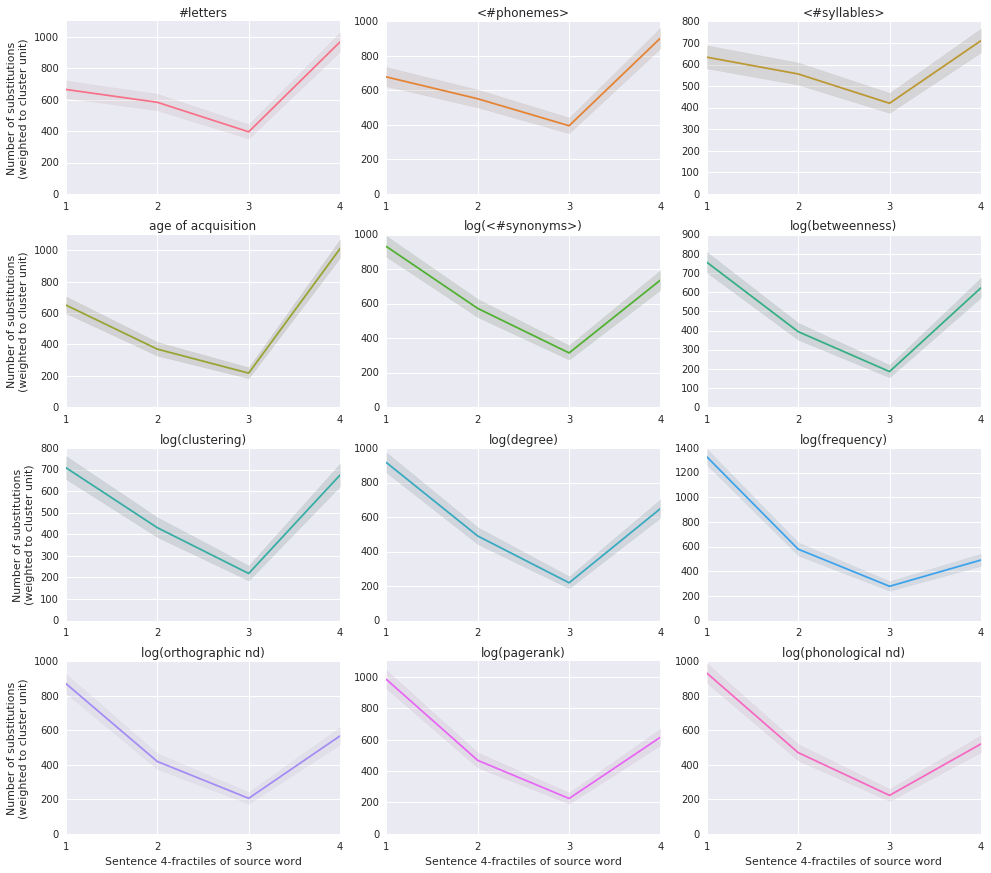

In [20]:
# Now plot.
g = sb.FacetGrid(data=fractiles, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're finally in a real multinomial sampling (and it's the only time). So we're going to use multinomial CIs.

### 5.2 Feature susceptibilities, reduced to features we expose in the paper

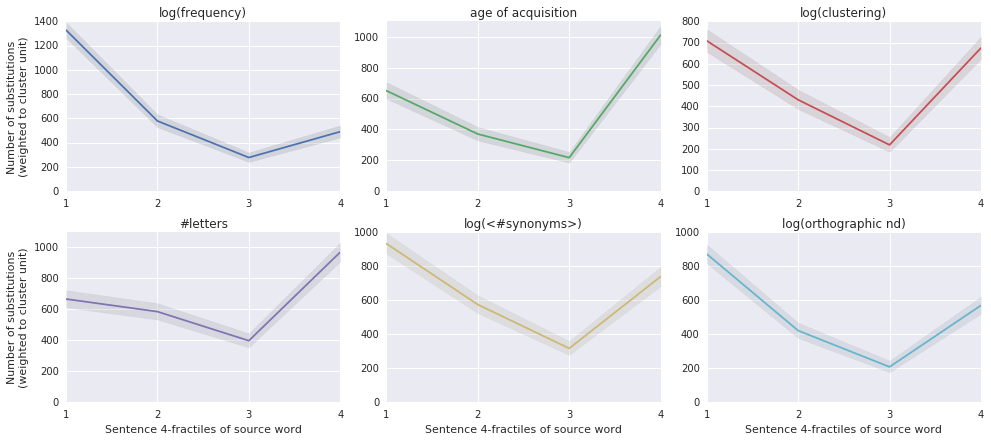

In [21]:
# Now plot.
g = sb.FacetGrid(data=fractiles[fractiles['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)